In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
import tensorflow as tf

In [29]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Add
from tensorflow.keras.optimizers import Adam

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
input = Input(shape=(24,), name="Input")
x = Dense(10, activation='relu')(input)
x = Dropout(0.2)(x)
x = Dense(10, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)
model = Model(input, output)

In [26]:
model.compile(Adam(0.002), loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
myCallback = EarlyStopping('val_acc', patience=5)

In [27]:
model.fit(X_train, y_train,batch_size=32, epochs=10,verbose=2,callbacks=[myCallback],validation_split=0.2,shuffle=True)

Train on 536 samples, validate on 134 samples
Epoch 1/10
 - 1s - loss: 2.8097 - acc: 0.6978 - val_loss: 2.0931 - val_acc: 0.6642
Epoch 2/10
 - 0s - loss: 1.6241 - acc: 0.7015 - val_loss: 0.8966 - val_acc: 0.6642
Epoch 3/10
 - 0s - loss: 0.9269 - acc: 0.6959 - val_loss: 0.6947 - val_acc: 0.5970
Epoch 4/10
 - 0s - loss: 0.7587 - acc: 0.6063 - val_loss: 0.6888 - val_acc: 0.4701
Epoch 5/10
 - 0s - loss: 0.7598 - acc: 0.5914 - val_loss: 0.6859 - val_acc: 0.4627
Epoch 6/10
 - 0s - loss: 0.7181 - acc: 0.5522 - val_loss: 0.6820 - val_acc: 0.5075


In [28]:
model.evaluate(X_test, y_test, batch_size=32)

330/330 [==============================] - 0s 20us/step


[0.6960236202586781, 0.44848484884608875]

In [10]:
cols = [chr(i) for i in range(ord('A'), ord('A')+25)]

In [11]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric', 
            sep='\s+', header=None, names=cols)

In [12]:
df.Y.replace({1:0, 2:1}, inplace=True)

In [34]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

A: [1 2 4 3]
B: [ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40]
C: [4 2 3 0 1]
D: [ 12  60  21  79  49  91  28  69  31  52  13  43  16  14  24  81 126  34
  26  22  18   4  68  19  40  59  15  47  61   5  23  62  72   8  65  96
  20 144  32  10   7  48  94  38  11   6  36 159  71   9 119  77  63  17
  39  35  85  27 101  86  25  54  58  78  70   3  29  73  30  75  45  51
  46 106  66  53  33 110  42 146  74  90 122 120 107  76  64 100  55  37
  44 116  41  57 138 148 143 130 118 113 111  83  80  89  50 124  92 157
 102 104  56  99 140   2 142 127  93  67 109 105 184 149 103  84  82]
E: [5 1 3 4 2]
F: [5 3 4 1 2]
G: [3 2 1 4]
H: [4 2 3 1]
I: [1 2 4 3]
J: [67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]
K: [3 1 2]
L: [2 1 3 4]
M: [1 2]
N: [2 1]
O: [1 2]
P: [0 1]
Q: [0 1]
R: [1 0]
S: [0 1]
T: [0 1]
U: [1 0]
V: [0 1]
W: [0 1

/anaconda3/envs/base_py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/envs/base_py36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/envs/base_py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/envs/base_py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, *

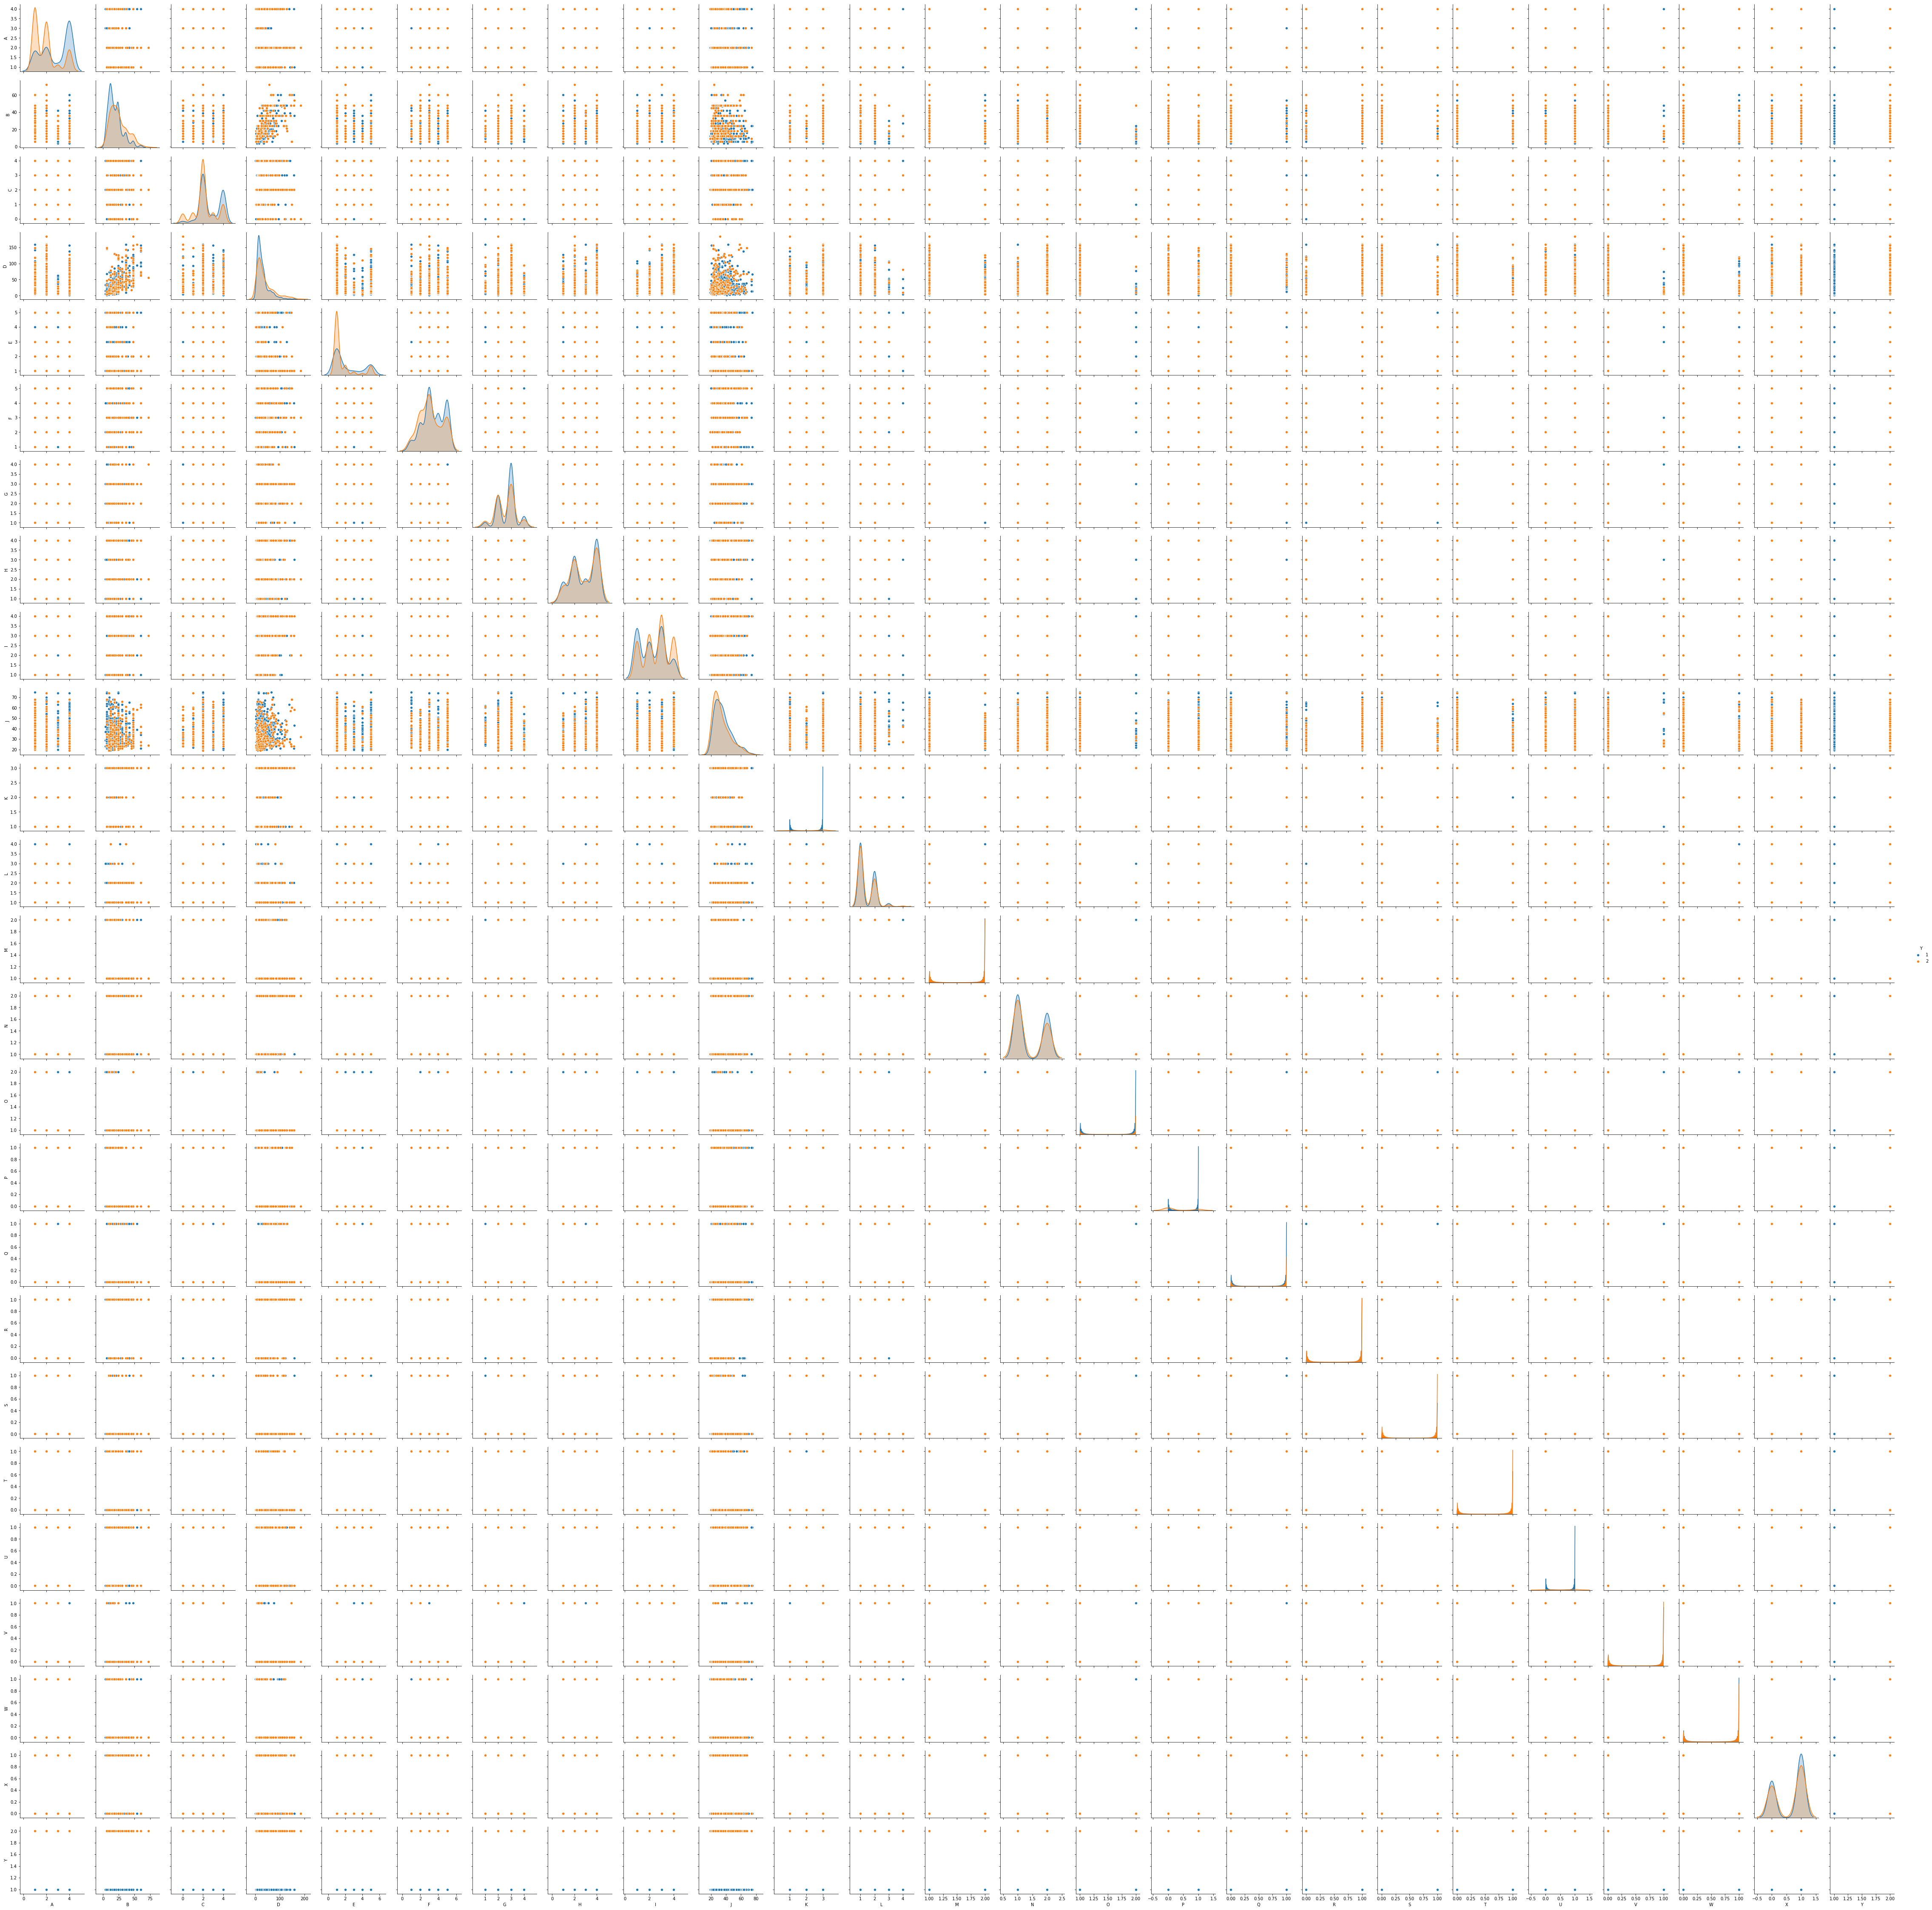

In [11]:
sns.pairplot(df, hue='Y')

In [13]:
df_BD = df[['B', 'D']]

In [16]:
from sklearn.cluster import KMeans

In [21]:
km = KMeans(n_clusters=2)
km.fit(df_BD.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
cntr = km.cluster_centers_
labels = km.labels_

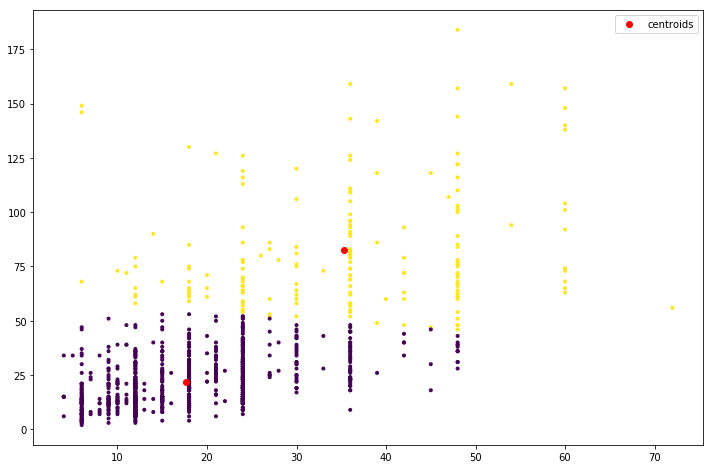

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df_BD.iloc[:,0], df_BD.iloc[:,1], c=labels, marker='.', label=None)
ax.scatter(cntr[:,0], cntr[:,1], c='r', marker='o', label = 'centroids')
ax.legend(loc='best')
plt.show()

In [35]:
pd.crosstab(df['Y'], labels)

col_0    0    1
Y              
0      597  103
1      220   80

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, precision_score

In [37]:
accuracy_score(df['Y'], labels)

0.677

In [39]:
confusion_matrix(df['Y'], labels)

array([[597, 103],
       [220,  80]])

In [40]:
def custom_scorer(y_true, y_pred):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_true, y_pred)
    return cm[1,0]*5 + cm[0,1]

In [42]:
from sklearn.metrics import make_scorer
cust_score = make_scorer(custom_scorer, greater_is_better=False)

In [54]:
X_, y_ = df_BD[['B']], df_BD['D']

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
B_train, B_test, D_train, D_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

In [56]:
linreg = LinearRegression(fit_intercept=False)
linreg.fit(B_train, D_train)
D_pred = linreg.predict(B_test)

In [59]:
w = linreg.coef_[0]
b = linreg.intercept_

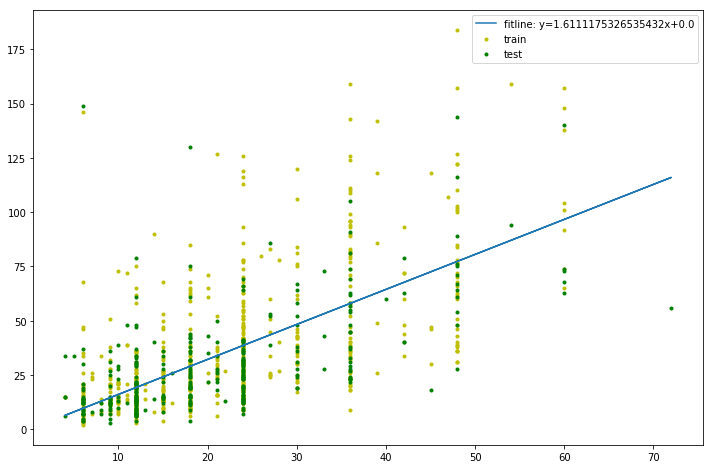

In [60]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(B_train, D_train, c='y', marker='.', label='train')
ax.scatter(B_test, D_test, c='g', marker='.', label='test')
ax.plot(B_test, D_pred, label = f'fitline: y={w}x+{b}')
ax.legend(loc='best')
plt.show()

In [62]:
r2_score(D_test, D_pred)

0.31506134696336574

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [13]:
X, y = df.drop('Y',1), df['Y']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
def model_fit_pred(estimator, X_train, X_test, y_train, y_test):
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    return accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),custom_scorer(y_test, y_pred)

In [73]:
dt = DecisionTreeClassifier()
svm = SVC()
gnb = GaussianNB()
rf = RandomForestClassifier()
gbc = GradientBoostingClassifier()
knn = KNeighborsClassifier()
logreg = LogisticRegression()

In [74]:
for model in [dt,svm,gnb,rf,gbc,knn,logreg]:
    print(model_fit_pred(model, X_train, X_test, y_train, y_test))

(0.693939393939394, 0.5, 289)
(0.7636363636363637, 0.7090909090909091, 326)
(0.7696969696969697, 0.6190476190476191, 220)
(0.7696969696969697, 0.7272727272727273, 320)
(0.7787878787878788, 0.7058823529411765, 285)
(0.703030303030303, 0.5245901639344263, 374)
(0.7636363636363637, 0.6575342465753424, 290)


In [75]:
import tensorflow as tf

In [80]:
feat_cols = [tf.feature_column.numeric_column(key) for key in df.iloc[:,:-1].columns]

In [84]:
X = X.apply(lambda x: (x-x.mean())/x.std())

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [85]:
model = tf.estimator.LinearClassifier(feat_cols, optimizer='Adam')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmpnawqivwl', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a4e98dc88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [90]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=32, num_epochs=500, shuffle=True)

In [88]:
eval_func = tf.estimator.inputs.pandas_input_fn(X_test, y_test, batch_size=32, num_epochs=1, shuffle=False)

In [91]:
model.train(input_func, steps=3000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmpnawqivwl/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1000 into /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmpnawqivwl/model.ckpt.
INFO:tensorflow:loss = 14.628146, step = 1001
INFO:tensorflow:global_step/sec: 204.64
INFO:tensorflow:loss = 21.687185, step = 1101 (0.492 sec)
INFO:tensorflow:global_step/sec: 294.453
INFO:tensorflow:loss = 29.076376, step = 1201 (0.337 sec)
INFO:tensorflow:global_step/sec: 288.697
INFO:tensorflow:loss = 21.394135, step = 1301 (0.347 sec)
INFO:tensorflow:global_step/sec: 297.637
INFO:tensorflow:loss = 15.690913, step = 1401 (0.338 sec)
INFO:tensorflow:global_step/sec: 296.796
INFO:tensorflow:loss = 20.016623, step =

In [92]:
model.evaluate(eval_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-05-01:24:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmpnawqivwl/model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-05-01:24:49
INFO:tensorflow:Saving dict for global step 4000: accuracy = 0.74925375, accuracy_baseline = 0.70298505, auc = 0.73421776, auc_precision_recall = 0.5724373, average_loss = 0.5528526, global_step = 4000, label/mean = 0.29701492, loss = 17.63863, precision = 0.60544217, prediction/mean = 0.3004633, recall = 0.44723618
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4000: /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmpnawqivwl/model.ckpt-4000


{'accuracy': 0.74925375,
 'accuracy_baseline': 0.70298505,
 'auc': 0.73421776,
 'auc_precision_recall': 0.5724373,
 'average_loss': 0.5528526,
 'label/mean': 0.29701492,
 'loss': 17.63863,
 'precision': 0.60544217,
 'prediction/mean': 0.3004633,
 'recall': 0.44723618,
 'global_step': 4000}

In [93]:
dnn = tf.estimator.DNNClassifier([10,10,10], feat_cols, optimizer='Adam')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmppcr2ba9w', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a505159b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [94]:
dnn.train(input_func, steps=3000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmppcr2ba9w/model.ckpt.
INFO:tensorflow:loss = 22.473867, step = 1
INFO:tensorflow:global_step/sec: 227.036
INFO:tensorflow:loss = 15.843472, step = 101 (0.443 sec)
INFO:tensorflow:global_step/sec: 288.573
INFO:tensorflow:loss = 10.452932, step = 201 (0.346 sec)
INFO:tensorflow:global_step/sec: 287.661
INFO:tensorflow:loss = 11.930204, step = 301 (0.349 sec)
INFO:tensorflow:global_step/sec: 298.26
INFO:tensorflow:loss = 6.755639, step = 401 (0.336 sec)
INFO:tensorflow:global_step/sec: 279.674
INFO:tensorflow:loss = 9.418391, step = 501 (0.357 sec)
INFO:tensorflow:global_step/sec: 286.176
INFO:tensorflow:loss = 8.141282, step = 601 (0.349 sec)
INFO:tensorflow:g

In [95]:
dnn.evaluate(eval_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-05-01:32:35
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmppcr2ba9w/model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-05-01:32:36
INFO:tensorflow:Saving dict for global step 3000: accuracy = 0.8671642, accuracy_baseline = 0.70298505, auc = 0.9512211, auc_precision_recall = 0.9051418, average_loss = 0.21569066, global_step = 3000, label/mean = 0.29701492, loss = 6.881559, precision = 0.8525641, prediction/mean = 0.28467828, recall = 0.6683417
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3000: /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmppcr2ba9w/model.ckpt-3000


{'accuracy': 0.8671642,
 'accuracy_baseline': 0.70298505,
 'auc': 0.9512211,
 'auc_precision_recall': 0.9051418,
 'average_loss': 0.21569066,
 'label/mean': 0.29701492,
 'loss': 6.881559,
 'precision': 0.8525641,
 'prediction/mean': 0.28467828,
 'recall': 0.6683417,
 'global_step': 3000}

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [4]:
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
myCallback=EarlyStopping('acc',patience=5)

In [100]:
ann_model = Sequential()
ann_model.add(Dense(10, activation='relu', input_shape=(24,)))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(10, activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(10, activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(1, activation='sigmoid'))

In [103]:
ann_model.compile('Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [105]:
ann_estimator = tf.keras.estimator.model_to_estimator(ann_model)

INFO:tensorflow:Using the Keras model provided.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmpo6walbx2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a407b0be0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [110]:
ann_model.input_names

['dense_input']

In [114]:
# need to add 1 more dimension to fit into estimator
y_train = np.expand_dims(y_train, 1)

In [115]:
# in order to use estimator api, keras input name needs to be reflected in input_func, which can only be done using numpy_input_fn
input_func_for_keras_estimator = tf.estimator.inputs.numpy_input_fn({'dense_input': X_train.values}, y_train, batch_size=32, num_epochs=500, shuffle=True)

In [116]:
ann_estimator.train(input_func_for_keras_estimator, steps=3000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmpo6walbx2/keras_model.ckpt
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmpo6walbx2/model.ckpt.
INFO:tensorflow:loss = 0.8374702, step = 1
INFO:tensorflow:global_step/sec: 336.206
INFO:tensorflow:loss = 0.71843946, step = 101 (0.298 sec)
INFO:tensorflow:global_step/sec: 214.853
INFO:tensorflow:loss = 0.55810595, step = 201 (0.465 sec)
INFO:tensorflow:global_step/sec: 674.958
INFO:tensorflow:loss = 0.50694305, step = 301 (0.148 sec)
INFO:tensorflow:global_step/sec: 692.718
INFO:tensorflow:loss = 0.583241, step = 401 (0.144 sec)
INFO:tensorflow:global_step/sec: 701.922
INFO:tensorflow:loss = 0.44829848, step = 501 

In [117]:
y_test=np.expand_dims(y_test, 1)

In [118]:
eval_func_for_keras_estimator = tf.estimator.inputs.numpy_input_fn({'dense_input': X_test.values}, y_test, batch_size=32, num_epochs=1, shuffle=False)

In [119]:
ann_estimator.evaluate(eval_func_for_keras_estimator)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-05-02:04:34
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmpo6walbx2/model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-05-02:04:35
INFO:tensorflow:Saving dict for global step 3000: accuracy = 0.7443182, global_step = 3000, loss = 0.5236928
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3000: /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmpo6walbx2/model.ckpt-3000


{'accuracy': 0.7443182, 'loss': 0.5236928, 'global_step': 3000}

In [120]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [121]:
def build_func(optimizer='Adam'):
    ann_model = Sequential()
    ann_model.add(Dense(10, activation='relu', input_shape=(24,)))
    ann_model.add(Dropout(0.2))
    ann_model.add(Dense(10, activation='relu'))
    ann_model.add(Dropout(0.2))
    ann_model.add(Dense(10, activation='relu'))
    ann_model.add(Dropout(0.2))
    ann_model.add(Dense(1, activation='sigmoid'))
    ann_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return ann_model

In [122]:
est_gridcv = KerasClassifier(build_fn=build_func)

In [136]:
parameters = {
    'optimizer':['Adam', 'RMSProp'],
    'batch_size':[16,64], 
    'epochs':[100, 500]          
             }

In [137]:
ann_grid = GridSearchCV(est_gridcv, parameters, cv=10, scoring=cust_score, verbose=3)

In [126]:
y_train, y_test = np.squeeze(y_train), np.squeeze(y_test)

In [138]:
ann_grid.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] batch_size=16, epochs=100, optimizer=Adam .......................
Epoch 1/100
603/603 [==============================] - 2s 3ms/step - loss: 0.7147 - acc: 0.5257
Epoch 2/100
603/603 [==============================] - 0s 123us/step - loss: 0.6847 - acc: 0.6285
Epoch 3/100
603/603 [==============================] - 0s 124us/step - loss: 0.6572 - acc: 0.6584
Epoch 4/100
603/603 [==============================] - 0s 127us/step - loss: 0.6380 - acc: 0.6816
Epoch 5/100
603/603 [==============================] - 0s 126us/step - loss: 0.6416 - acc: 0.6633
Epoch 6/100
603/603 [==============================] - 0s 131us/step - loss: 0.6079 - acc: 0.6816
Epoch 7/100
603/603 [==============================] - 0s 124us/step - loss: 0.6050 - acc: 0.6882
Epoch 8/100
603/603 [==============================] - 0s 129us/step - loss: 0.6116 - acc: 0.6816
Epoch 9/100
603/603 [==============================] - 0s 125us/step - loss: 0.5818 - 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s


Epoch 1/100
603/603 [==============================] - 2s 3ms/step - loss: 0.6891 - acc: 0.5721
Epoch 2/100
603/603 [==============================] - 0s 121us/step - loss: 0.6819 - acc: 0.6484
Epoch 3/100
603/603 [==============================] - 0s 122us/step - loss: 0.6534 - acc: 0.6816
Epoch 4/100
603/603 [==============================] - 0s 122us/step - loss: 0.6446 - acc: 0.6833
Epoch 5/100
603/603 [==============================] - 0s 125us/step - loss: 0.6345 - acc: 0.6899
Epoch 6/100
603/603 [==============================] - 0s 119us/step - loss: 0.6376 - acc: 0.6982
Epoch 7/100
603/603 [==============================] - 0s 115us/step - loss: 0.6146 - acc: 0.7015
Epoch 8/100
603/603 [==============================] - 0s 118us/step - loss: 0.6091 - acc: 0.7048
Epoch 9/100
603/603 [==============================] - 0s 122us/step - loss: 0.6091 - acc: 0.6915
Epoch 10/100
603/603 [==============================] - 0s 124us/step - loss: 0.6056 - acc: 0.6982
Epoch 11/100
603/603 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.0s remaining:    0.0s


Epoch 1/100
603/603 [==============================] - 2s 3ms/step - loss: 0.7400 - acc: 0.3897
Epoch 2/100
603/603 [==============================] - 0s 123us/step - loss: 0.6963 - acc: 0.5506
Epoch 3/100
603/603 [==============================] - 0s 120us/step - loss: 0.6721 - acc: 0.6617
Epoch 4/100
603/603 [==============================] - 0s 129us/step - loss: 0.6551 - acc: 0.6733
Epoch 5/100
603/603 [==============================] - 0s 120us/step - loss: 0.6392 - acc: 0.7048
Epoch 6/100
603/603 [==============================] - 0s 122us/step - loss: 0.6286 - acc: 0.7065
Epoch 7/100
603/603 [==============================] - 0s 118us/step - loss: 0.6186 - acc: 0.6998
Epoch 8/100
603/603 [==============================] - 0s 125us/step - loss: 0.6019 - acc: 0.7098
Epoch 9/100
603/603 [==============================] - 0s 119us/step - loss: 0.5992 - acc: 0.6998
Epoch 10/100
603/603 [==============================] - 0s 124us/step - loss: 0.5910 - acc: 0.7081
Epoch 11/100
603/603 

603/603 [==============================] - 0s 121us/step - loss: 0.4358 - acc: 0.8060
Epoch 65/100
603/603 [==============================] - 0s 122us/step - loss: 0.4097 - acc: 0.8027
Epoch 66/100
603/603 [==============================] - 0s 119us/step - loss: 0.4127 - acc: 0.8076
Epoch 67/100
603/603 [==============================] - 0s 117us/step - loss: 0.4155 - acc: 0.8027
Epoch 68/100
603/603 [==============================] - 0s 128us/step - loss: 0.3900 - acc: 0.8143
Epoch 69/100
603/603 [==============================] - 0s 124us/step - loss: 0.4199 - acc: 0.7927
Epoch 70/100
603/603 [==============================] - 0s 120us/step - loss: 0.4193 - acc: 0.8226
Epoch 71/100
603/603 [==============================] - 0s 131us/step - loss: 0.4039 - acc: 0.8192
Epoch 72/100
603/603 [==============================] - 0s 118us/step - loss: 0.4125 - acc: 0.7927
Epoch 73/100
603/603 [==============================] - 0s 131us/step - loss: 0.4076 - acc: 0.7927
Epoch 74/100
603/603 [=

603/603 [==============================] - 0s 122us/step - loss: 0.4925 - acc: 0.7612
Epoch 27/100
603/603 [==============================] - 0s 132us/step - loss: 0.4942 - acc: 0.7546
Epoch 28/100
603/603 [==============================] - 0s 123us/step - loss: 0.5106 - acc: 0.7512
Epoch 29/100
603/603 [==============================] - 0s 120us/step - loss: 0.5084 - acc: 0.7546
Epoch 30/100
603/603 [==============================] - 0s 121us/step - loss: 0.4886 - acc: 0.7678
Epoch 31/100
603/603 [==============================] - 0s 118us/step - loss: 0.4900 - acc: 0.7595
Epoch 32/100
603/603 [==============================] - 0s 131us/step - loss: 0.4969 - acc: 0.7512
Epoch 33/100
603/603 [==============================] - 0s 127us/step - loss: 0.4859 - acc: 0.7562
Epoch 34/100
603/603 [==============================] - 0s 123us/step - loss: 0.4812 - acc: 0.7861
Epoch 35/100
603/603 [==============================] - 0s 121us/step - loss: 0.4908 - acc: 0.7678
Epoch 36/100
603/603 [=

603/603 [==============================] - 0s 123us/step - loss: 0.4673 - acc: 0.7645
Epoch 90/100
603/603 [==============================] - 0s 125us/step - loss: 0.4437 - acc: 0.7910
Epoch 91/100
603/603 [==============================] - 0s 128us/step - loss: 0.4460 - acc: 0.7993
Epoch 92/100
603/603 [==============================] - 0s 124us/step - loss: 0.4619 - acc: 0.7662
Epoch 93/100
603/603 [==============================] - 0s 122us/step - loss: 0.4723 - acc: 0.7711
Epoch 94/100
603/603 [==============================] - 0s 124us/step - loss: 0.4543 - acc: 0.7828
Epoch 95/100
603/603 [==============================] - 0s 121us/step - loss: 0.4429 - acc: 0.7910
Epoch 96/100
603/603 [==============================] - 0s 130us/step - loss: 0.4376 - acc: 0.7828
Epoch 97/100
603/603 [==============================] - 0s 124us/step - loss: 0.4353 - acc: 0.7910
Epoch 98/100
603/603 [==============================] - 0s 120us/step - loss: 0.4679 - acc: 0.7861
Epoch 99/100
603/603 [=

603/603 [==============================] - 0s 150us/step - loss: 0.4590 - acc: 0.7828
Epoch 52/100
603/603 [==============================] - 0s 153us/step - loss: 0.4431 - acc: 0.7711
Epoch 53/100
603/603 [==============================] - 0s 143us/step - loss: 0.4539 - acc: 0.7794
Epoch 54/100
603/603 [==============================] - 0s 132us/step - loss: 0.4483 - acc: 0.7662
Epoch 55/100
603/603 [==============================] - 0s 117us/step - loss: 0.4426 - acc: 0.7778
Epoch 56/100
603/603 [==============================] - 0s 127us/step - loss: 0.4405 - acc: 0.7877
Epoch 57/100
603/603 [==============================] - 0s 124us/step - loss: 0.4440 - acc: 0.7811
Epoch 58/100
603/603 [==============================] - 0s 133us/step - loss: 0.4533 - acc: 0.7778
Epoch 59/100
603/603 [==============================] - 0s 133us/step - loss: 0.4446 - acc: 0.8043
Epoch 60/100
603/603 [==============================] - 0s 130us/step - loss: 0.4394 - acc: 0.7778
Epoch 61/100
603/603 [=

603/603 [==============================] - 0s 99us/step - loss: 0.5505 - acc: 0.7131
Epoch 14/100
603/603 [==============================] - 0s 98us/step - loss: 0.5412 - acc: 0.7164
Epoch 15/100
603/603 [==============================] - 0s 111us/step - loss: 0.5477 - acc: 0.7197
Epoch 16/100
603/603 [==============================] - 0s 118us/step - loss: 0.5464 - acc: 0.7065
Epoch 17/100
603/603 [==============================] - 0s 122us/step - loss: 0.5467 - acc: 0.7015
Epoch 18/100
603/603 [==============================] - 0s 103us/step - loss: 0.5409 - acc: 0.7098
Epoch 19/100
603/603 [==============================] - 0s 109us/step - loss: 0.5410 - acc: 0.7214
Epoch 20/100
603/603 [==============================] - 0s 102us/step - loss: 0.5310 - acc: 0.7048
Epoch 21/100
603/603 [==============================] - 0s 104us/step - loss: 0.5256 - acc: 0.7098
Epoch 22/100
603/603 [==============================] - 0s 100us/step - loss: 0.5159 - acc: 0.7330
Epoch 23/100
603/603 [===

603/603 [==============================] - 0s 95us/step - loss: 0.4744 - acc: 0.7745
Epoch 79/100
603/603 [==============================] - 0s 95us/step - loss: 0.4498 - acc: 0.7977
Epoch 80/100
603/603 [==============================] - 0s 96us/step - loss: 0.4511 - acc: 0.7861
Epoch 81/100
603/603 [==============================] - 0s 96us/step - loss: 0.4535 - acc: 0.7828
Epoch 82/100
603/603 [==============================] - 0s 97us/step - loss: 0.4670 - acc: 0.7745
Epoch 83/100
603/603 [==============================] - 0s 93us/step - loss: 0.4436 - acc: 0.7910
Epoch 84/100
603/603 [==============================] - 0s 98us/step - loss: 0.4599 - acc: 0.7910
Epoch 85/100
603/603 [==============================] - 0s 96us/step - loss: 0.4450 - acc: 0.7960
Epoch 86/100
603/603 [==============================] - 0s 95us/step - loss: 0.4426 - acc: 0.7977
Epoch 87/100
603/603 [==============================] - 0s 95us/step - loss: 0.4580 - acc: 0.7828
Epoch 88/100
603/603 [===========

603/603 [==============================] - 0s 99us/step - loss: 0.4110 - acc: 0.7977
Epoch 61/100
603/603 [==============================] - 0s 100us/step - loss: 0.4287 - acc: 0.8060
Epoch 62/100
603/603 [==============================] - 0s 100us/step - loss: 0.4268 - acc: 0.7844
Epoch 63/100
603/603 [==============================] - 0s 98us/step - loss: 0.4278 - acc: 0.7877
Epoch 64/100
603/603 [==============================] - 0s 97us/step - loss: 0.4608 - acc: 0.7579
Epoch 65/100
603/603 [==============================] - 0s 100us/step - loss: 0.4373 - acc: 0.7695
Epoch 66/100
603/603 [==============================] - 0s 101us/step - loss: 0.4141 - acc: 0.7794
Epoch 67/100
603/603 [==============================] - 0s 102us/step - loss: 0.4292 - acc: 0.8010
Epoch 68/100
603/603 [==============================] - 0s 97us/step - loss: 0.4272 - acc: 0.7678
Epoch 69/100
603/603 [==============================] - 0s 99us/step - loss: 0.4029 - acc: 0.7977
Epoch 70/100
603/603 [======

Epoch 42/100
603/603 [==============================] - 0s 95us/step - loss: 0.4486 - acc: 0.7910
Epoch 43/100
603/603 [==============================] - 0s 95us/step - loss: 0.4746 - acc: 0.7662
Epoch 44/100
603/603 [==============================] - 0s 98us/step - loss: 0.4475 - acc: 0.7877
Epoch 45/100
603/603 [==============================] - 0s 96us/step - loss: 0.4448 - acc: 0.7778
Epoch 46/100
603/603 [==============================] - 0s 97us/step - loss: 0.4507 - acc: 0.7894
Epoch 47/100
603/603 [==============================] - 0s 94us/step - loss: 0.4695 - acc: 0.7778
Epoch 48/100
603/603 [==============================] - 0s 96us/step - loss: 0.4509 - acc: 0.7894
Epoch 49/100
603/603 [==============================] - 0s 95us/step - loss: 0.4349 - acc: 0.7993
Epoch 50/100
603/603 [==============================] - 0s 98us/step - loss: 0.4389 - acc: 0.8010
Epoch 51/100
603/603 [==============================] - 0s 95us/step - loss: 0.4491 - acc: 0.7828
Epoch 52/100
603/603

603/603 [==============================] - 0s 98us/step - loss: 0.4858 - acc: 0.7446
Epoch 25/100
603/603 [==============================] - 0s 99us/step - loss: 0.4778 - acc: 0.7761
Epoch 26/100
603/603 [==============================] - 0s 100us/step - loss: 0.5144 - acc: 0.7645
Epoch 27/100
603/603 [==============================] - 0s 99us/step - loss: 0.4851 - acc: 0.7711
Epoch 28/100
603/603 [==============================] - 0s 101us/step - loss: 0.4938 - acc: 0.7678
Epoch 29/100
603/603 [==============================] - 0s 99us/step - loss: 0.4712 - acc: 0.7877
Epoch 30/100
603/603 [==============================] - 0s 97us/step - loss: 0.4754 - acc: 0.7894
Epoch 31/100
603/603 [==============================] - 0s 98us/step - loss: 0.4593 - acc: 0.7944
Epoch 32/100
603/603 [==============================] - 0s 97us/step - loss: 0.4860 - acc: 0.7629
Epoch 33/100
603/603 [==============================] - 0s 97us/step - loss: 0.4636 - acc: 0.7894
Epoch 34/100
603/603 [=========

603/603 [==============================] - 0s 124us/step - loss: 0.4416 - acc: 0.8109
Epoch 88/100
603/603 [==============================] - 0s 135us/step - loss: 0.4256 - acc: 0.8159
Epoch 89/100
603/603 [==============================] - 0s 135us/step - loss: 0.4198 - acc: 0.8159
Epoch 90/100
603/603 [==============================] - 0s 128us/step - loss: 0.4344 - acc: 0.8176
Epoch 91/100
603/603 [==============================] - 0s 122us/step - loss: 0.4394 - acc: 0.8043
Epoch 92/100
603/603 [==============================] - 0s 132us/step - loss: 0.4713 - acc: 0.7944
Epoch 93/100
603/603 [==============================] - 0s 121us/step - loss: 0.4454 - acc: 0.8076
Epoch 94/100
603/603 [==============================] - 0s 124us/step - loss: 0.4323 - acc: 0.8076
Epoch 95/100
603/603 [==============================] - 0s 123us/step - loss: 0.4270 - acc: 0.8109
Epoch 96/100
603/603 [==============================] - 0s 123us/step - loss: 0.4204 - acc: 0.8226
Epoch 97/100
603/603 [=

603/603 [==============================] - 0s 122us/step - loss: 0.4477 - acc: 0.7993
Epoch 50/100
603/603 [==============================] - 0s 124us/step - loss: 0.4487 - acc: 0.7894
Epoch 51/100
603/603 [==============================] - 0s 119us/step - loss: 0.4438 - acc: 0.7910
Epoch 52/100
603/603 [==============================] - 0s 121us/step - loss: 0.4356 - acc: 0.8060
Epoch 53/100
603/603 [==============================] - 0s 125us/step - loss: 0.4601 - acc: 0.7910
Epoch 54/100
603/603 [==============================] - 0s 131us/step - loss: 0.4482 - acc: 0.7794
Epoch 55/100
603/603 [==============================] - 0s 128us/step - loss: 0.4457 - acc: 0.7993
Epoch 56/100
603/603 [==============================] - 0s 129us/step - loss: 0.4388 - acc: 0.8076
Epoch 57/100
603/603 [==============================] - 0s 125us/step - loss: 0.4228 - acc: 0.8043
Epoch 58/100
603/603 [==============================] - 0s 121us/step - loss: 0.4445 - acc: 0.7927
Epoch 59/100
603/603 [=

603/603 [==============================] - 0s 100us/step - loss: 0.5404 - acc: 0.7264
Epoch 12/100
603/603 [==============================] - 0s 104us/step - loss: 0.5311 - acc: 0.7280
Epoch 13/100
603/603 [==============================] - 0s 103us/step - loss: 0.5241 - acc: 0.7081
Epoch 14/100
603/603 [==============================] - 0s 98us/step - loss: 0.5238 - acc: 0.7181
Epoch 15/100
603/603 [==============================] - 0s 99us/step - loss: 0.5416 - acc: 0.7347
Epoch 16/100
603/603 [==============================] - 0s 99us/step - loss: 0.5071 - acc: 0.7380
Epoch 17/100
603/603 [==============================] - 0s 102us/step - loss: 0.5063 - acc: 0.7347
Epoch 18/100
603/603 [==============================] - 0s 100us/step - loss: 0.4983 - acc: 0.7330
Epoch 19/100
603/603 [==============================] - 0s 101us/step - loss: 0.4959 - acc: 0.7678
Epoch 20/100
603/603 [==============================] - 0s 97us/step - loss: 0.5029 - acc: 0.7496
Epoch 21/100
603/603 [=====

603/603 [==============================] - 0s 112us/step - loss: 0.4349 - acc: 0.7877
Epoch 76/500
603/603 [==============================] - 0s 112us/step - loss: 0.4529 - acc: 0.7745
Epoch 77/500
603/603 [==============================] - 0s 115us/step - loss: 0.4587 - acc: 0.7745
Epoch 78/500
603/603 [==============================] - 0s 123us/step - loss: 0.4266 - acc: 0.7894
Epoch 79/500
603/603 [==============================] - 0s 127us/step - loss: 0.4239 - acc: 0.8010
Epoch 80/500
603/603 [==============================] - 0s 127us/step - loss: 0.4541 - acc: 0.7728
Epoch 81/500
603/603 [==============================] - 0s 119us/step - loss: 0.4451 - acc: 0.7944
Epoch 82/500
603/603 [==============================] - 0s 112us/step - loss: 0.4277 - acc: 0.7894
Epoch 83/500
603/603 [==============================] - 0s 110us/step - loss: 0.4576 - acc: 0.7778
Epoch 84/500
603/603 [==============================] - 0s 113us/step - loss: 0.4219 - acc: 0.7844
Epoch 85/500
603/603 [=

603/603 [==============================] - 0s 112us/step - loss: 0.3322 - acc: 0.8524
Epoch 240/500
603/603 [==============================] - 0s 112us/step - loss: 0.3515 - acc: 0.8192
Epoch 241/500
603/603 [==============================] - 0s 115us/step - loss: 0.3313 - acc: 0.8524
Epoch 242/500
603/603 [==============================] - 0s 114us/step - loss: 0.3436 - acc: 0.8325
Epoch 243/500
603/603 [==============================] - 0s 112us/step - loss: 0.3622 - acc: 0.8292
Epoch 244/500
603/603 [==============================] - 0s 111us/step - loss: 0.3346 - acc: 0.8391
Epoch 245/500
603/603 [==============================] - 0s 112us/step - loss: 0.3296 - acc: 0.8557
Epoch 246/500
603/603 [==============================] - 0s 110us/step - loss: 0.3442 - acc: 0.8358
Epoch 247/500
603/603 [==============================] - 0s 114us/step - loss: 0.3172 - acc: 0.8574
Epoch 248/500
603/603 [==============================] - 0s 114us/step - loss: 0.3471 - acc: 0.8342
Epoch 249/500


603/603 [==============================] - 0s 111us/step - loss: 0.3097 - acc: 0.8657
Epoch 322/500
603/603 [==============================] - 0s 118us/step - loss: 0.3077 - acc: 0.8673
Epoch 323/500
603/603 [==============================] - 0s 120us/step - loss: 0.2928 - acc: 0.8590
Epoch 324/500
603/603 [==============================] - 0s 117us/step - loss: 0.3162 - acc: 0.8624
Epoch 325/500
603/603 [==============================] - 0s 114us/step - loss: 0.3192 - acc: 0.8474
Epoch 326/500
603/603 [==============================] - 0s 117us/step - loss: 0.3128 - acc: 0.8624
Epoch 327/500
603/603 [==============================] - 0s 120us/step - loss: 0.3074 - acc: 0.8524
Epoch 328/500
603/603 [==============================] - 0s 120us/step - loss: 0.3311 - acc: 0.8325
Epoch 329/500
603/603 [==============================] - 0s 117us/step - loss: 0.3439 - acc: 0.8342
Epoch 330/500
603/603 [==============================] - 0s 121us/step - loss: 0.3381 - acc: 0.8474
Epoch 331/500


603/603 [==============================] - 0s 112us/step - loss: 0.3078 - acc: 0.8474
Epoch 404/500
603/603 [==============================] - 0s 115us/step - loss: 0.3089 - acc: 0.8474
Epoch 405/500
603/603 [==============================] - 0s 114us/step - loss: 0.2992 - acc: 0.8706
Epoch 406/500
603/603 [==============================] - 0s 116us/step - loss: 0.2945 - acc: 0.8640
Epoch 407/500
603/603 [==============================] - 0s 113us/step - loss: 0.2809 - acc: 0.8723
Epoch 408/500
603/603 [==============================] - 0s 114us/step - loss: 0.3381 - acc: 0.8524
Epoch 409/500
603/603 [==============================] - 0s 123us/step - loss: 0.3196 - acc: 0.8474
Epoch 410/500
603/603 [==============================] - 0s 124us/step - loss: 0.3152 - acc: 0.8474
Epoch 411/500
603/603 [==============================] - 0s 115us/step - loss: 0.3134 - acc: 0.8640
Epoch 412/500
603/603 [==============================] - 0s 114us/step - loss: 0.3059 - acc: 0.8574
Epoch 413/500


603/603 [==============================] - 0s 143us/step - loss: 0.2996 - acc: 0.8474
Epoch 486/500
603/603 [==============================] - 0s 143us/step - loss: 0.2880 - acc: 0.8607
Epoch 487/500
603/603 [==============================] - 0s 141us/step - loss: 0.2939 - acc: 0.8624
Epoch 488/500
603/603 [==============================] - 0s 134us/step - loss: 0.3085 - acc: 0.8640
Epoch 489/500
603/603 [==============================] - 0s 134us/step - loss: 0.3273 - acc: 0.8624
Epoch 490/500
603/603 [==============================] - 0s 139us/step - loss: 0.2885 - acc: 0.8640
Epoch 491/500
603/603 [==============================] - 0s 143us/step - loss: 0.3186 - acc: 0.8607
Epoch 492/500
603/603 [==============================] - 0s 141us/step - loss: 0.3045 - acc: 0.8607
Epoch 493/500
603/603 [==============================] - 0s 144us/step - loss: 0.2886 - acc: 0.8607
Epoch 494/500
603/603 [==============================] - 0s 142us/step - loss: 0.2904 - acc: 0.8723
Epoch 495/500


603/603 [==============================] - 0s 147us/step - loss: 0.3605 - acc: 0.8176
Epoch 149/500
603/603 [==============================] - 0s 150us/step - loss: 0.3411 - acc: 0.8524
Epoch 150/500
603/603 [==============================] - 0s 147us/step - loss: 0.3697 - acc: 0.7993
Epoch 151/500
603/603 [==============================] - 0s 149us/step - loss: 0.3656 - acc: 0.8275
Epoch 152/500
603/603 [==============================] - 0s 145us/step - loss: 0.3594 - acc: 0.8226
Epoch 153/500
603/603 [==============================] - 0s 139us/step - loss: 0.3352 - acc: 0.8474
Epoch 154/500
603/603 [==============================] - 0s 143us/step - loss: 0.3478 - acc: 0.8425
Epoch 155/500
603/603 [==============================] - 0s 142us/step - loss: 0.3202 - acc: 0.8458
Epoch 156/500
603/603 [==============================] - 0s 157us/step - loss: 0.3562 - acc: 0.8275
Epoch 157/500
603/603 [==============================] - 0s 174us/step - loss: 0.3431 - acc: 0.8375
Epoch 158/500


603/603 [==============================] - 0s 139us/step - loss: 0.3441 - acc: 0.8358
Epoch 231/500
603/603 [==============================] - 0s 140us/step - loss: 0.3369 - acc: 0.8491
Epoch 232/500
603/603 [==============================] - 0s 132us/step - loss: 0.3194 - acc: 0.8673
Epoch 233/500
603/603 [==============================] - 0s 147us/step - loss: 0.3146 - acc: 0.8491
Epoch 234/500
603/603 [==============================] - 0s 132us/step - loss: 0.3168 - acc: 0.8474
Epoch 235/500
603/603 [==============================] - 0s 135us/step - loss: 0.3108 - acc: 0.8425
Epoch 236/500
603/603 [==============================] - 0s 136us/step - loss: 0.2998 - acc: 0.8574
Epoch 237/500
603/603 [==============================] - 0s 138us/step - loss: 0.3275 - acc: 0.8574
Epoch 238/500
603/603 [==============================] - 0s 138us/step - loss: 0.3355 - acc: 0.8425
Epoch 239/500
603/603 [==============================] - 0s 133us/step - loss: 0.3182 - acc: 0.8590
Epoch 240/500


603/603 [==============================] - 0s 147us/step - loss: 0.3202 - acc: 0.8408
Epoch 313/500
603/603 [==============================] - 0s 132us/step - loss: 0.3001 - acc: 0.8773
Epoch 314/500
603/603 [==============================] - 0s 131us/step - loss: 0.2940 - acc: 0.8889
Epoch 315/500
603/603 [==============================] - 0s 132us/step - loss: 0.2885 - acc: 0.8789
Epoch 316/500
603/603 [==============================] - 0s 135us/step - loss: 0.2674 - acc: 0.9038
Epoch 317/500
603/603 [==============================] - 0s 139us/step - loss: 0.2815 - acc: 0.8723
Epoch 318/500
603/603 [==============================] - 0s 141us/step - loss: 0.2823 - acc: 0.8839
Epoch 319/500
603/603 [==============================] - 0s 145us/step - loss: 0.2842 - acc: 0.8673
Epoch 320/500
603/603 [==============================] - 0s 147us/step - loss: 0.2564 - acc: 0.8872
Epoch 321/500
603/603 [==============================] - 0s 147us/step - loss: 0.3164 - acc: 0.8441
Epoch 322/500


603/603 [==============================] - 0s 147us/step - loss: 0.2590 - acc: 0.8839
Epoch 395/500
603/603 [==============================] - 0s 146us/step - loss: 0.2763 - acc: 0.8939
Epoch 396/500
603/603 [==============================] - 0s 141us/step - loss: 0.2698 - acc: 0.8756
Epoch 397/500
603/603 [==============================] - 0s 146us/step - loss: 0.2749 - acc: 0.8839
Epoch 398/500
603/603 [==============================] - 0s 141us/step - loss: 0.2846 - acc: 0.8624
Epoch 399/500
603/603 [==============================] - 0s 143us/step - loss: 0.2595 - acc: 0.8988
Epoch 400/500
603/603 [==============================] - 0s 149us/step - loss: 0.2634 - acc: 0.8756
Epoch 401/500
603/603 [==============================] - 0s 141us/step - loss: 0.2725 - acc: 0.8823
Epoch 402/500
603/603 [==============================] - 0s 140us/step - loss: 0.2812 - acc: 0.8773
Epoch 403/500
603/603 [==============================] - 0s 147us/step - loss: 0.2660 - acc: 0.8690
Epoch 404/500


603/603 [==============================] - 0s 146us/step - loss: 0.2986 - acc: 0.8756
Epoch 477/500
603/603 [==============================] - 0s 142us/step - loss: 0.2474 - acc: 0.8806
Epoch 478/500
603/603 [==============================] - 0s 129us/step - loss: 0.2560 - acc: 0.9005
Epoch 479/500
603/603 [==============================] - 0s 145us/step - loss: 0.2496 - acc: 0.8905
Epoch 480/500
603/603 [==============================] - 0s 144us/step - loss: 0.2529 - acc: 0.8823
Epoch 481/500
603/603 [==============================] - 0s 141us/step - loss: 0.2559 - acc: 0.8955
Epoch 482/500
603/603 [==============================] - 0s 151us/step - loss: 0.2660 - acc: 0.8856
Epoch 483/500
603/603 [==============================] - 0s 145us/step - loss: 0.2491 - acc: 0.9022
Epoch 484/500
603/603 [==============================] - 0s 142us/step - loss: 0.2441 - acc: 0.8856
Epoch 485/500
603/603 [==============================] - 0s 144us/step - loss: 0.2626 - acc: 0.8740
Epoch 486/500


603/603 [==============================] - 0s 123us/step - loss: 0.3597 - acc: 0.8375
Epoch 140/500
603/603 [==============================] - 0s 126us/step - loss: 0.3552 - acc: 0.8325
Epoch 141/500
603/603 [==============================] - 0s 123us/step - loss: 0.3662 - acc: 0.8259
Epoch 142/500
603/603 [==============================] - 0s 123us/step - loss: 0.3807 - acc: 0.8176
Epoch 143/500
603/603 [==============================] - 0s 130us/step - loss: 0.3803 - acc: 0.8226
Epoch 144/500
603/603 [==============================] - 0s 139us/step - loss: 0.3731 - acc: 0.8209
Epoch 145/500
603/603 [==============================] - 0s 135us/step - loss: 0.3727 - acc: 0.8358
Epoch 146/500
603/603 [==============================] - 0s 134us/step - loss: 0.3785 - acc: 0.8143
Epoch 147/500
603/603 [==============================] - 0s 133us/step - loss: 0.3847 - acc: 0.8209
Epoch 148/500
603/603 [==============================] - 0s 131us/step - loss: 0.3863 - acc: 0.8375
Epoch 149/500


603/603 [==============================] - 0s 148us/step - loss: 0.3705 - acc: 0.8342
Epoch 222/500
603/603 [==============================] - 0s 146us/step - loss: 0.3184 - acc: 0.8491
Epoch 223/500
603/603 [==============================] - 0s 144us/step - loss: 0.3428 - acc: 0.8491
Epoch 224/500
603/603 [==============================] - 0s 145us/step - loss: 0.3208 - acc: 0.8408
Epoch 225/500
603/603 [==============================] - 0s 143us/step - loss: 0.3483 - acc: 0.8491
Epoch 226/500
603/603 [==============================] - 0s 143us/step - loss: 0.3428 - acc: 0.8408
Epoch 227/500
603/603 [==============================] - 0s 147us/step - loss: 0.3263 - acc: 0.8574
Epoch 228/500
603/603 [==============================] - 0s 145us/step - loss: 0.3347 - acc: 0.8541
Epoch 229/500
603/603 [==============================] - 0s 140us/step - loss: 0.3537 - acc: 0.8425
Epoch 230/500
603/603 [==============================] - 0s 144us/step - loss: 0.3285 - acc: 0.8557
Epoch 231/500


603/603 [==============================] - 0s 149us/step - loss: 0.3073 - acc: 0.8541
Epoch 304/500
603/603 [==============================] - 0s 151us/step - loss: 0.3012 - acc: 0.8657
Epoch 305/500
603/603 [==============================] - 0s 143us/step - loss: 0.3472 - acc: 0.8491
Epoch 306/500
603/603 [==============================] - 0s 143us/step - loss: 0.3176 - acc: 0.8590
Epoch 307/500
603/603 [==============================] - 0s 153us/step - loss: 0.2961 - acc: 0.8856
Epoch 308/500
603/603 [==============================] - 0s 141us/step - loss: 0.2804 - acc: 0.8773
Epoch 309/500
603/603 [==============================] - 0s 148us/step - loss: 0.3053 - acc: 0.8773
Epoch 310/500
603/603 [==============================] - 0s 147us/step - loss: 0.3267 - acc: 0.8673
Epoch 311/500
603/603 [==============================] - 0s 142us/step - loss: 0.3140 - acc: 0.8657
Epoch 312/500
603/603 [==============================] - 0s 146us/step - loss: 0.3013 - acc: 0.8706
Epoch 313/500


603/603 [==============================] - 0s 130us/step - loss: 0.3385 - acc: 0.8474
Epoch 386/500
603/603 [==============================] - 0s 124us/step - loss: 0.3047 - acc: 0.8806
Epoch 387/500
603/603 [==============================] - 0s 133us/step - loss: 0.2783 - acc: 0.8823
Epoch 388/500
603/603 [==============================] - 0s 135us/step - loss: 0.3220 - acc: 0.8657
Epoch 389/500
603/603 [==============================] - 0s 129us/step - loss: 0.2969 - acc: 0.8590
Epoch 390/500
603/603 [==============================] - 0s 130us/step - loss: 0.3293 - acc: 0.8607
Epoch 391/500
603/603 [==============================] - 0s 134us/step - loss: 0.3103 - acc: 0.8624
Epoch 392/500
603/603 [==============================] - 0s 136us/step - loss: 0.2563 - acc: 0.8889
Epoch 393/500
603/603 [==============================] - 0s 138us/step - loss: 0.3142 - acc: 0.8640
Epoch 394/500
603/603 [==============================] - 0s 132us/step - loss: 0.2993 - acc: 0.8590
Epoch 395/500


603/603 [==============================] - 0s 142us/step - loss: 0.2699 - acc: 0.8872
Epoch 468/500
603/603 [==============================] - 0s 139us/step - loss: 0.2922 - acc: 0.8607
Epoch 469/500
603/603 [==============================] - 0s 136us/step - loss: 0.2635 - acc: 0.8889
Epoch 470/500
603/603 [==============================] - 0s 133us/step - loss: 0.2872 - acc: 0.8640
Epoch 471/500
603/603 [==============================] - 0s 133us/step - loss: 0.3315 - acc: 0.8789
Epoch 472/500
603/603 [==============================] - 0s 126us/step - loss: 0.2821 - acc: 0.8640
Epoch 473/500
603/603 [==============================] - 0s 130us/step - loss: 0.2790 - acc: 0.8839
Epoch 474/500
603/603 [==============================] - 0s 134us/step - loss: 0.2875 - acc: 0.8607
Epoch 475/500
603/603 [==============================] - 0s 132us/step - loss: 0.3163 - acc: 0.8541
Epoch 476/500
603/603 [==============================] - 0s 133us/step - loss: 0.2787 - acc: 0.8673
Epoch 477/500


603/603 [==============================] - 0s 134us/step - loss: 0.3763 - acc: 0.8325
Epoch 131/500
603/603 [==============================] - 0s 144us/step - loss: 0.3640 - acc: 0.8624
Epoch 132/500
603/603 [==============================] - 0s 139us/step - loss: 0.3648 - acc: 0.8425
Epoch 133/500
603/603 [==============================] - 0s 132us/step - loss: 0.3641 - acc: 0.8491
Epoch 134/500
603/603 [==============================] - 0s 144us/step - loss: 0.3719 - acc: 0.8458
Epoch 135/500
603/603 [==============================] - 0s 135us/step - loss: 0.3744 - acc: 0.8375
Epoch 136/500
603/603 [==============================] - 0s 137us/step - loss: 0.3652 - acc: 0.8491
Epoch 137/500
603/603 [==============================] - 0s 141us/step - loss: 0.3593 - acc: 0.8507
Epoch 138/500
603/603 [==============================] - 0s 133us/step - loss: 0.3728 - acc: 0.8358
Epoch 139/500
603/603 [==============================] - 0s 130us/step - loss: 0.3583 - acc: 0.8391
Epoch 140/500


603/603 [==============================] - 0s 139us/step - loss: 0.3534 - acc: 0.8308
Epoch 213/500
603/603 [==============================] - 0s 141us/step - loss: 0.3520 - acc: 0.8425
Epoch 214/500
603/603 [==============================] - 0s 138us/step - loss: 0.2899 - acc: 0.8756
Epoch 215/500
603/603 [==============================] - 0s 142us/step - loss: 0.3392 - acc: 0.8524
Epoch 216/500
603/603 [==============================] - 0s 139us/step - loss: 0.3144 - acc: 0.8690
Epoch 217/500
603/603 [==============================] - 0s 132us/step - loss: 0.3141 - acc: 0.8640
Epoch 218/500
603/603 [==============================] - 0s 136us/step - loss: 0.3266 - acc: 0.8640
Epoch 219/500
603/603 [==============================] - 0s 142us/step - loss: 0.3155 - acc: 0.8557
Epoch 220/500
603/603 [==============================] - 0s 140us/step - loss: 0.3455 - acc: 0.8624
Epoch 221/500
603/603 [==============================] - 0s 134us/step - loss: 0.3314 - acc: 0.8574
Epoch 222/500


603/603 [==============================] - 0s 128us/step - loss: 0.3044 - acc: 0.8789
Epoch 295/500
603/603 [==============================] - 0s 141us/step - loss: 0.3077 - acc: 0.8640
Epoch 296/500
603/603 [==============================] - 0s 138us/step - loss: 0.3180 - acc: 0.8640
Epoch 297/500
603/603 [==============================] - 0s 133us/step - loss: 0.3152 - acc: 0.8640
Epoch 298/500
603/603 [==============================] - 0s 125us/step - loss: 0.3132 - acc: 0.8690
Epoch 299/500
603/603 [==============================] - 0s 137us/step - loss: 0.2895 - acc: 0.8773
Epoch 300/500
603/603 [==============================] - 0s 133us/step - loss: 0.3061 - acc: 0.8773
Epoch 301/500
603/603 [==============================] - 0s 132us/step - loss: 0.3138 - acc: 0.8557
Epoch 302/500
603/603 [==============================] - 0s 142us/step - loss: 0.3041 - acc: 0.8740
Epoch 303/500
603/603 [==============================] - 0s 137us/step - loss: 0.3132 - acc: 0.8640
Epoch 304/500


603/603 [==============================] - 0s 137us/step - loss: 0.3205 - acc: 0.8657
Epoch 377/500
603/603 [==============================] - 0s 134us/step - loss: 0.2960 - acc: 0.8756
Epoch 378/500
603/603 [==============================] - 0s 135us/step - loss: 0.2841 - acc: 0.8905
Epoch 379/500
603/603 [==============================] - 0s 142us/step - loss: 0.3166 - acc: 0.8624
Epoch 380/500
603/603 [==============================] - 0s 132us/step - loss: 0.2964 - acc: 0.8806
Epoch 381/500
603/603 [==============================] - 0s 132us/step - loss: 0.3023 - acc: 0.8740
Epoch 382/500
603/603 [==============================] - 0s 140us/step - loss: 0.3100 - acc: 0.8640
Epoch 383/500
603/603 [==============================] - 0s 135us/step - loss: 0.3074 - acc: 0.8640
Epoch 384/500
603/603 [==============================] - 0s 137us/step - loss: 0.2892 - acc: 0.8706
Epoch 385/500
603/603 [==============================] - 0s 138us/step - loss: 0.3077 - acc: 0.8590
Epoch 386/500


603/603 [==============================] - 0s 149us/step - loss: 0.2838 - acc: 0.8607
Epoch 459/500
603/603 [==============================] - 0s 139us/step - loss: 0.2805 - acc: 0.8823
Epoch 460/500
603/603 [==============================] - 0s 134us/step - loss: 0.3046 - acc: 0.8657
Epoch 461/500
603/603 [==============================] - 0s 142us/step - loss: 0.2948 - acc: 0.8723
Epoch 462/500
603/603 [==============================] - 0s 130us/step - loss: 0.3159 - acc: 0.8574
Epoch 463/500
603/603 [==============================] - 0s 137us/step - loss: 0.3132 - acc: 0.8590
Epoch 464/500
603/603 [==============================] - 0s 153us/step - loss: 0.3197 - acc: 0.8507
Epoch 465/500
603/603 [==============================] - 0s 154us/step - loss: 0.2828 - acc: 0.8607
Epoch 466/500
603/603 [==============================] - 0s 163us/step - loss: 0.3113 - acc: 0.8524
Epoch 467/500
603/603 [==============================] - 0s 134us/step - loss: 0.2708 - acc: 0.8872
Epoch 468/500


603/603 [==============================] - 0s 148us/step - loss: 0.4918 - acc: 0.7662
Epoch 40/500
603/603 [==============================] - 0s 143us/step - loss: 0.5013 - acc: 0.7512
Epoch 41/500
603/603 [==============================] - 0s 137us/step - loss: 0.4778 - acc: 0.7579
Epoch 42/500
603/603 [==============================] - 0s 137us/step - loss: 0.4869 - acc: 0.7479
Epoch 43/500
603/603 [==============================] - 0s 129us/step - loss: 0.4786 - acc: 0.7662
Epoch 44/500
603/603 [==============================] - 0s 122us/step - loss: 0.4962 - acc: 0.7396
Epoch 45/500
603/603 [==============================] - 0s 136us/step - loss: 0.4923 - acc: 0.7579
Epoch 46/500
603/603 [==============================] - 0s 141us/step - loss: 0.4872 - acc: 0.7496
Epoch 47/500
603/603 [==============================] - 0s 132us/step - loss: 0.4737 - acc: 0.7794
Epoch 48/500
603/603 [==============================] - 0s 136us/step - loss: 0.4753 - acc: 0.7645
Epoch 49/500
603/603 [=

603/603 [==============================] - 0s 141us/step - loss: 0.3576 - acc: 0.8474
Epoch 204/500
603/603 [==============================] - 0s 141us/step - loss: 0.3496 - acc: 0.8325
Epoch 205/500
603/603 [==============================] - 0s 137us/step - loss: 0.3610 - acc: 0.8441
Epoch 206/500
603/603 [==============================] - 0s 137us/step - loss: 0.3837 - acc: 0.8342
Epoch 207/500
603/603 [==============================] - 0s 139us/step - loss: 0.3647 - acc: 0.8458
Epoch 208/500
603/603 [==============================] - 0s 136us/step - loss: 0.3568 - acc: 0.8391
Epoch 209/500
603/603 [==============================] - 0s 144us/step - loss: 0.3660 - acc: 0.8391
Epoch 210/500
603/603 [==============================] - 0s 131us/step - loss: 0.3505 - acc: 0.8507
Epoch 211/500
603/603 [==============================] - 0s 139us/step - loss: 0.3469 - acc: 0.8590
Epoch 212/500
603/603 [==============================] - 0s 139us/step - loss: 0.3640 - acc: 0.8425
Epoch 213/500


603/603 [==============================] - 0s 145us/step - loss: 0.3254 - acc: 0.8640
Epoch 286/500
603/603 [==============================] - 0s 138us/step - loss: 0.3171 - acc: 0.8640
Epoch 287/500
603/603 [==============================] - 0s 136us/step - loss: 0.3381 - acc: 0.8624
Epoch 288/500
603/603 [==============================] - 0s 138us/step - loss: 0.3409 - acc: 0.8557
Epoch 289/500
603/603 [==============================] - 0s 138us/step - loss: 0.3442 - acc: 0.8325
Epoch 290/500
603/603 [==============================] - 0s 139us/step - loss: 0.3336 - acc: 0.8408
Epoch 291/500
603/603 [==============================] - 0s 145us/step - loss: 0.3286 - acc: 0.8574
Epoch 292/500
603/603 [==============================] - 0s 145us/step - loss: 0.3281 - acc: 0.8557
Epoch 293/500
603/603 [==============================] - 0s 135us/step - loss: 0.3360 - acc: 0.8425
Epoch 294/500
603/603 [==============================] - 0s 147us/step - loss: 0.3198 - acc: 0.8673
Epoch 295/500


603/603 [==============================] - 0s 145us/step - loss: 0.2887 - acc: 0.8706
Epoch 368/500
603/603 [==============================] - 0s 135us/step - loss: 0.3034 - acc: 0.8657
Epoch 369/500
603/603 [==============================] - 0s 131us/step - loss: 0.3205 - acc: 0.8590
Epoch 370/500
603/603 [==============================] - 0s 138us/step - loss: 0.3165 - acc: 0.8607
Epoch 371/500
603/603 [==============================] - 0s 139us/step - loss: 0.3146 - acc: 0.8673
Epoch 372/500
603/603 [==============================] - 0s 139us/step - loss: 0.3132 - acc: 0.8624
Epoch 373/500
603/603 [==============================] - 0s 140us/step - loss: 0.3040 - acc: 0.8590
Epoch 374/500
603/603 [==============================] - 0s 136us/step - loss: 0.3057 - acc: 0.8690
Epoch 375/500
603/603 [==============================] - 0s 138us/step - loss: 0.3085 - acc: 0.8557
Epoch 376/500
603/603 [==============================] - 0s 138us/step - loss: 0.3171 - acc: 0.8657
Epoch 377/500


603/603 [==============================] - 0s 143us/step - loss: 0.3054 - acc: 0.8524
Epoch 450/500
603/603 [==============================] - 0s 149us/step - loss: 0.3076 - acc: 0.8607
Epoch 451/500
603/603 [==============================] - 0s 139us/step - loss: 0.3057 - acc: 0.8789
Epoch 452/500
603/603 [==============================] - 0s 135us/step - loss: 0.3031 - acc: 0.8657
Epoch 453/500
603/603 [==============================] - 0s 142us/step - loss: 0.2937 - acc: 0.8756
Epoch 454/500
603/603 [==============================] - 0s 143us/step - loss: 0.3014 - acc: 0.8590
Epoch 455/500
603/603 [==============================] - 0s 138us/step - loss: 0.2989 - acc: 0.8640
Epoch 456/500
603/603 [==============================] - 0s 133us/step - loss: 0.3213 - acc: 0.8590
Epoch 457/500
603/603 [==============================] - 0s 137us/step - loss: 0.3187 - acc: 0.8723
Epoch 458/500
603/603 [==============================] - 0s 154us/step - loss: 0.2978 - acc: 0.8723
Epoch 459/500


603/603 [==============================] - 0s 145us/step - loss: 0.5045 - acc: 0.7612
Epoch 31/500
603/603 [==============================] - 0s 137us/step - loss: 0.5278 - acc: 0.7380
Epoch 32/500
603/603 [==============================] - 0s 138us/step - loss: 0.4858 - acc: 0.7645
Epoch 33/500
603/603 [==============================] - 0s 143us/step - loss: 0.4901 - acc: 0.7562
Epoch 34/500
603/603 [==============================] - 0s 147us/step - loss: 0.4990 - acc: 0.7761
Epoch 35/500
603/603 [==============================] - 0s 147us/step - loss: 0.4977 - acc: 0.7662
Epoch 36/500
603/603 [==============================] - 0s 138us/step - loss: 0.4834 - acc: 0.7745
Epoch 37/500
603/603 [==============================] - 0s 140us/step - loss: 0.4731 - acc: 0.7894
Epoch 38/500
603/603 [==============================] - 0s 135us/step - loss: 0.4921 - acc: 0.7844
Epoch 39/500
603/603 [==============================] - 0s 138us/step - loss: 0.4883 - acc: 0.7695
Epoch 40/500
603/603 [=

603/603 [==============================] - 0s 155us/step - loss: 0.3711 - acc: 0.8458
Epoch 195/500
603/603 [==============================] - 0s 152us/step - loss: 0.3531 - acc: 0.8342
Epoch 196/500
603/603 [==============================] - 0s 140us/step - loss: 0.3576 - acc: 0.8408
Epoch 197/500
603/603 [==============================] - 0s 142us/step - loss: 0.3488 - acc: 0.8441
Epoch 198/500
603/603 [==============================] - 0s 139us/step - loss: 0.3632 - acc: 0.8325
Epoch 199/500
603/603 [==============================] - 0s 149us/step - loss: 0.3643 - acc: 0.8425
Epoch 200/500
603/603 [==============================] - 0s 139us/step - loss: 0.3510 - acc: 0.8458
Epoch 201/500
603/603 [==============================] - 0s 139us/step - loss: 0.3487 - acc: 0.8458
Epoch 202/500
603/603 [==============================] - 0s 126us/step - loss: 0.3637 - acc: 0.8342
Epoch 203/500
603/603 [==============================] - 0s 127us/step - loss: 0.3795 - acc: 0.8209
Epoch 204/500


603/603 [==============================] - 0s 144us/step - loss: 0.3386 - acc: 0.8723
Epoch 277/500
603/603 [==============================] - 0s 144us/step - loss: 0.3534 - acc: 0.8458
Epoch 278/500
603/603 [==============================] - 0s 136us/step - loss: 0.3363 - acc: 0.8640
Epoch 279/500
603/603 [==============================] - 0s 136us/step - loss: 0.3409 - acc: 0.8590
Epoch 280/500
603/603 [==============================] - 0s 141us/step - loss: 0.3246 - acc: 0.8706
Epoch 281/500
603/603 [==============================] - 0s 136us/step - loss: 0.3117 - acc: 0.8607
Epoch 282/500
603/603 [==============================] - 0s 139us/step - loss: 0.3497 - acc: 0.8425
Epoch 283/500
603/603 [==============================] - 0s 137us/step - loss: 0.3394 - acc: 0.8507
Epoch 284/500
603/603 [==============================] - 0s 137us/step - loss: 0.3332 - acc: 0.8657
Epoch 285/500
603/603 [==============================] - 0s 132us/step - loss: 0.3585 - acc: 0.8491
Epoch 286/500


603/603 [==============================] - 0s 144us/step - loss: 0.3327 - acc: 0.8640
Epoch 359/500
603/603 [==============================] - 0s 146us/step - loss: 0.3369 - acc: 0.8557
Epoch 360/500
603/603 [==============================] - 0s 144us/step - loss: 0.3110 - acc: 0.8740
Epoch 361/500
603/603 [==============================] - 0s 136us/step - loss: 0.3227 - acc: 0.8590
Epoch 362/500
603/603 [==============================] - 0s 143us/step - loss: 0.3068 - acc: 0.8690
Epoch 363/500
603/603 [==============================] - 0s 140us/step - loss: 0.3315 - acc: 0.8557
Epoch 364/500
603/603 [==============================] - 0s 138us/step - loss: 0.3072 - acc: 0.8740
Epoch 365/500
603/603 [==============================] - 0s 138us/step - loss: 0.2846 - acc: 0.8806
Epoch 366/500
603/603 [==============================] - 0s 139us/step - loss: 0.3265 - acc: 0.8541
Epoch 367/500
603/603 [==============================] - 0s 145us/step - loss: 0.3094 - acc: 0.8607
Epoch 368/500


603/603 [==============================] - 0s 144us/step - loss: 0.2997 - acc: 0.8823
Epoch 441/500
603/603 [==============================] - 0s 142us/step - loss: 0.2968 - acc: 0.8740
Epoch 442/500
603/603 [==============================] - 0s 141us/step - loss: 0.3067 - acc: 0.8706
Epoch 443/500
603/603 [==============================] - 0s 147us/step - loss: 0.3098 - acc: 0.8723
Epoch 444/500
603/603 [==============================] - 0s 140us/step - loss: 0.3123 - acc: 0.8657
Epoch 445/500
603/603 [==============================] - 0s 139us/step - loss: 0.2978 - acc: 0.8756
Epoch 446/500
603/603 [==============================] - 0s 136us/step - loss: 0.3038 - acc: 0.8640
Epoch 447/500
603/603 [==============================] - 0s 135us/step - loss: 0.3120 - acc: 0.8657
Epoch 448/500
603/603 [==============================] - 0s 144us/step - loss: 0.3210 - acc: 0.8756
Epoch 449/500
603/603 [==============================] - 0s 152us/step - loss: 0.3146 - acc: 0.8507
Epoch 450/500


603/603 [==============================] - 0s 133us/step - loss: 0.4104 - acc: 0.8176
Epoch 103/500
603/603 [==============================] - 0s 132us/step - loss: 0.4125 - acc: 0.8242
Epoch 104/500
603/603 [==============================] - 0s 131us/step - loss: 0.3858 - acc: 0.8308
Epoch 105/500
603/603 [==============================] - 0s 126us/step - loss: 0.4062 - acc: 0.8192
Epoch 106/500
603/603 [==============================] - 0s 148us/step - loss: 0.4097 - acc: 0.8076
Epoch 107/500
603/603 [==============================] - 0s 138us/step - loss: 0.3897 - acc: 0.8325
Epoch 108/500
603/603 [==============================] - 0s 137us/step - loss: 0.3880 - acc: 0.8292
Epoch 109/500
603/603 [==============================] - 0s 137us/step - loss: 0.4077 - acc: 0.8342
Epoch 110/500
603/603 [==============================] - 0s 133us/step - loss: 0.4330 - acc: 0.8143
Epoch 111/500
603/603 [==============================] - 0s 130us/step - loss: 0.3840 - acc: 0.8226
Epoch 112/500


603/603 [==============================] - 0s 146us/step - loss: 0.3716 - acc: 0.8474
Epoch 185/500
603/603 [==============================] - 0s 141us/step - loss: 0.4120 - acc: 0.8425
Epoch 186/500
603/603 [==============================] - 0s 153us/step - loss: 0.3664 - acc: 0.8474
Epoch 187/500
603/603 [==============================] - 0s 145us/step - loss: 0.3540 - acc: 0.8607
Epoch 188/500
603/603 [==============================] - 0s 149us/step - loss: 0.3792 - acc: 0.8408
Epoch 189/500
603/603 [==============================] - 0s 131us/step - loss: 0.3615 - acc: 0.8425
Epoch 190/500
603/603 [==============================] - 0s 158us/step - loss: 0.3988 - acc: 0.8342
Epoch 191/500
603/603 [==============================] - 0s 144us/step - loss: 0.3488 - acc: 0.8706
Epoch 192/500
603/603 [==============================] - 0s 142us/step - loss: 0.3716 - acc: 0.8541
Epoch 193/500
603/603 [==============================] - 0s 153us/step - loss: 0.3296 - acc: 0.8690
Epoch 194/500


603/603 [==============================] - 0s 151us/step - loss: 0.3577 - acc: 0.8458
Epoch 267/500
603/603 [==============================] - 0s 145us/step - loss: 0.3324 - acc: 0.8491
Epoch 268/500
603/603 [==============================] - 0s 135us/step - loss: 0.3441 - acc: 0.8706
Epoch 269/500
603/603 [==============================] - 0s 143us/step - loss: 0.3402 - acc: 0.8740
Epoch 270/500
603/603 [==============================] - 0s 145us/step - loss: 0.3697 - acc: 0.8391
Epoch 271/500
603/603 [==============================] - 0s 146us/step - loss: 0.3527 - acc: 0.8507
Epoch 272/500
603/603 [==============================] - 0s 141us/step - loss: 0.3393 - acc: 0.8706
Epoch 273/500
603/603 [==============================] - 0s 150us/step - loss: 0.3506 - acc: 0.8607
Epoch 274/500
603/603 [==============================] - 0s 144us/step - loss: 0.3495 - acc: 0.8690
Epoch 275/500
603/603 [==============================] - 0s 145us/step - loss: 0.3284 - acc: 0.8624
Epoch 276/500


603/603 [==============================] - 0s 143us/step - loss: 0.3399 - acc: 0.8607
Epoch 349/500
603/603 [==============================] - 0s 143us/step - loss: 0.3099 - acc: 0.8889
Epoch 350/500
603/603 [==============================] - 0s 143us/step - loss: 0.3348 - acc: 0.8706
Epoch 351/500
603/603 [==============================] - 0s 137us/step - loss: 0.3209 - acc: 0.8706
Epoch 352/500
603/603 [==============================] - 0s 150us/step - loss: 0.3257 - acc: 0.8657
Epoch 353/500
603/603 [==============================] - 0s 142us/step - loss: 0.3222 - acc: 0.8723
Epoch 354/500
603/603 [==============================] - 0s 142us/step - loss: 0.3072 - acc: 0.8706
Epoch 355/500
603/603 [==============================] - 0s 141us/step - loss: 0.3298 - acc: 0.8574
Epoch 356/500
603/603 [==============================] - 0s 139us/step - loss: 0.3270 - acc: 0.8823
Epoch 357/500
603/603 [==============================] - 0s 143us/step - loss: 0.3365 - acc: 0.8408
Epoch 358/500


603/603 [==============================] - 0s 150us/step - loss: 0.3134 - acc: 0.8823
Epoch 431/500
603/603 [==============================] - 0s 140us/step - loss: 0.3216 - acc: 0.8723
Epoch 432/500
603/603 [==============================] - 0s 138us/step - loss: 0.3399 - acc: 0.8706
Epoch 433/500
603/603 [==============================] - 0s 141us/step - loss: 0.2991 - acc: 0.8756
Epoch 434/500
603/603 [==============================] - 0s 142us/step - loss: 0.3113 - acc: 0.8706
Epoch 435/500
603/603 [==============================] - 0s 145us/step - loss: 0.2921 - acc: 0.8905
Epoch 436/500
603/603 [==============================] - 0s 137us/step - loss: 0.3313 - acc: 0.8574
Epoch 437/500
603/603 [==============================] - 0s 144us/step - loss: 0.3232 - acc: 0.8673
Epoch 438/500
603/603 [==============================] - 0s 149us/step - loss: 0.3107 - acc: 0.8905
Epoch 439/500
603/603 [==============================] - 0s 138us/step - loss: 0.3065 - acc: 0.8773
Epoch 440/500


603/603 [==============================] - 0s 124us/step - loss: 0.3912 - acc: 0.8375
Epoch 93/500
603/603 [==============================] - 0s 134us/step - loss: 0.4086 - acc: 0.8176
Epoch 94/500
603/603 [==============================] - 0s 139us/step - loss: 0.4048 - acc: 0.8308
Epoch 95/500
603/603 [==============================] - 0s 138us/step - loss: 0.3886 - acc: 0.8342
Epoch 96/500
603/603 [==============================] - 0s 143us/step - loss: 0.3967 - acc: 0.8342
Epoch 97/500
603/603 [==============================] - 0s 142us/step - loss: 0.3896 - acc: 0.8275
Epoch 98/500
603/603 [==============================] - 0s 141us/step - loss: 0.3940 - acc: 0.8358
Epoch 99/500
603/603 [==============================] - 0s 134us/step - loss: 0.3891 - acc: 0.8391
Epoch 100/500
603/603 [==============================] - 0s 147us/step - loss: 0.3934 - acc: 0.8292
Epoch 101/500
603/603 [==============================] - 0s 132us/step - loss: 0.3618 - acc: 0.8507
Epoch 102/500
603/603

603/603 [==============================] - 0s 145us/step - loss: 0.3335 - acc: 0.8657
Epoch 175/500
603/603 [==============================] - 0s 148us/step - loss: 0.3363 - acc: 0.8773
Epoch 176/500
603/603 [==============================] - 0s 141us/step - loss: 0.3274 - acc: 0.8673
Epoch 177/500
603/603 [==============================] - 0s 142us/step - loss: 0.3275 - acc: 0.8723
Epoch 178/500
603/603 [==============================] - 0s 143us/step - loss: 0.3419 - acc: 0.8889
Epoch 179/500
603/603 [==============================] - 0s 133us/step - loss: 0.3133 - acc: 0.8905
Epoch 180/500
603/603 [==============================] - 0s 141us/step - loss: 0.3370 - acc: 0.8789
Epoch 181/500
603/603 [==============================] - 0s 145us/step - loss: 0.3053 - acc: 0.8839
Epoch 182/500
603/603 [==============================] - 0s 137us/step - loss: 0.3241 - acc: 0.8773
Epoch 183/500
603/603 [==============================] - 0s 139us/step - loss: 0.3205 - acc: 0.8773
Epoch 184/500


603/603 [==============================] - 0s 137us/step - loss: 0.2763 - acc: 0.8972
Epoch 257/500
603/603 [==============================] - 0s 146us/step - loss: 0.3066 - acc: 0.8939
Epoch 258/500
603/603 [==============================] - 0s 136us/step - loss: 0.2971 - acc: 0.8856
Epoch 259/500
603/603 [==============================] - 0s 144us/step - loss: 0.2739 - acc: 0.8988
Epoch 260/500
603/603 [==============================] - 0s 142us/step - loss: 0.3001 - acc: 0.8889
Epoch 261/500
603/603 [==============================] - 0s 133us/step - loss: 0.2651 - acc: 0.9071
Epoch 262/500
603/603 [==============================] - 0s 139us/step - loss: 0.2880 - acc: 0.8955
Epoch 263/500
603/603 [==============================] - 0s 138us/step - loss: 0.3002 - acc: 0.8905
Epoch 264/500
603/603 [==============================] - 0s 138us/step - loss: 0.2640 - acc: 0.9121
Epoch 265/500
603/603 [==============================] - 0s 138us/step - loss: 0.2789 - acc: 0.8872
Epoch 266/500


603/603 [==============================] - 0s 146us/step - loss: 0.2607 - acc: 0.8972
Epoch 339/500
603/603 [==============================] - 0s 139us/step - loss: 0.2741 - acc: 0.9038
Epoch 340/500
603/603 [==============================] - 0s 140us/step - loss: 0.2484 - acc: 0.9104
Epoch 341/500
603/603 [==============================] - 0s 141us/step - loss: 0.2351 - acc: 0.9204
Epoch 342/500
603/603 [==============================] - 0s 139us/step - loss: 0.2180 - acc: 0.9138
Epoch 343/500
603/603 [==============================] - 0s 140us/step - loss: 0.2506 - acc: 0.8988
Epoch 344/500
603/603 [==============================] - 0s 141us/step - loss: 0.2765 - acc: 0.8972
Epoch 345/500
603/603 [==============================] - 0s 145us/step - loss: 0.2649 - acc: 0.8972
Epoch 346/500
603/603 [==============================] - 0s 143us/step - loss: 0.2371 - acc: 0.9171
Epoch 347/500
603/603 [==============================] - 0s 146us/step - loss: 0.2389 - acc: 0.9104
Epoch 348/500


603/603 [==============================] - 0s 150us/step - loss: 0.2636 - acc: 0.9055
Epoch 421/500
603/603 [==============================] - 0s 148us/step - loss: 0.2438 - acc: 0.9038
Epoch 422/500
603/603 [==============================] - 0s 144us/step - loss: 0.2486 - acc: 0.9138
Epoch 423/500
603/603 [==============================] - 0s 142us/step - loss: 0.2792 - acc: 0.8972
Epoch 424/500
603/603 [==============================] - 0s 143us/step - loss: 0.2406 - acc: 0.9154
Epoch 425/500
603/603 [==============================] - 0s 141us/step - loss: 0.2367 - acc: 0.9171
Epoch 426/500
603/603 [==============================] - 0s 141us/step - loss: 0.2745 - acc: 0.9005
Epoch 427/500
603/603 [==============================] - 0s 139us/step - loss: 0.2485 - acc: 0.9022
Epoch 428/500
603/603 [==============================] - 0s 139us/step - loss: 0.2574 - acc: 0.9005
Epoch 429/500
603/603 [==============================] - 0s 145us/step - loss: 0.2380 - acc: 0.9055
Epoch 430/500


Epoch 1/500
603/603 [==============================] - 3s 6ms/step - loss: 0.7288 - acc: 0.5158
Epoch 2/500
603/603 [==============================] - 0s 144us/step - loss: 0.6700 - acc: 0.6070
Epoch 3/500
603/603 [==============================] - 0s 139us/step - loss: 0.6462 - acc: 0.6650
Epoch 4/500
603/603 [==============================] - 0s 140us/step - loss: 0.6358 - acc: 0.6816
Epoch 5/500
603/603 [==============================] - 0s 137us/step - loss: 0.6441 - acc: 0.6733
Epoch 6/500
603/603 [==============================] - 0s 144us/step - loss: 0.6111 - acc: 0.6965
Epoch 7/500
603/603 [==============================] - 0s 152us/step - loss: 0.6102 - acc: 0.6833
Epoch 8/500
603/603 [==============================] - 0s 141us/step - loss: 0.5958 - acc: 0.6965
Epoch 9/500
603/603 [==============================] - 0s 135us/step - loss: 0.5972 - acc: 0.6915
Epoch 10/500
603/603 [==============================] - 0s 147us/step - loss: 0.5761 - acc: 0.6915
Epoch 11/500
603/603 

603/603 [==============================] - 0s 140us/step - loss: 0.3464 - acc: 0.8624
Epoch 166/500
603/603 [==============================] - 0s 147us/step - loss: 0.3468 - acc: 0.8441
Epoch 167/500
603/603 [==============================] - 0s 136us/step - loss: 0.3305 - acc: 0.8640
Epoch 168/500
603/603 [==============================] - 0s 143us/step - loss: 0.3337 - acc: 0.8574
Epoch 169/500
603/603 [==============================] - 0s 134us/step - loss: 0.3395 - acc: 0.8474
Epoch 170/500
603/603 [==============================] - 0s 140us/step - loss: 0.3504 - acc: 0.8574
Epoch 171/500
603/603 [==============================] - 0s 152us/step - loss: 0.3385 - acc: 0.8375
Epoch 172/500
603/603 [==============================] - 0s 139us/step - loss: 0.3544 - acc: 0.8557
Epoch 173/500
603/603 [==============================] - 0s 140us/step - loss: 0.3399 - acc: 0.8441
Epoch 174/500
603/603 [==============================] - 0s 136us/step - loss: 0.3214 - acc: 0.8607
Epoch 175/500


603/603 [==============================] - 0s 129us/step - loss: 0.3040 - acc: 0.8789
Epoch 248/500
603/603 [==============================] - 0s 131us/step - loss: 0.3074 - acc: 0.8690
Epoch 249/500
603/603 [==============================] - 0s 135us/step - loss: 0.3105 - acc: 0.8740
Epoch 250/500
603/603 [==============================] - 0s 148us/step - loss: 0.3034 - acc: 0.8706
Epoch 251/500
603/603 [==============================] - 0s 146us/step - loss: 0.2923 - acc: 0.8690
Epoch 252/500
603/603 [==============================] - 0s 136us/step - loss: 0.2941 - acc: 0.8756
Epoch 253/500
603/603 [==============================] - 0s 139us/step - loss: 0.3057 - acc: 0.8723
Epoch 254/500
603/603 [==============================] - 0s 140us/step - loss: 0.3134 - acc: 0.8657
Epoch 255/500
603/603 [==============================] - 0s 149us/step - loss: 0.2841 - acc: 0.8905
Epoch 256/500
603/603 [==============================] - 0s 140us/step - loss: 0.3017 - acc: 0.8673
Epoch 257/500


603/603 [==============================] - 0s 142us/step - loss: 0.2795 - acc: 0.8740
Epoch 330/500
603/603 [==============================] - 0s 149us/step - loss: 0.3093 - acc: 0.8574
Epoch 331/500
603/603 [==============================] - 0s 140us/step - loss: 0.2693 - acc: 0.8988
Epoch 332/500
603/603 [==============================] - 0s 144us/step - loss: 0.2660 - acc: 0.8839
Epoch 333/500
603/603 [==============================] - 0s 137us/step - loss: 0.2757 - acc: 0.8889
Epoch 334/500
603/603 [==============================] - 0s 141us/step - loss: 0.2712 - acc: 0.8806
Epoch 335/500
603/603 [==============================] - 0s 145us/step - loss: 0.2638 - acc: 0.8856
Epoch 336/500
603/603 [==============================] - 0s 148us/step - loss: 0.2796 - acc: 0.8706
Epoch 337/500
603/603 [==============================] - 0s 143us/step - loss: 0.2701 - acc: 0.8939
Epoch 338/500
603/603 [==============================] - 0s 138us/step - loss: 0.2668 - acc: 0.8839
Epoch 339/500


603/603 [==============================] - 0s 125us/step - loss: 0.2664 - acc: 0.8773
Epoch 412/500
603/603 [==============================] - 0s 131us/step - loss: 0.2471 - acc: 0.8988
Epoch 413/500
603/603 [==============================] - 0s 127us/step - loss: 0.2637 - acc: 0.8823
Epoch 414/500
603/603 [==============================] - 0s 133us/step - loss: 0.2563 - acc: 0.8922
Epoch 415/500
603/603 [==============================] - 0s 134us/step - loss: 0.2703 - acc: 0.8789
Epoch 416/500
603/603 [==============================] - 0s 141us/step - loss: 0.2589 - acc: 0.8905
Epoch 417/500
603/603 [==============================] - 0s 139us/step - loss: 0.2503 - acc: 0.8806
Epoch 418/500
603/603 [==============================] - 0s 139us/step - loss: 0.2758 - acc: 0.8823
Epoch 419/500
603/603 [==============================] - 0s 138us/step - loss: 0.2588 - acc: 0.8823
Epoch 420/500
603/603 [==============================] - 0s 135us/step - loss: 0.2840 - acc: 0.8872
Epoch 421/500


603/603 [==============================] - 0s 152us/step - loss: 0.2300 - acc: 0.9005
Epoch 494/500
603/603 [==============================] - 0s 145us/step - loss: 0.2471 - acc: 0.8922
Epoch 495/500
603/603 [==============================] - 0s 145us/step - loss: 0.2618 - acc: 0.8789
Epoch 496/500
603/603 [==============================] - 0s 143us/step - loss: 0.2685 - acc: 0.8856
Epoch 497/500
603/603 [==============================] - 0s 142us/step - loss: 0.2660 - acc: 0.8922
Epoch 498/500
603/603 [==============================] - 0s 141us/step - loss: 0.2863 - acc: 0.8823
Epoch 499/500
603/603 [==============================] - 0s 137us/step - loss: 0.2674 - acc: 0.8673
Epoch 500/500
603/603 [==============================] - 0s 148us/step - loss: 0.2406 - acc: 0.8972
[CV]  batch_size=16, epochs=500, optimizer=Adam, score=-74, total=  48.7s
[CV] batch_size=16, epochs=500, optimizer=Adam .......................
Epoch 1/500
603/603 [==============================] - 4s 6ms/step - 

603/603 [==============================] - 0s 145us/step - loss: 0.3690 - acc: 0.8292
Epoch 157/500
603/603 [==============================] - 0s 142us/step - loss: 0.3557 - acc: 0.8441
Epoch 158/500
603/603 [==============================] - 0s 142us/step - loss: 0.3879 - acc: 0.8060
Epoch 159/500
603/603 [==============================] - 0s 145us/step - loss: 0.3529 - acc: 0.8408
Epoch 160/500
603/603 [==============================] - 0s 140us/step - loss: 0.3618 - acc: 0.8308
Epoch 161/500
603/603 [==============================] - 0s 137us/step - loss: 0.3482 - acc: 0.8507
Epoch 162/500
603/603 [==============================] - 0s 137us/step - loss: 0.3591 - acc: 0.8275
Epoch 163/500
603/603 [==============================] - 0s 142us/step - loss: 0.3406 - acc: 0.8425
Epoch 164/500
603/603 [==============================] - 0s 136us/step - loss: 0.3436 - acc: 0.8408
Epoch 165/500
603/603 [==============================] - 0s 149us/step - loss: 0.3608 - acc: 0.8275
Epoch 166/500


603/603 [==============================] - 0s 149us/step - loss: 0.3265 - acc: 0.8507
Epoch 239/500
603/603 [==============================] - 0s 147us/step - loss: 0.3359 - acc: 0.8524
Epoch 240/500
603/603 [==============================] - 0s 141us/step - loss: 0.3240 - acc: 0.8557
Epoch 241/500
603/603 [==============================] - 0s 142us/step - loss: 0.3329 - acc: 0.8541
Epoch 242/500
603/603 [==============================] - 0s 145us/step - loss: 0.3248 - acc: 0.8408
Epoch 243/500
603/603 [==============================] - 0s 143us/step - loss: 0.3090 - acc: 0.8624
Epoch 244/500
603/603 [==============================] - 0s 137us/step - loss: 0.3304 - acc: 0.8524
Epoch 245/500
603/603 [==============================] - 0s 139us/step - loss: 0.3194 - acc: 0.8375
Epoch 246/500
603/603 [==============================] - 0s 144us/step - loss: 0.3174 - acc: 0.8458
Epoch 247/500
603/603 [==============================] - 0s 143us/step - loss: 0.3130 - acc: 0.8673
Epoch 248/500


603/603 [==============================] - 0s 143us/step - loss: 0.2494 - acc: 0.8939
Epoch 402/500
603/603 [==============================] - 0s 147us/step - loss: 0.2826 - acc: 0.8723
Epoch 403/500
603/603 [==============================] - 0s 137us/step - loss: 0.2760 - acc: 0.8806
Epoch 404/500
603/603 [==============================] - 0s 140us/step - loss: 0.2995 - acc: 0.8723
Epoch 405/500
603/603 [==============================] - 0s 141us/step - loss: 0.2909 - acc: 0.8690
Epoch 406/500
603/603 [==============================] - 0s 141us/step - loss: 0.3109 - acc: 0.8773
Epoch 407/500
603/603 [==============================] - 0s 139us/step - loss: 0.3013 - acc: 0.8590
Epoch 408/500
603/603 [==============================] - 0s 141us/step - loss: 0.2825 - acc: 0.8922
Epoch 409/500
603/603 [==============================] - 0s 138us/step - loss: 0.3025 - acc: 0.8740
Epoch 410/500
603/603 [==============================] - 0s 141us/step - loss: 0.2895 - acc: 0.8624
Epoch 411/500


603/603 [==============================] - 0s 149us/step - loss: 0.3092 - acc: 0.8624
Epoch 484/500
603/603 [==============================] - 0s 142us/step - loss: 0.2830 - acc: 0.8706
Epoch 485/500
603/603 [==============================] - 0s 139us/step - loss: 0.2841 - acc: 0.8756
Epoch 486/500
603/603 [==============================] - 0s 137us/step - loss: 0.2805 - acc: 0.8640
Epoch 487/500
603/603 [==============================] - 0s 139us/step - loss: 0.2831 - acc: 0.8723
Epoch 488/500
603/603 [==============================] - 0s 141us/step - loss: 0.2859 - acc: 0.8856
Epoch 489/500
603/603 [==============================] - 0s 141us/step - loss: 0.2743 - acc: 0.8988
Epoch 490/500
603/603 [==============================] - 0s 144us/step - loss: 0.2698 - acc: 0.8856
Epoch 491/500
603/603 [==============================] - 0s 139us/step - loss: 0.2525 - acc: 0.8856
Epoch 492/500
603/603 [==============================] - 0s 137us/step - loss: 0.2930 - acc: 0.8773
Epoch 493/500


Epoch 64/500
603/603 [==============================] - 0s 135us/step - loss: 0.4481 - acc: 0.7761
Epoch 65/500
603/603 [==============================] - 0s 126us/step - loss: 0.4551 - acc: 0.7761
Epoch 66/500
603/603 [==============================] - 0s 130us/step - loss: 0.4581 - acc: 0.7910
Epoch 67/500
603/603 [==============================] - 0s 126us/step - loss: 0.4457 - acc: 0.8093
Epoch 68/500
603/603 [==============================] - 0s 144us/step - loss: 0.4453 - acc: 0.7745
Epoch 69/500
603/603 [==============================] - 0s 130us/step - loss: 0.4479 - acc: 0.7927
Epoch 70/500
603/603 [==============================] - 0s 135us/step - loss: 0.4360 - acc: 0.7828
Epoch 71/500
603/603 [==============================] - 0s 129us/step - loss: 0.4565 - acc: 0.7910
Epoch 72/500
603/603 [==============================] - 0s 137us/step - loss: 0.4296 - acc: 0.8242
Epoch 73/500
603/603 [==============================] - 0s 128us/step - loss: 0.4377 - acc: 0.7877
Epoch 74/5

603/603 [==============================] - 0s 137us/step - loss: 0.3607 - acc: 0.8391
Epoch 229/500
603/603 [==============================] - 0s 132us/step - loss: 0.3808 - acc: 0.8391
Epoch 230/500
603/603 [==============================] - 0s 128us/step - loss: 0.3648 - acc: 0.8358
Epoch 231/500
603/603 [==============================] - 0s 127us/step - loss: 0.3903 - acc: 0.8458
Epoch 232/500
603/603 [==============================] - 0s 121us/step - loss: 0.3581 - acc: 0.8408
Epoch 233/500
603/603 [==============================] - 0s 135us/step - loss: 0.3482 - acc: 0.8474
Epoch 234/500
603/603 [==============================] - 0s 135us/step - loss: 0.3727 - acc: 0.8192
Epoch 235/500
603/603 [==============================] - 0s 136us/step - loss: 0.3457 - acc: 0.8259
Epoch 236/500
603/603 [==============================] - 0s 129us/step - loss: 0.3679 - acc: 0.8226
Epoch 237/500
603/603 [==============================] - 0s 133us/step - loss: 0.3677 - acc: 0.8590
Epoch 238/500


603/603 [==============================] - 0s 114us/step - loss: 0.3638 - acc: 0.8358
Epoch 311/500
603/603 [==============================] - 0s 119us/step - loss: 0.3433 - acc: 0.8491
Epoch 312/500
603/603 [==============================] - 0s 119us/step - loss: 0.3556 - acc: 0.8408
Epoch 313/500
603/603 [==============================] - 0s 115us/step - loss: 0.3711 - acc: 0.8425
Epoch 314/500
603/603 [==============================] - 0s 118us/step - loss: 0.3420 - acc: 0.8507
Epoch 315/500
603/603 [==============================] - 0s 132us/step - loss: 0.3643 - acc: 0.8292
Epoch 316/500
603/603 [==============================] - 0s 126us/step - loss: 0.3322 - acc: 0.8657
Epoch 317/500
603/603 [==============================] - 0s 132us/step - loss: 0.3459 - acc: 0.8441
Epoch 318/500
603/603 [==============================] - 0s 126us/step - loss: 0.3488 - acc: 0.8408
Epoch 319/500
603/603 [==============================] - 0s 130us/step - loss: 0.3675 - acc: 0.8590
Epoch 320/500


603/603 [==============================] - 0s 135us/step - loss: 0.3440 - acc: 0.8557
Epoch 393/500
603/603 [==============================] - 0s 135us/step - loss: 0.3071 - acc: 0.8640
Epoch 394/500
603/603 [==============================] - 0s 131us/step - loss: 0.3038 - acc: 0.8607
Epoch 395/500
603/603 [==============================] - 0s 133us/step - loss: 0.3643 - acc: 0.8391
Epoch 396/500
603/603 [==============================] - 0s 133us/step - loss: 0.3557 - acc: 0.8507
Epoch 397/500
603/603 [==============================] - 0s 130us/step - loss: 0.3301 - acc: 0.8458
Epoch 398/500
603/603 [==============================] - 0s 129us/step - loss: 0.3455 - acc: 0.8657
Epoch 399/500
603/603 [==============================] - 0s 127us/step - loss: 0.3436 - acc: 0.8640
Epoch 400/500
603/603 [==============================] - 0s 137us/step - loss: 0.3394 - acc: 0.8590
Epoch 401/500
603/603 [==============================] - 0s 130us/step - loss: 0.3401 - acc: 0.8507
Epoch 402/500


603/603 [==============================] - 0s 139us/step - loss: 0.3491 - acc: 0.8624
Epoch 475/500
603/603 [==============================] - 0s 136us/step - loss: 0.3288 - acc: 0.8557
Epoch 476/500
603/603 [==============================] - 0s 135us/step - loss: 0.3337 - acc: 0.8491
Epoch 477/500
603/603 [==============================] - 0s 136us/step - loss: 0.3466 - acc: 0.8408
Epoch 478/500
603/603 [==============================] - 0s 129us/step - loss: 0.3090 - acc: 0.8541
Epoch 479/500
603/603 [==============================] - 0s 132us/step - loss: 0.3283 - acc: 0.8624
Epoch 480/500
603/603 [==============================] - 0s 134us/step - loss: 0.3408 - acc: 0.8657
Epoch 481/500
603/603 [==============================] - 0s 125us/step - loss: 0.3264 - acc: 0.8607
Epoch 482/500
603/603 [==============================] - 0s 131us/step - loss: 0.3336 - acc: 0.8640
Epoch 483/500
603/603 [==============================] - 0s 127us/step - loss: 0.3557 - acc: 0.8425
Epoch 484/500


603/603 [==============================] - 0s 133us/step - loss: 0.3782 - acc: 0.8226
Epoch 138/500
603/603 [==============================] - 0s 135us/step - loss: 0.3761 - acc: 0.8292
Epoch 139/500
603/603 [==============================] - 0s 128us/step - loss: 0.3897 - acc: 0.8192
Epoch 140/500
603/603 [==============================] - 0s 131us/step - loss: 0.3953 - acc: 0.8192
Epoch 141/500
603/603 [==============================] - 0s 133us/step - loss: 0.3966 - acc: 0.8010
Epoch 142/500
603/603 [==============================] - 0s 125us/step - loss: 0.3700 - acc: 0.8259
Epoch 143/500
603/603 [==============================] - 0s 134us/step - loss: 0.3836 - acc: 0.8408
Epoch 144/500
603/603 [==============================] - 0s 121us/step - loss: 0.4000 - acc: 0.8209
Epoch 145/500
603/603 [==============================] - 0s 125us/step - loss: 0.4001 - acc: 0.8109
Epoch 146/500
603/603 [==============================] - 0s 131us/step - loss: 0.4067 - acc: 0.8275
Epoch 147/500


603/603 [==============================] - 0s 133us/step - loss: 0.3525 - acc: 0.8574
Epoch 220/500
603/603 [==============================] - 0s 138us/step - loss: 0.3719 - acc: 0.8441
Epoch 221/500
603/603 [==============================] - 0s 130us/step - loss: 0.3879 - acc: 0.8292
Epoch 222/500
603/603 [==============================] - 0s 133us/step - loss: 0.3875 - acc: 0.8441
Epoch 223/500
603/603 [==============================] - 0s 131us/step - loss: 0.3512 - acc: 0.8408
Epoch 224/500
603/603 [==============================] - 0s 131us/step - loss: 0.3579 - acc: 0.8425
Epoch 225/500
603/603 [==============================] - 0s 126us/step - loss: 0.3692 - acc: 0.8458
Epoch 226/500
603/603 [==============================] - 0s 137us/step - loss: 0.3667 - acc: 0.8474
Epoch 227/500
603/603 [==============================] - 0s 133us/step - loss: 0.3738 - acc: 0.8308
Epoch 228/500
603/603 [==============================] - 0s 131us/step - loss: 0.3378 - acc: 0.8574
Epoch 229/500


603/603 [==============================] - 0s 139us/step - loss: 0.3405 - acc: 0.8491
Epoch 302/500
603/603 [==============================] - 0s 138us/step - loss: 0.3361 - acc: 0.8474
Epoch 303/500
603/603 [==============================] - 0s 130us/step - loss: 0.3433 - acc: 0.8391
Epoch 304/500
603/603 [==============================] - 0s 130us/step - loss: 0.3569 - acc: 0.8425
Epoch 305/500
603/603 [==============================] - 0s 133us/step - loss: 0.3570 - acc: 0.8441
Epoch 306/500
603/603 [==============================] - 0s 132us/step - loss: 0.3518 - acc: 0.8557
Epoch 307/500
603/603 [==============================] - 0s 127us/step - loss: 0.3525 - acc: 0.8507
Epoch 308/500
603/603 [==============================] - 0s 141us/step - loss: 0.3449 - acc: 0.8408
Epoch 309/500
603/603 [==============================] - 0s 131us/step - loss: 0.3451 - acc: 0.8524
Epoch 310/500
603/603 [==============================] - 0s 139us/step - loss: 0.3403 - acc: 0.8375
Epoch 311/500


603/603 [==============================] - 0s 136us/step - loss: 0.3514 - acc: 0.8607
Epoch 384/500
603/603 [==============================] - 0s 132us/step - loss: 0.3350 - acc: 0.8441
Epoch 385/500
603/603 [==============================] - 0s 132us/step - loss: 0.3606 - acc: 0.8590
Epoch 386/500
603/603 [==============================] - 0s 135us/step - loss: 0.3377 - acc: 0.8408
Epoch 387/500
603/603 [==============================] - 0s 131us/step - loss: 0.3084 - acc: 0.8557
Epoch 388/500
603/603 [==============================] - 0s 130us/step - loss: 0.3311 - acc: 0.8574
Epoch 389/500
603/603 [==============================] - 0s 130us/step - loss: 0.3444 - acc: 0.8507
Epoch 390/500
603/603 [==============================] - 0s 122us/step - loss: 0.3554 - acc: 0.8507
Epoch 391/500
603/603 [==============================] - 0s 124us/step - loss: 0.3093 - acc: 0.8557
Epoch 392/500
603/603 [==============================] - 0s 117us/step - loss: 0.3351 - acc: 0.8590
Epoch 393/500


603/603 [==============================] - 0s 130us/step - loss: 0.3496 - acc: 0.8524
Epoch 466/500
603/603 [==============================] - 0s 137us/step - loss: 0.3209 - acc: 0.8507
Epoch 467/500
603/603 [==============================] - 0s 133us/step - loss: 0.3392 - acc: 0.8425
Epoch 468/500
603/603 [==============================] - 0s 131us/step - loss: 0.3235 - acc: 0.8690
Epoch 469/500
603/603 [==============================] - 0s 132us/step - loss: 0.3102 - acc: 0.8574
Epoch 470/500
603/603 [==============================] - 0s 137us/step - loss: 0.3552 - acc: 0.8507
Epoch 471/500
603/603 [==============================] - 0s 128us/step - loss: 0.3206 - acc: 0.8541
Epoch 472/500
603/603 [==============================] - 0s 129us/step - loss: 0.3123 - acc: 0.8607
Epoch 473/500
603/603 [==============================] - 0s 139us/step - loss: 0.3201 - acc: 0.8491
Epoch 474/500
603/603 [==============================] - 0s 129us/step - loss: 0.3631 - acc: 0.8491
Epoch 475/500


603/603 [==============================] - 0s 130us/step - loss: 0.3682 - acc: 0.8358
Epoch 129/500
603/603 [==============================] - 0s 136us/step - loss: 0.3801 - acc: 0.8325
Epoch 130/500
603/603 [==============================] - 0s 128us/step - loss: 0.3965 - acc: 0.8358
Epoch 131/500
603/603 [==============================] - 0s 127us/step - loss: 0.4087 - acc: 0.8275
Epoch 132/500
603/603 [==============================] - 0s 139us/step - loss: 0.3793 - acc: 0.8358
Epoch 133/500
603/603 [==============================] - 0s 128us/step - loss: 0.3641 - acc: 0.8458
Epoch 134/500
603/603 [==============================] - 0s 125us/step - loss: 0.3791 - acc: 0.8342
Epoch 135/500
603/603 [==============================] - 0s 122us/step - loss: 0.3951 - acc: 0.8242
Epoch 136/500
603/603 [==============================] - 0s 142us/step - loss: 0.3745 - acc: 0.8275
Epoch 137/500
603/603 [==============================] - 0s 129us/step - loss: 0.3663 - acc: 0.8176
Epoch 138/500


603/603 [==============================] - 0s 122us/step - loss: 0.3520 - acc: 0.8458
Epoch 211/500
603/603 [==============================] - 0s 132us/step - loss: 0.3519 - acc: 0.8441
Epoch 212/500
603/603 [==============================] - 0s 131us/step - loss: 0.3384 - acc: 0.8408
Epoch 213/500
603/603 [==============================] - 0s 122us/step - loss: 0.3594 - acc: 0.8391
Epoch 214/500
603/603 [==============================] - 0s 131us/step - loss: 0.3636 - acc: 0.8557
Epoch 215/500
603/603 [==============================] - 0s 137us/step - loss: 0.3454 - acc: 0.8574
Epoch 216/500
603/603 [==============================] - 0s 128us/step - loss: 0.3275 - acc: 0.8557
Epoch 217/500
603/603 [==============================] - 0s 135us/step - loss: 0.3283 - acc: 0.8507
Epoch 218/500
603/603 [==============================] - 0s 128us/step - loss: 0.3315 - acc: 0.8557
Epoch 219/500
603/603 [==============================] - 0s 126us/step - loss: 0.3404 - acc: 0.8557
Epoch 220/500


603/603 [==============================] - 0s 135us/step - loss: 0.2892 - acc: 0.8706
Epoch 293/500
603/603 [==============================] - 0s 136us/step - loss: 0.3389 - acc: 0.8607
Epoch 294/500
603/603 [==============================] - 0s 128us/step - loss: 0.2854 - acc: 0.8673
Epoch 295/500
603/603 [==============================] - 0s 123us/step - loss: 0.3228 - acc: 0.8574
Epoch 296/500
603/603 [==============================] - 0s 134us/step - loss: 0.3014 - acc: 0.8640
Epoch 297/500
603/603 [==============================] - 0s 126us/step - loss: 0.3121 - acc: 0.8624
Epoch 298/500
603/603 [==============================] - 0s 129us/step - loss: 0.3379 - acc: 0.8524
Epoch 299/500
603/603 [==============================] - 0s 127us/step - loss: 0.2892 - acc: 0.8740
Epoch 300/500
603/603 [==============================] - 0s 131us/step - loss: 0.3086 - acc: 0.8640
Epoch 301/500
603/603 [==============================] - 0s 128us/step - loss: 0.3092 - acc: 0.8657
Epoch 302/500


603/603 [==============================] - 0s 129us/step - loss: 0.2838 - acc: 0.8624
Epoch 375/500
603/603 [==============================] - 0s 143us/step - loss: 0.3102 - acc: 0.8740
Epoch 376/500
603/603 [==============================] - 0s 133us/step - loss: 0.2668 - acc: 0.8823
Epoch 377/500
603/603 [==============================] - 0s 129us/step - loss: 0.2807 - acc: 0.8557
Epoch 378/500
603/603 [==============================] - 0s 130us/step - loss: 0.2686 - acc: 0.8789
Epoch 379/500
603/603 [==============================] - 0s 129us/step - loss: 0.3044 - acc: 0.8574
Epoch 380/500
603/603 [==============================] - 0s 125us/step - loss: 0.2777 - acc: 0.8706
Epoch 381/500
603/603 [==============================] - 0s 133us/step - loss: 0.2938 - acc: 0.8624
Epoch 382/500
603/603 [==============================] - 0s 133us/step - loss: 0.3135 - acc: 0.8607
Epoch 383/500
603/603 [==============================] - 0s 130us/step - loss: 0.3267 - acc: 0.8690
Epoch 384/500


603/603 [==============================] - 0s 135us/step - loss: 0.2645 - acc: 0.8673
Epoch 457/500
603/603 [==============================] - 0s 134us/step - loss: 0.2780 - acc: 0.8723
Epoch 458/500
603/603 [==============================] - 0s 133us/step - loss: 0.2508 - acc: 0.8839
Epoch 459/500
603/603 [==============================] - 0s 126us/step - loss: 0.2747 - acc: 0.8640
Epoch 460/500
603/603 [==============================] - 0s 119us/step - loss: 0.2861 - acc: 0.8756
Epoch 461/500
603/603 [==============================] - 0s 148us/step - loss: 0.2870 - acc: 0.8657
Epoch 462/500
603/603 [==============================] - 0s 128us/step - loss: 0.2867 - acc: 0.8706
Epoch 463/500
603/603 [==============================] - 0s 130us/step - loss: 0.2663 - acc: 0.8740
Epoch 464/500
603/603 [==============================] - 0s 130us/step - loss: 0.2564 - acc: 0.8673
Epoch 465/500
603/603 [==============================] - 0s 123us/step - loss: 0.2734 - acc: 0.8723
Epoch 466/500


603/603 [==============================] - 0s 140us/step - loss: 0.4685 - acc: 0.7778
Epoch 38/500
603/603 [==============================] - 0s 138us/step - loss: 0.4617 - acc: 0.7828
Epoch 39/500
603/603 [==============================] - 0s 131us/step - loss: 0.4606 - acc: 0.7828
Epoch 40/500
603/603 [==============================] - 0s 130us/step - loss: 0.4661 - acc: 0.7844
Epoch 41/500
603/603 [==============================] - 0s 129us/step - loss: 0.4563 - acc: 0.7910
Epoch 42/500
603/603 [==============================] - 0s 139us/step - loss: 0.4486 - acc: 0.7894
Epoch 43/500
603/603 [==============================] - 0s 134us/step - loss: 0.4437 - acc: 0.7828
Epoch 44/500
603/603 [==============================] - 0s 136us/step - loss: 0.4612 - acc: 0.7811
Epoch 45/500
603/603 [==============================] - 0s 130us/step - loss: 0.4466 - acc: 0.7711
Epoch 46/500
603/603 [==============================] - 0s 132us/step - loss: 0.4697 - acc: 0.7645
Epoch 47/500
603/603 [=

603/603 [==============================] - 0s 130us/step - loss: 0.3704 - acc: 0.8259
Epoch 202/500
603/603 [==============================] - 0s 134us/step - loss: 0.3485 - acc: 0.8524
Epoch 203/500
603/603 [==============================] - 0s 134us/step - loss: 0.3754 - acc: 0.8325
Epoch 204/500
603/603 [==============================] - 0s 131us/step - loss: 0.3516 - acc: 0.8425
Epoch 205/500
603/603 [==============================] - 0s 133us/step - loss: 0.3665 - acc: 0.8292
Epoch 206/500
603/603 [==============================] - 0s 128us/step - loss: 0.3592 - acc: 0.8275
Epoch 207/500
603/603 [==============================] - 0s 135us/step - loss: 0.3870 - acc: 0.8209
Epoch 208/500
603/603 [==============================] - 0s 138us/step - loss: 0.3508 - acc: 0.8292
Epoch 209/500
603/603 [==============================] - 0s 133us/step - loss: 0.3558 - acc: 0.8342
Epoch 210/500
603/603 [==============================] - 0s 136us/step - loss: 0.3566 - acc: 0.8441
Epoch 211/500


603/603 [==============================] - 0s 125us/step - loss: 0.3415 - acc: 0.8541
Epoch 284/500
603/603 [==============================] - 0s 123us/step - loss: 0.3586 - acc: 0.8441
Epoch 285/500
603/603 [==============================] - 0s 127us/step - loss: 0.3506 - acc: 0.8425
Epoch 286/500
603/603 [==============================] - 0s 124us/step - loss: 0.3475 - acc: 0.8474
Epoch 287/500
603/603 [==============================] - 0s 112us/step - loss: 0.3647 - acc: 0.8358
Epoch 288/500
603/603 [==============================] - 0s 128us/step - loss: 0.3538 - acc: 0.8441
Epoch 289/500
603/603 [==============================] - 0s 132us/step - loss: 0.3467 - acc: 0.8507
Epoch 290/500
603/603 [==============================] - 0s 132us/step - loss: 0.3175 - acc: 0.8673
Epoch 291/500
603/603 [==============================] - 0s 131us/step - loss: 0.3541 - acc: 0.8242
Epoch 292/500
603/603 [==============================] - 0s 127us/step - loss: 0.3341 - acc: 0.8425
Epoch 293/500


603/603 [==============================] - 0s 141us/step - loss: 0.3486 - acc: 0.8441
Epoch 366/500
603/603 [==============================] - 0s 128us/step - loss: 0.3417 - acc: 0.8441
Epoch 367/500
603/603 [==============================] - 0s 123us/step - loss: 0.3585 - acc: 0.8507
Epoch 368/500
603/603 [==============================] - 0s 129us/step - loss: 0.3384 - acc: 0.8541
Epoch 369/500
603/603 [==============================] - 0s 138us/step - loss: 0.3307 - acc: 0.8541
Epoch 370/500
603/603 [==============================] - 0s 127us/step - loss: 0.3458 - acc: 0.8425
Epoch 371/500
603/603 [==============================] - 0s 125us/step - loss: 0.3598 - acc: 0.8408
Epoch 372/500
603/603 [==============================] - 0s 136us/step - loss: 0.3385 - acc: 0.8673
Epoch 373/500
603/603 [==============================] - 0s 131us/step - loss: 0.3559 - acc: 0.8524
Epoch 374/500
603/603 [==============================] - 0s 124us/step - loss: 0.3357 - acc: 0.8541
Epoch 375/500


603/603 [==============================] - 0s 146us/step - loss: 0.3305 - acc: 0.8590
Epoch 448/500
603/603 [==============================] - 0s 130us/step - loss: 0.3435 - acc: 0.8541
Epoch 449/500
603/603 [==============================] - 0s 109us/step - loss: 0.3055 - acc: 0.8839
Epoch 450/500
603/603 [==============================] - 0s 126us/step - loss: 0.3696 - acc: 0.8458
Epoch 451/500
603/603 [==============================] - 0s 135us/step - loss: 0.3400 - acc: 0.8590
Epoch 452/500
603/603 [==============================] - 0s 130us/step - loss: 0.3200 - acc: 0.8673
Epoch 453/500
603/603 [==============================] - 0s 128us/step - loss: 0.3234 - acc: 0.8474
Epoch 454/500
603/603 [==============================] - 0s 139us/step - loss: 0.3248 - acc: 0.8557
Epoch 455/500
603/603 [==============================] - 0s 137us/step - loss: 0.3237 - acc: 0.8756
Epoch 456/500
603/603 [==============================] - 0s 126us/step - loss: 0.3259 - acc: 0.8507
Epoch 457/500


Epoch 28/500
603/603 [==============================] - 0s 136us/step - loss: 0.4781 - acc: 0.7629
Epoch 29/500
603/603 [==============================] - 0s 121us/step - loss: 0.5007 - acc: 0.7612
Epoch 30/500
603/603 [==============================] - 0s 125us/step - loss: 0.4976 - acc: 0.7711
Epoch 31/500
603/603 [==============================] - 0s 114us/step - loss: 0.4906 - acc: 0.7413
Epoch 32/500
603/603 [==============================] - 0s 120us/step - loss: 0.4849 - acc: 0.7629
Epoch 33/500
603/603 [==============================] - 0s 119us/step - loss: 0.4713 - acc: 0.7662
Epoch 34/500
603/603 [==============================] - 0s 114us/step - loss: 0.4705 - acc: 0.7695
Epoch 35/500
603/603 [==============================] - 0s 130us/step - loss: 0.4863 - acc: 0.7761
Epoch 36/500
603/603 [==============================] - 0s 119us/step - loss: 0.4840 - acc: 0.7711
Epoch 37/500
603/603 [==============================] - 0s 131us/step - loss: 0.4637 - acc: 0.7629
Epoch 38/5

603/603 [==============================] - 0s 137us/step - loss: 0.3868 - acc: 0.8192
Epoch 193/500
603/603 [==============================] - 0s 135us/step - loss: 0.3900 - acc: 0.8109
Epoch 194/500
603/603 [==============================] - 0s 131us/step - loss: 0.3993 - acc: 0.8126
Epoch 195/500
603/603 [==============================] - 0s 124us/step - loss: 0.3859 - acc: 0.8342
Epoch 196/500
603/603 [==============================] - 0s 116us/step - loss: 0.3959 - acc: 0.8275
Epoch 197/500
603/603 [==============================] - 0s 121us/step - loss: 0.3942 - acc: 0.8192
Epoch 198/500
603/603 [==============================] - 0s 127us/step - loss: 0.3921 - acc: 0.8176
Epoch 199/500
603/603 [==============================] - 0s 130us/step - loss: 0.3733 - acc: 0.8242
Epoch 200/500
603/603 [==============================] - 0s 123us/step - loss: 0.3559 - acc: 0.8574
Epoch 201/500
603/603 [==============================] - 0s 130us/step - loss: 0.3727 - acc: 0.8342
Epoch 202/500


603/603 [==============================] - 0s 141us/step - loss: 0.3606 - acc: 0.8507
Epoch 275/500
603/603 [==============================] - 0s 133us/step - loss: 0.3396 - acc: 0.8458
Epoch 276/500
603/603 [==============================] - 0s 129us/step - loss: 0.3603 - acc: 0.8259
Epoch 277/500
603/603 [==============================] - 0s 130us/step - loss: 0.3549 - acc: 0.8325
Epoch 278/500
603/603 [==============================] - 0s 132us/step - loss: 0.3478 - acc: 0.8474
Epoch 279/500
603/603 [==============================] - 0s 133us/step - loss: 0.3783 - acc: 0.8375
Epoch 280/500
603/603 [==============================] - 0s 131us/step - loss: 0.3689 - acc: 0.8292
Epoch 281/500
603/603 [==============================] - 0s 129us/step - loss: 0.3764 - acc: 0.8474
Epoch 282/500
603/603 [==============================] - 0s 133us/step - loss: 0.3696 - acc: 0.8474
Epoch 283/500
603/603 [==============================] - 0s 130us/step - loss: 0.3751 - acc: 0.8441
Epoch 284/500


603/603 [==============================] - 0s 111us/step - loss: 0.3702 - acc: 0.8474
Epoch 357/500
603/603 [==============================] - 0s 133us/step - loss: 0.3698 - acc: 0.8408
Epoch 358/500
603/603 [==============================] - 0s 124us/step - loss: 0.3443 - acc: 0.8524
Epoch 359/500
603/603 [==============================] - 0s 140us/step - loss: 0.3309 - acc: 0.8706
Epoch 360/500
603/603 [==============================] - 0s 135us/step - loss: 0.3724 - acc: 0.8524
Epoch 361/500
603/603 [==============================] - 0s 135us/step - loss: 0.3390 - acc: 0.8557
Epoch 362/500
603/603 [==============================] - 0s 131us/step - loss: 0.3433 - acc: 0.8557
Epoch 363/500
603/603 [==============================] - 0s 123us/step - loss: 0.3321 - acc: 0.8624
Epoch 364/500
603/603 [==============================] - 0s 128us/step - loss: 0.3241 - acc: 0.8756
Epoch 365/500
603/603 [==============================] - 0s 132us/step - loss: 0.3374 - acc: 0.8640
Epoch 366/500


603/603 [==============================] - 0s 112us/step - loss: 0.3382 - acc: 0.8690
Epoch 439/500
603/603 [==============================] - 0s 134us/step - loss: 0.3307 - acc: 0.8657
Epoch 440/500
603/603 [==============================] - 0s 129us/step - loss: 0.3455 - acc: 0.8590
Epoch 441/500
603/603 [==============================] - 0s 127us/step - loss: 0.3379 - acc: 0.8557
Epoch 442/500
603/603 [==============================] - 0s 130us/step - loss: 0.3561 - acc: 0.8640
Epoch 443/500
603/603 [==============================] - 0s 133us/step - loss: 0.3296 - acc: 0.8607
Epoch 444/500
603/603 [==============================] - 0s 125us/step - loss: 0.3237 - acc: 0.8624
Epoch 445/500
603/603 [==============================] - 0s 148us/step - loss: 0.3311 - acc: 0.8507
Epoch 446/500
603/603 [==============================] - 0s 144us/step - loss: 0.3524 - acc: 0.8507
Epoch 447/500
603/603 [==============================] - 0s 134us/step - loss: 0.3594 - acc: 0.8391
Epoch 448/500


603/603 [==============================] - 0s 143us/step - loss: 0.4364 - acc: 0.7894
Epoch 101/500
603/603 [==============================] - 0s 131us/step - loss: 0.4119 - acc: 0.8126
Epoch 102/500
603/603 [==============================] - 0s 140us/step - loss: 0.4144 - acc: 0.8109
Epoch 103/500
603/603 [==============================] - 0s 133us/step - loss: 0.4455 - acc: 0.7993
Epoch 104/500
603/603 [==============================] - 0s 133us/step - loss: 0.4066 - acc: 0.7861
Epoch 105/500
603/603 [==============================] - 0s 130us/step - loss: 0.4257 - acc: 0.8109
Epoch 106/500
603/603 [==============================] - 0s 138us/step - loss: 0.4156 - acc: 0.8126
Epoch 107/500
603/603 [==============================] - 0s 141us/step - loss: 0.4307 - acc: 0.8093
Epoch 108/500
603/603 [==============================] - 0s 135us/step - loss: 0.4242 - acc: 0.7778
Epoch 109/500
603/603 [==============================] - 0s 139us/step - loss: 0.4362 - acc: 0.7944
Epoch 110/500


603/603 [==============================] - 0s 138us/step - loss: 0.3640 - acc: 0.8441
Epoch 183/500
603/603 [==============================] - 0s 138us/step - loss: 0.3679 - acc: 0.8242
Epoch 184/500
603/603 [==============================] - 0s 138us/step - loss: 0.3673 - acc: 0.8259
Epoch 185/500
603/603 [==============================] - 0s 136us/step - loss: 0.3775 - acc: 0.8192
Epoch 186/500
603/603 [==============================] - 0s 129us/step - loss: 0.4026 - acc: 0.8209
Epoch 187/500
603/603 [==============================] - 0s 132us/step - loss: 0.3848 - acc: 0.8292
Epoch 188/500
603/603 [==============================] - 0s 139us/step - loss: 0.3922 - acc: 0.8259
Epoch 189/500
603/603 [==============================] - 0s 132us/step - loss: 0.3738 - acc: 0.7993
Epoch 190/500
603/603 [==============================] - 0s 133us/step - loss: 0.3932 - acc: 0.8259
Epoch 191/500
603/603 [==============================] - 0s 134us/step - loss: 0.3927 - acc: 0.8292
Epoch 192/500


603/603 [==============================] - 0s 146us/step - loss: 0.3394 - acc: 0.8590
Epoch 265/500
603/603 [==============================] - 0s 142us/step - loss: 0.3757 - acc: 0.8308
Epoch 266/500
603/603 [==============================] - 0s 132us/step - loss: 0.3741 - acc: 0.8275
Epoch 267/500
603/603 [==============================] - 0s 134us/step - loss: 0.3399 - acc: 0.8441
Epoch 268/500
603/603 [==============================] - 0s 143us/step - loss: 0.3491 - acc: 0.8458
Epoch 269/500
603/603 [==============================] - 0s 134us/step - loss: 0.3481 - acc: 0.8308
Epoch 270/500
603/603 [==============================] - 0s 138us/step - loss: 0.3337 - acc: 0.8507
Epoch 271/500
603/603 [==============================] - 0s 132us/step - loss: 0.3535 - acc: 0.8590
Epoch 272/500
603/603 [==============================] - 0s 135us/step - loss: 0.3227 - acc: 0.8607
Epoch 273/500
603/603 [==============================] - 0s 134us/step - loss: 0.3664 - acc: 0.8441
Epoch 274/500


603/603 [==============================] - 0s 120us/step - loss: 0.3493 - acc: 0.8673
Epoch 347/500
603/603 [==============================] - 0s 130us/step - loss: 0.3507 - acc: 0.8624
Epoch 348/500
603/603 [==============================] - 0s 131us/step - loss: 0.3583 - acc: 0.8574
Epoch 349/500
603/603 [==============================] - 0s 128us/step - loss: 0.3223 - acc: 0.8723
Epoch 350/500
603/603 [==============================] - 0s 122us/step - loss: 0.3545 - acc: 0.8441
Epoch 351/500
603/603 [==============================] - 0s 131us/step - loss: 0.3517 - acc: 0.8524
Epoch 352/500
603/603 [==============================] - 0s 130us/step - loss: 0.3272 - acc: 0.8706
Epoch 353/500
603/603 [==============================] - 0s 124us/step - loss: 0.3474 - acc: 0.8640
Epoch 354/500
603/603 [==============================] - 0s 135us/step - loss: 0.3398 - acc: 0.8557
Epoch 355/500
603/603 [==============================] - 0s 134us/step - loss: 0.3371 - acc: 0.8590
Epoch 356/500


603/603 [==============================] - 0s 125us/step - loss: 0.3222 - acc: 0.8706
Epoch 429/500
603/603 [==============================] - 0s 106us/step - loss: 0.3738 - acc: 0.8640
Epoch 430/500
603/603 [==============================] - 0s 112us/step - loss: 0.3442 - acc: 0.8524
Epoch 431/500
603/603 [==============================] - 0s 106us/step - loss: 0.3643 - acc: 0.8590
Epoch 432/500
603/603 [==============================] - 0s 107us/step - loss: 0.3136 - acc: 0.8723
Epoch 433/500
603/603 [==============================] - 0s 107us/step - loss: 0.3551 - acc: 0.8690
Epoch 434/500
603/603 [==============================] - 0s 107us/step - loss: 0.3458 - acc: 0.8640
Epoch 435/500
603/603 [==============================] - 0s 105us/step - loss: 0.3051 - acc: 0.8773
Epoch 436/500
603/603 [==============================] - 0s 109us/step - loss: 0.3220 - acc: 0.8640
Epoch 437/500
603/603 [==============================] - 0s 110us/step - loss: 0.3372 - acc: 0.8690
Epoch 438/500


603/603 [==============================] - 0s 110us/step - loss: 0.4152 - acc: 0.7678
Epoch 91/500
603/603 [==============================] - 0s 108us/step - loss: 0.4090 - acc: 0.7944
Epoch 92/500
603/603 [==============================] - 0s 119us/step - loss: 0.4193 - acc: 0.7745
Epoch 93/500
603/603 [==============================] - 0s 111us/step - loss: 0.4171 - acc: 0.7910
Epoch 94/500
603/603 [==============================] - 0s 118us/step - loss: 0.4096 - acc: 0.8010
Epoch 95/500
603/603 [==============================] - 0s 106us/step - loss: 0.4057 - acc: 0.8060
Epoch 96/500
603/603 [==============================] - 0s 107us/step - loss: 0.4178 - acc: 0.8010
Epoch 97/500
603/603 [==============================] - 0s 110us/step - loss: 0.4236 - acc: 0.7910
Epoch 98/500
603/603 [==============================] - 0s 113us/step - loss: 0.4252 - acc: 0.7877
Epoch 99/500
603/603 [==============================] - 0s 106us/step - loss: 0.4123 - acc: 0.7894
Epoch 100/500
603/603 [

603/603 [==============================] - 0s 147us/step - loss: 0.3703 - acc: 0.8176
Epoch 173/500
603/603 [==============================] - 0s 129us/step - loss: 0.3740 - acc: 0.8342
Epoch 174/500
603/603 [==============================] - 0s 148us/step - loss: 0.3863 - acc: 0.8159
Epoch 175/500
603/603 [==============================] - 0s 151us/step - loss: 0.3722 - acc: 0.8242
Epoch 176/500
603/603 [==============================] - 0s 130us/step - loss: 0.3769 - acc: 0.8325
Epoch 177/500
603/603 [==============================] - 0s 172us/step - loss: 0.3463 - acc: 0.8425
Epoch 178/500
603/603 [==============================] - 0s 179us/step - loss: 0.3942 - acc: 0.8143
Epoch 179/500
603/603 [==============================] - 0s 165us/step - loss: 0.3666 - acc: 0.8226
Epoch 180/500
603/603 [==============================] - 0s 153us/step - loss: 0.3642 - acc: 0.8226
Epoch 181/500
603/603 [==============================] - 0s 118us/step - loss: 0.3773 - acc: 0.8126
Epoch 182/500


603/603 [==============================] - 0s 140us/step - loss: 0.3068 - acc: 0.8756
Epoch 336/500
603/603 [==============================] - 0s 140us/step - loss: 0.3450 - acc: 0.8541
Epoch 337/500
603/603 [==============================] - 0s 144us/step - loss: 0.3603 - acc: 0.8524
Epoch 338/500
603/603 [==============================] - 0s 157us/step - loss: 0.3146 - acc: 0.8706
Epoch 339/500
603/603 [==============================] - 0s 149us/step - loss: 0.3342 - acc: 0.8491
Epoch 340/500
603/603 [==============================] - 0s 148us/step - loss: 0.3059 - acc: 0.8624
Epoch 341/500
603/603 [==============================] - 0s 133us/step - loss: 0.3104 - acc: 0.8823
Epoch 342/500
603/603 [==============================] - 0s 135us/step - loss: 0.3387 - acc: 0.8458
Epoch 343/500
603/603 [==============================] - 0s 133us/step - loss: 0.3385 - acc: 0.8723
Epoch 344/500
603/603 [==============================] - 0s 134us/step - loss: 0.3330 - acc: 0.8657
Epoch 345/500


603/603 [==============================] - 0s 138us/step - loss: 0.3152 - acc: 0.8657
Epoch 418/500
603/603 [==============================] - 0s 138us/step - loss: 0.3206 - acc: 0.8706
Epoch 419/500
603/603 [==============================] - 0s 146us/step - loss: 0.2916 - acc: 0.8839
Epoch 420/500
603/603 [==============================] - 0s 140us/step - loss: 0.3019 - acc: 0.8872
Epoch 421/500
603/603 [==============================] - 0s 142us/step - loss: 0.3446 - acc: 0.8624
Epoch 422/500
603/603 [==============================] - 0s 132us/step - loss: 0.3162 - acc: 0.8640
Epoch 423/500
603/603 [==============================] - 0s 135us/step - loss: 0.3045 - acc: 0.8756
Epoch 424/500
603/603 [==============================] - 0s 145us/step - loss: 0.3470 - acc: 0.8740
Epoch 425/500
603/603 [==============================] - 0s 144us/step - loss: 0.3132 - acc: 0.8740
Epoch 426/500
603/603 [==============================] - 0s 142us/step - loss: 0.3087 - acc: 0.8922
Epoch 427/500


603/603 [==============================] - 0s 146us/step - loss: 0.2776 - acc: 0.8889
Epoch 500/500
603/603 [==============================] - 0s 133us/step - loss: 0.3036 - acc: 0.8723
[CV]  batch_size=16, epochs=500, optimizer=RMSProp, score=-46, total= 8.4min
[CV] batch_size=16, epochs=500, optimizer=RMSProp ....................
Epoch 1/500
603/603 [==============================] - 4s 6ms/step - loss: 0.6729 - acc: 0.6070
Epoch 2/500
603/603 [==============================] - 0s 134us/step - loss: 0.6468 - acc: 0.6600
Epoch 3/500
603/603 [==============================] - 0s 145us/step - loss: 0.6227 - acc: 0.6816
Epoch 4/500
603/603 [==============================] - 0s 137us/step - loss: 0.6109 - acc: 0.6965
Epoch 5/500
603/603 [==============================] - 0s 133us/step - loss: 0.6176 - acc: 0.6932
Epoch 6/500
603/603 [==============================] - 0s 137us/step - loss: 0.5973 - acc: 0.6949
Epoch 7/500
603/603 [==============================] - 0s 139us/step - loss: 0.5

603/603 [==============================] - 0s 142us/step - loss: 0.3810 - acc: 0.8391
Epoch 163/500
603/603 [==============================] - 0s 130us/step - loss: 0.3936 - acc: 0.8425
Epoch 164/500
603/603 [==============================] - 0s 129us/step - loss: 0.3909 - acc: 0.8425
Epoch 165/500
603/603 [==============================] - 0s 135us/step - loss: 0.3774 - acc: 0.8375
Epoch 166/500
603/603 [==============================] - 0s 127us/step - loss: 0.3659 - acc: 0.8624
Epoch 167/500
603/603 [==============================] - 0s 129us/step - loss: 0.3807 - acc: 0.8425
Epoch 168/500
603/603 [==============================] - 0s 134us/step - loss: 0.4098 - acc: 0.8408
Epoch 169/500
603/603 [==============================] - 0s 132us/step - loss: 0.3839 - acc: 0.8325
Epoch 170/500
603/603 [==============================] - 0s 129us/step - loss: 0.4033 - acc: 0.8209
Epoch 171/500
603/603 [==============================] - 0s 128us/step - loss: 0.3917 - acc: 0.8441
Epoch 172/500


603/603 [==============================] - 0s 141us/step - loss: 0.3695 - acc: 0.8756
Epoch 245/500
603/603 [==============================] - 0s 135us/step - loss: 0.3755 - acc: 0.8391
Epoch 246/500
603/603 [==============================] - 0s 126us/step - loss: 0.3298 - acc: 0.8756
Epoch 247/500
603/603 [==============================] - 0s 133us/step - loss: 0.3353 - acc: 0.8706
Epoch 248/500
603/603 [==============================] - 0s 132us/step - loss: 0.3381 - acc: 0.8706
Epoch 249/500
603/603 [==============================] - 0s 145us/step - loss: 0.3233 - acc: 0.8607
Epoch 250/500
603/603 [==============================] - 0s 132us/step - loss: 0.3511 - acc: 0.8541
Epoch 251/500
603/603 [==============================] - 0s 132us/step - loss: 0.3734 - acc: 0.8425
Epoch 252/500
603/603 [==============================] - 0s 133us/step - loss: 0.3516 - acc: 0.8425
Epoch 253/500
603/603 [==============================] - 0s 131us/step - loss: 0.3467 - acc: 0.8524
Epoch 254/500


603/603 [==============================] - 0s 122us/step - loss: 0.3919 - acc: 0.8491
Epoch 327/500
603/603 [==============================] - 0s 112us/step - loss: 0.3400 - acc: 0.8673
Epoch 328/500
603/603 [==============================] - 0s 120us/step - loss: 0.3258 - acc: 0.8574
Epoch 329/500
603/603 [==============================] - 0s 119us/step - loss: 0.3399 - acc: 0.8524
Epoch 330/500
603/603 [==============================] - 0s 119us/step - loss: 0.3499 - acc: 0.8541
Epoch 331/500
603/603 [==============================] - 0s 131us/step - loss: 0.3572 - acc: 0.8541
Epoch 332/500
603/603 [==============================] - 0s 147us/step - loss: 0.3216 - acc: 0.8706
Epoch 333/500
603/603 [==============================] - 0s 150us/step - loss: 0.3484 - acc: 0.8557
Epoch 334/500
603/603 [==============================] - 0s 144us/step - loss: 0.3431 - acc: 0.8640
Epoch 335/500
603/603 [==============================] - 0s 157us/step - loss: 0.3299 - acc: 0.8706
Epoch 336/500


603/603 [==============================] - 0s 118us/step - loss: 0.3459 - acc: 0.8806
Epoch 409/500
603/603 [==============================] - 0s 114us/step - loss: 0.3411 - acc: 0.8574
Epoch 410/500
603/603 [==============================] - 0s 112us/step - loss: 0.3204 - acc: 0.8624
Epoch 411/500
603/603 [==============================] - 0s 113us/step - loss: 0.3266 - acc: 0.8574
Epoch 412/500
603/603 [==============================] - 0s 116us/step - loss: 0.3311 - acc: 0.8590
Epoch 413/500
603/603 [==============================] - 0s 111us/step - loss: 0.3469 - acc: 0.8557
Epoch 414/500
603/603 [==============================] - 0s 114us/step - loss: 0.3035 - acc: 0.8673
Epoch 415/500
603/603 [==============================] - 0s 112us/step - loss: 0.3358 - acc: 0.8607
Epoch 416/500
603/603 [==============================] - 0s 112us/step - loss: 0.3107 - acc: 0.8839
Epoch 417/500
603/603 [==============================] - 0s 111us/step - loss: 0.3108 - acc: 0.8823
Epoch 418/500


603/603 [==============================] - 0s 113us/step - loss: 0.3079 - acc: 0.8756
Epoch 491/500
603/603 [==============================] - 0s 111us/step - loss: 0.3628 - acc: 0.8458
Epoch 492/500
603/603 [==============================] - 0s 114us/step - loss: 0.3294 - acc: 0.8524
Epoch 493/500
603/603 [==============================] - 0s 116us/step - loss: 0.2858 - acc: 0.8905
Epoch 494/500
603/603 [==============================] - 0s 114us/step - loss: 0.3114 - acc: 0.8740
Epoch 495/500
603/603 [==============================] - 0s 112us/step - loss: 0.3215 - acc: 0.8756
Epoch 496/500
603/603 [==============================] - 0s 114us/step - loss: 0.3225 - acc: 0.8524
Epoch 497/500
603/603 [==============================] - 0s 114us/step - loss: 0.3269 - acc: 0.8590
Epoch 498/500
603/603 [==============================] - 0s 112us/step - loss: 0.3203 - acc: 0.8640
Epoch 499/500
603/603 [==============================] - 0s 116us/step - loss: 0.3170 - acc: 0.8740
Epoch 500/500


603/603 [==============================] - 0s 126us/step - loss: 0.3911 - acc: 0.8043
Epoch 154/500
603/603 [==============================] - 0s 136us/step - loss: 0.3832 - acc: 0.8043
Epoch 155/500
603/603 [==============================] - 0s 124us/step - loss: 0.4033 - acc: 0.7944
Epoch 156/500
603/603 [==============================] - 0s 133us/step - loss: 0.3991 - acc: 0.8010
Epoch 157/500
603/603 [==============================] - 0s 130us/step - loss: 0.4063 - acc: 0.7977
Epoch 158/500
603/603 [==============================] - 0s 132us/step - loss: 0.3900 - acc: 0.8192
Epoch 159/500
603/603 [==============================] - 0s 125us/step - loss: 0.3871 - acc: 0.8109
Epoch 160/500
603/603 [==============================] - 0s 137us/step - loss: 0.3809 - acc: 0.8143
Epoch 161/500
603/603 [==============================] - 0s 133us/step - loss: 0.3851 - acc: 0.8192
Epoch 162/500
603/603 [==============================] - 0s 131us/step - loss: 0.4307 - acc: 0.7977
Epoch 163/500


603/603 [==============================] - 0s 143us/step - loss: 0.3712 - acc: 0.8159
Epoch 236/500
603/603 [==============================] - 0s 134us/step - loss: 0.3765 - acc: 0.8076
Epoch 237/500
603/603 [==============================] - 0s 137us/step - loss: 0.3548 - acc: 0.8242
Epoch 238/500
603/603 [==============================] - 0s 130us/step - loss: 0.3766 - acc: 0.8060
Epoch 239/500
603/603 [==============================] - 0s 138us/step - loss: 0.3371 - acc: 0.8441
Epoch 240/500
603/603 [==============================] - 0s 131us/step - loss: 0.3568 - acc: 0.8159
Epoch 241/500
603/603 [==============================] - 0s 134us/step - loss: 0.3725 - acc: 0.8275
Epoch 242/500
603/603 [==============================] - 0s 138us/step - loss: 0.3487 - acc: 0.8143
Epoch 243/500
603/603 [==============================] - 0s 141us/step - loss: 0.3602 - acc: 0.8159
Epoch 244/500
603/603 [==============================] - 0s 139us/step - loss: 0.3623 - acc: 0.8242
Epoch 245/500


603/603 [==============================] - 0s 136us/step - loss: 0.3414 - acc: 0.8308
Epoch 318/500
603/603 [==============================] - 0s 137us/step - loss: 0.3550 - acc: 0.8176
Epoch 319/500
603/603 [==============================] - 0s 131us/step - loss: 0.3619 - acc: 0.8109
Epoch 320/500
603/603 [==============================] - 0s 129us/step - loss: 0.3469 - acc: 0.8308
Epoch 321/500
603/603 [==============================] - 0s 140us/step - loss: 0.3228 - acc: 0.8242
Epoch 322/500
603/603 [==============================] - 0s 140us/step - loss: 0.3499 - acc: 0.8226
Epoch 323/500
603/603 [==============================] - 0s 129us/step - loss: 0.3662 - acc: 0.8192
Epoch 324/500
603/603 [==============================] - 0s 142us/step - loss: 0.3500 - acc: 0.8010
Epoch 325/500
603/603 [==============================] - 0s 140us/step - loss: 0.3378 - acc: 0.8308
Epoch 326/500
603/603 [==============================] - 0s 126us/step - loss: 0.3334 - acc: 0.8226
Epoch 327/500


603/603 [==============================] - 0s 147us/step - loss: 0.3376 - acc: 0.8226
Epoch 400/500
603/603 [==============================] - 0s 133us/step - loss: 0.3822 - acc: 0.8109
Epoch 401/500
603/603 [==============================] - 0s 127us/step - loss: 0.3342 - acc: 0.8292
Epoch 402/500
603/603 [==============================] - 0s 136us/step - loss: 0.3131 - acc: 0.8441
Epoch 403/500
603/603 [==============================] - 0s 132us/step - loss: 0.3600 - acc: 0.8143
Epoch 404/500
603/603 [==============================] - 0s 131us/step - loss: 0.3410 - acc: 0.8192
Epoch 405/500
603/603 [==============================] - 0s 129us/step - loss: 0.3236 - acc: 0.8391
Epoch 406/500
603/603 [==============================] - 0s 122us/step - loss: 0.3202 - acc: 0.8192
Epoch 407/500
603/603 [==============================] - 0s 134us/step - loss: 0.3382 - acc: 0.8375
Epoch 408/500
603/603 [==============================] - 0s 131us/step - loss: 0.3240 - acc: 0.8391
Epoch 409/500


603/603 [==============================] - 0s 137us/step - loss: 0.3074 - acc: 0.8557
Epoch 482/500
603/603 [==============================] - 0s 139us/step - loss: 0.3233 - acc: 0.8408
Epoch 483/500
603/603 [==============================] - 0s 136us/step - loss: 0.3337 - acc: 0.8425
Epoch 484/500
603/603 [==============================] - 0s 141us/step - loss: 0.3587 - acc: 0.8308
Epoch 485/500
603/603 [==============================] - 0s 128us/step - loss: 0.3283 - acc: 0.8259
Epoch 486/500
603/603 [==============================] - 0s 135us/step - loss: 0.3470 - acc: 0.8308
Epoch 487/500
603/603 [==============================] - 0s 139us/step - loss: 0.2891 - acc: 0.8458
Epoch 488/500
603/603 [==============================] - 0s 132us/step - loss: 0.3252 - acc: 0.8242
Epoch 489/500
603/603 [==============================] - 0s 130us/step - loss: 0.3341 - acc: 0.8192
Epoch 490/500
603/603 [==============================] - 0s 130us/step - loss: 0.3356 - acc: 0.8325
Epoch 491/500


603/603 [==============================] - 0s 150us/step - loss: 0.4062 - acc: 0.8143
Epoch 145/500
603/603 [==============================] - 0s 140us/step - loss: 0.3953 - acc: 0.8076
Epoch 146/500
603/603 [==============================] - 0s 132us/step - loss: 0.4004 - acc: 0.8010
Epoch 147/500
603/603 [==============================] - 0s 133us/step - loss: 0.3855 - acc: 0.8076
Epoch 148/500
603/603 [==============================] - 0s 127us/step - loss: 0.4065 - acc: 0.7894
Epoch 149/500
603/603 [==============================] - 0s 135us/step - loss: 0.3970 - acc: 0.8076
Epoch 150/500
603/603 [==============================] - 0s 127us/step - loss: 0.3865 - acc: 0.8126
Epoch 151/500
603/603 [==============================] - 0s 140us/step - loss: 0.3953 - acc: 0.7927
Epoch 152/500
603/603 [==============================] - 0s 133us/step - loss: 0.3847 - acc: 0.8126
Epoch 153/500
603/603 [==============================] - 0s 133us/step - loss: 0.3809 - acc: 0.8143
Epoch 154/500


603/603 [==============================] - 0s 147us/step - loss: 0.3486 - acc: 0.8325
Epoch 227/500
603/603 [==============================] - 0s 137us/step - loss: 0.3687 - acc: 0.8292
Epoch 228/500
603/603 [==============================] - 0s 134us/step - loss: 0.3803 - acc: 0.8292
Epoch 229/500
603/603 [==============================] - 0s 134us/step - loss: 0.3570 - acc: 0.8425
Epoch 230/500
603/603 [==============================] - 0s 137us/step - loss: 0.3465 - acc: 0.8226
Epoch 231/500
603/603 [==============================] - 0s 133us/step - loss: 0.3675 - acc: 0.8375
Epoch 232/500
603/603 [==============================] - 0s 125us/step - loss: 0.3558 - acc: 0.8259
Epoch 233/500
603/603 [==============================] - 0s 135us/step - loss: 0.3648 - acc: 0.8226
Epoch 234/500
603/603 [==============================] - 0s 143us/step - loss: 0.3443 - acc: 0.8342
Epoch 235/500
603/603 [==============================] - 0s 133us/step - loss: 0.3710 - acc: 0.8176
Epoch 236/500


603/603 [==============================] - 0s 122us/step - loss: 0.3286 - acc: 0.8358
Epoch 309/500
603/603 [==============================] - 0s 141us/step - loss: 0.3530 - acc: 0.8391
Epoch 310/500
603/603 [==============================] - 0s 132us/step - loss: 0.3417 - acc: 0.8275
Epoch 311/500
603/603 [==============================] - 0s 127us/step - loss: 0.3601 - acc: 0.8375
Epoch 312/500
603/603 [==============================] - 0s 126us/step - loss: 0.3116 - acc: 0.8607
Epoch 313/500
603/603 [==============================] - 0s 141us/step - loss: 0.3391 - acc: 0.8358
Epoch 314/500
603/603 [==============================] - 0s 128us/step - loss: 0.3501 - acc: 0.8358
Epoch 315/500
603/603 [==============================] - 0s 134us/step - loss: 0.3177 - acc: 0.8458
Epoch 316/500
603/603 [==============================] - 0s 134us/step - loss: 0.3449 - acc: 0.8275
Epoch 317/500
603/603 [==============================] - 0s 133us/step - loss: 0.3401 - acc: 0.8474
Epoch 318/500


603/603 [==============================] - 0s 136us/step - loss: 0.3337 - acc: 0.8375
Epoch 391/500
603/603 [==============================] - 0s 150us/step - loss: 0.3112 - acc: 0.8773
Epoch 392/500
603/603 [==============================] - 0s 140us/step - loss: 0.3288 - acc: 0.8474
Epoch 393/500
603/603 [==============================] - 0s 134us/step - loss: 0.3220 - acc: 0.8491
Epoch 394/500
603/603 [==============================] - 0s 148us/step - loss: 0.3209 - acc: 0.8607
Epoch 395/500
603/603 [==============================] - 0s 139us/step - loss: 0.3321 - acc: 0.8425
Epoch 396/500
603/603 [==============================] - 0s 141us/step - loss: 0.3350 - acc: 0.8358
Epoch 397/500
603/603 [==============================] - 0s 134us/step - loss: 0.3104 - acc: 0.8491
Epoch 398/500
603/603 [==============================] - 0s 140us/step - loss: 0.3098 - acc: 0.8474
Epoch 399/500
603/603 [==============================] - 0s 134us/step - loss: 0.3433 - acc: 0.8408
Epoch 400/500


603/603 [==============================] - 0s 143us/step - loss: 0.2870 - acc: 0.8806
Epoch 473/500
603/603 [==============================] - 0s 140us/step - loss: 0.3034 - acc: 0.8773
Epoch 474/500
603/603 [==============================] - 0s 132us/step - loss: 0.2939 - acc: 0.8640
Epoch 475/500
603/603 [==============================] - 0s 136us/step - loss: 0.2954 - acc: 0.8541
Epoch 476/500
603/603 [==============================] - 0s 142us/step - loss: 0.3156 - acc: 0.8524
Epoch 477/500
603/603 [==============================] - 0s 136us/step - loss: 0.2954 - acc: 0.8657
Epoch 478/500
603/603 [==============================] - 0s 141us/step - loss: 0.3132 - acc: 0.8607
Epoch 479/500
603/603 [==============================] - 0s 135us/step - loss: 0.3067 - acc: 0.8657
Epoch 480/500
603/603 [==============================] - 0s 132us/step - loss: 0.2927 - acc: 0.8706
Epoch 481/500
603/603 [==============================] - 0s 133us/step - loss: 0.2746 - acc: 0.8740
Epoch 482/500


603/603 [==============================] - 0s 39us/step - loss: 0.5304 - acc: 0.6982
Epoch 36/100
603/603 [==============================] - 0s 38us/step - loss: 0.5170 - acc: 0.7264
Epoch 37/100
603/603 [==============================] - 0s 36us/step - loss: 0.5337 - acc: 0.7214
Epoch 38/100
603/603 [==============================] - 0s 42us/step - loss: 0.5347 - acc: 0.7181
Epoch 39/100
603/603 [==============================] - 0s 40us/step - loss: 0.5187 - acc: 0.7131
Epoch 40/100
603/603 [==============================] - 0s 38us/step - loss: 0.5281 - acc: 0.6965
Epoch 41/100
603/603 [==============================] - 0s 39us/step - loss: 0.5046 - acc: 0.7197
Epoch 42/100
603/603 [==============================] - 0s 38us/step - loss: 0.5150 - acc: 0.7247
Epoch 43/100
603/603 [==============================] - 0s 42us/step - loss: 0.5281 - acc: 0.7081
Epoch 44/100
603/603 [==============================] - 0s 38us/step - loss: 0.5161 - acc: 0.7131
Epoch 45/100
603/603 [===========

603/603 [==============================] - 0s 41us/step - loss: 0.4403 - acc: 0.7778
[CV]  batch_size=64, epochs=100, optimizer=Adam, score=-68, total=   8.9s
[CV] batch_size=64, epochs=100, optimizer=Adam .......................
Epoch 1/100
603/603 [==============================] - 4s 7ms/step - loss: 0.7985 - acc: 0.4245
Epoch 2/100
603/603 [==============================] - 0s 42us/step - loss: 0.7720 - acc: 0.5108
Epoch 3/100
603/603 [==============================] - 0s 44us/step - loss: 0.7323 - acc: 0.5589
Epoch 4/100
603/603 [==============================] - 0s 46us/step - loss: 0.7077 - acc: 0.5920
Epoch 5/100
603/603 [==============================] - 0s 42us/step - loss: 0.6925 - acc: 0.6169
Epoch 6/100
603/603 [==============================] - 0s 44us/step - loss: 0.6824 - acc: 0.6335
Epoch 7/100
603/603 [==============================] - 0s 45us/step - loss: 0.6434 - acc: 0.6700
Epoch 8/100
603/603 [==============================] - 0s 43us/step - loss: 0.6419 - acc: 0.

603/603 [==============================] - 0s 41us/step - loss: 0.4720 - acc: 0.7413
Epoch 65/100
603/603 [==============================] - 0s 40us/step - loss: 0.4842 - acc: 0.7463
Epoch 66/100
603/603 [==============================] - 0s 43us/step - loss: 0.4882 - acc: 0.7380
Epoch 67/100
603/603 [==============================] - 0s 43us/step - loss: 0.4641 - acc: 0.7745
Epoch 68/100
603/603 [==============================] - 0s 46us/step - loss: 0.4702 - acc: 0.7529
Epoch 69/100
603/603 [==============================] - 0s 43us/step - loss: 0.4878 - acc: 0.7595
Epoch 70/100
603/603 [==============================] - 0s 41us/step - loss: 0.4916 - acc: 0.7579
Epoch 71/100
603/603 [==============================] - 0s 43us/step - loss: 0.4628 - acc: 0.7678
Epoch 72/100
603/603 [==============================] - 0s 42us/step - loss: 0.4843 - acc: 0.7546
Epoch 73/100
603/603 [==============================] - 0s 45us/step - loss: 0.4845 - acc: 0.7612
Epoch 74/100
603/603 [===========

603/603 [==============================] - 0s 39us/step - loss: 0.5092 - acc: 0.7347
Epoch 29/100
603/603 [==============================] - 0s 36us/step - loss: 0.5154 - acc: 0.7430
Epoch 30/100
603/603 [==============================] - 0s 35us/step - loss: 0.5231 - acc: 0.7430
Epoch 31/100
603/603 [==============================] - 0s 39us/step - loss: 0.5145 - acc: 0.7347
Epoch 32/100
603/603 [==============================] - 0s 40us/step - loss: 0.4999 - acc: 0.7496
Epoch 33/100
603/603 [==============================] - 0s 39us/step - loss: 0.5079 - acc: 0.7463
Epoch 34/100
603/603 [==============================] - 0s 40us/step - loss: 0.4967 - acc: 0.7595
Epoch 35/100
603/603 [==============================] - 0s 39us/step - loss: 0.5120 - acc: 0.7546
Epoch 36/100
603/603 [==============================] - 0s 39us/step - loss: 0.4961 - acc: 0.7529
Epoch 37/100
603/603 [==============================] - 0s 39us/step - loss: 0.4979 - acc: 0.7347
Epoch 38/100
603/603 [===========

Epoch 10/100
603/603 [==============================] - 0s 42us/step - loss: 0.6198 - acc: 0.6700
Epoch 11/100
603/603 [==============================] - 0s 42us/step - loss: 0.6343 - acc: 0.6517
Epoch 12/100
603/603 [==============================] - 0s 43us/step - loss: 0.6309 - acc: 0.6633
Epoch 13/100
603/603 [==============================] - 0s 47us/step - loss: 0.6242 - acc: 0.6667
Epoch 14/100
603/603 [==============================] - 0s 47us/step - loss: 0.6004 - acc: 0.7032
Epoch 15/100
603/603 [==============================] - 0s 43us/step - loss: 0.6067 - acc: 0.6882
Epoch 16/100
603/603 [==============================] - 0s 43us/step - loss: 0.5978 - acc: 0.6833
Epoch 17/100
603/603 [==============================] - 0s 40us/step - loss: 0.6048 - acc: 0.6849
Epoch 18/100
603/603 [==============================] - 0s 39us/step - loss: 0.5872 - acc: 0.6766
Epoch 19/100
603/603 [==============================] - 0s 40us/step - loss: 0.5884 - acc: 0.6932
Epoch 20/100
603/603

603/603 [==============================] - 0s 43us/step - loss: 0.4852 - acc: 0.7645
Epoch 76/100
603/603 [==============================] - 0s 44us/step - loss: 0.4864 - acc: 0.7761
Epoch 77/100
603/603 [==============================] - 0s 42us/step - loss: 0.4738 - acc: 0.7595
Epoch 78/100
603/603 [==============================] - 0s 48us/step - loss: 0.4656 - acc: 0.7861
Epoch 79/100
603/603 [==============================] - 0s 48us/step - loss: 0.4757 - acc: 0.7861
Epoch 80/100
603/603 [==============================] - 0s 46us/step - loss: 0.4811 - acc: 0.7728
Epoch 81/100
603/603 [==============================] - 0s 43us/step - loss: 0.4688 - acc: 0.7844
Epoch 82/100
603/603 [==============================] - 0s 46us/step - loss: 0.4613 - acc: 0.7778
Epoch 83/100
603/603 [==============================] - 0s 45us/step - loss: 0.4824 - acc: 0.7579
Epoch 84/100
603/603 [==============================] - 0s 43us/step - loss: 0.4834 - acc: 0.7662
Epoch 85/100
603/603 [===========

603/603 [==============================] - 0s 40us/step - loss: 0.5379 - acc: 0.6899
Epoch 40/100
603/603 [==============================] - 0s 43us/step - loss: 0.5478 - acc: 0.7015
Epoch 41/100
603/603 [==============================] - 0s 41us/step - loss: 0.5425 - acc: 0.6982
Epoch 42/100
603/603 [==============================] - 0s 38us/step - loss: 0.5333 - acc: 0.6899
Epoch 43/100
603/603 [==============================] - 0s 46us/step - loss: 0.5262 - acc: 0.6998
Epoch 44/100
603/603 [==============================] - 0s 44us/step - loss: 0.5451 - acc: 0.6965
Epoch 45/100
603/603 [==============================] - 0s 43us/step - loss: 0.5387 - acc: 0.6965
Epoch 46/100
603/603 [==============================] - 0s 40us/step - loss: 0.5375 - acc: 0.6998
Epoch 47/100
603/603 [==============================] - 0s 42us/step - loss: 0.5467 - acc: 0.6965
Epoch 48/100
603/603 [==============================] - 0s 41us/step - loss: 0.5170 - acc: 0.7048
Epoch 49/100
603/603 [===========

603/603 [==============================] - 0s 41us/step - loss: 0.6395 - acc: 0.7065
Epoch 4/100
603/603 [==============================] - 0s 41us/step - loss: 0.6344 - acc: 0.7048
Epoch 5/100
603/603 [==============================] - 0s 44us/step - loss: 0.6354 - acc: 0.7048
Epoch 6/100
603/603 [==============================] - 0s 40us/step - loss: 0.6366 - acc: 0.7048
Epoch 7/100
603/603 [==============================] - 0s 45us/step - loss: 0.6205 - acc: 0.7032
Epoch 8/100
603/603 [==============================] - 0s 42us/step - loss: 0.6130 - acc: 0.7048
Epoch 9/100
603/603 [==============================] - 0s 42us/step - loss: 0.6144 - acc: 0.7048
Epoch 10/100
603/603 [==============================] - 0s 43us/step - loss: 0.6015 - acc: 0.7065
Epoch 11/100
603/603 [==============================] - 0s 38us/step - loss: 0.5941 - acc: 0.7048
Epoch 12/100
603/603 [==============================] - 0s 40us/step - loss: 0.6099 - acc: 0.7048
Epoch 13/100
603/603 [=================

603/603 [==============================] - 0s 43us/step - loss: 0.4601 - acc: 0.7910
Epoch 69/100
603/603 [==============================] - 0s 41us/step - loss: 0.4610 - acc: 0.7778
Epoch 70/100
603/603 [==============================] - 0s 40us/step - loss: 0.4722 - acc: 0.7778
Epoch 71/100
603/603 [==============================] - 0s 45us/step - loss: 0.4687 - acc: 0.7844
Epoch 72/100
603/603 [==============================] - 0s 43us/step - loss: 0.4800 - acc: 0.7960
Epoch 73/100
603/603 [==============================] - 0s 41us/step - loss: 0.4557 - acc: 0.8093
Epoch 74/100
603/603 [==============================] - 0s 45us/step - loss: 0.4769 - acc: 0.7844
Epoch 75/100
603/603 [==============================] - 0s 41us/step - loss: 0.4738 - acc: 0.7828
Epoch 76/100
603/603 [==============================] - 0s 43us/step - loss: 0.4483 - acc: 0.7877
Epoch 77/100
603/603 [==============================] - 0s 43us/step - loss: 0.4509 - acc: 0.8076
Epoch 78/100
603/603 [===========

603/603 [==============================] - 0s 43us/step - loss: 0.5418 - acc: 0.7363
Epoch 33/100
603/603 [==============================] - 0s 39us/step - loss: 0.5395 - acc: 0.7297
Epoch 34/100
603/603 [==============================] - 0s 43us/step - loss: 0.5388 - acc: 0.7396
Epoch 35/100
603/603 [==============================] - 0s 37us/step - loss: 0.5327 - acc: 0.7197
Epoch 36/100
603/603 [==============================] - 0s 47us/step - loss: 0.5324 - acc: 0.7214
Epoch 37/100
603/603 [==============================] - 0s 45us/step - loss: 0.5278 - acc: 0.7396
Epoch 38/100
603/603 [==============================] - 0s 40us/step - loss: 0.5355 - acc: 0.7347
Epoch 39/100
603/603 [==============================] - 0s 41us/step - loss: 0.5344 - acc: 0.7413
Epoch 40/100
603/603 [==============================] - 0s 41us/step - loss: 0.5232 - acc: 0.7396
Epoch 41/100
603/603 [==============================] - 0s 43us/step - loss: 0.5257 - acc: 0.7430
Epoch 42/100
603/603 [===========

603/603 [==============================] - 0s 44us/step - loss: 0.4520 - acc: 0.7595
Epoch 98/100
603/603 [==============================] - 0s 46us/step - loss: 0.4512 - acc: 0.7595
Epoch 99/100
603/603 [==============================] - 0s 44us/step - loss: 0.4583 - acc: 0.7662
Epoch 100/100
603/603 [==============================] - 0s 45us/step - loss: 0.4406 - acc: 0.7645
[CV]  batch_size=64, epochs=100, optimizer=RMSProp, score=-67, total=  10.4s
[CV] batch_size=64, epochs=100, optimizer=RMSProp ....................
Epoch 1/100
603/603 [==============================] - 5s 9ms/step - loss: 0.7479 - acc: 0.4362
Epoch 2/100
603/603 [==============================] - 0s 43us/step - loss: 0.7163 - acc: 0.4909
Epoch 3/100
603/603 [==============================] - 0s 41us/step - loss: 0.6911 - acc: 0.5158
Epoch 4/100
603/603 [==============================] - 0s 42us/step - loss: 0.6703 - acc: 0.6003
Epoch 5/100
603/603 [==============================] - 0s 44us/step - loss: 0.6527 - 

603/603 [==============================] - 0s 48us/step - loss: 0.4986 - acc: 0.7430
Epoch 62/100
603/603 [==============================] - 0s 40us/step - loss: 0.5061 - acc: 0.7347
Epoch 63/100
603/603 [==============================] - 0s 42us/step - loss: 0.5106 - acc: 0.7612
Epoch 64/100
603/603 [==============================] - 0s 42us/step - loss: 0.4914 - acc: 0.7629
Epoch 65/100
603/603 [==============================] - 0s 38us/step - loss: 0.5125 - acc: 0.7629
Epoch 66/100
603/603 [==============================] - 0s 47us/step - loss: 0.4792 - acc: 0.7678
Epoch 67/100
603/603 [==============================] - 0s 40us/step - loss: 0.5085 - acc: 0.7595
Epoch 68/100
603/603 [==============================] - 0s 45us/step - loss: 0.4938 - acc: 0.7695
Epoch 69/100
603/603 [==============================] - 0s 41us/step - loss: 0.5075 - acc: 0.7662
Epoch 70/100
603/603 [==============================] - 0s 41us/step - loss: 0.4910 - acc: 0.7595
Epoch 71/100
603/603 [===========

603/603 [==============================] - 0s 49us/step - loss: 0.5727 - acc: 0.7148
Epoch 26/500
603/603 [==============================] - 0s 47us/step - loss: 0.5678 - acc: 0.7164
Epoch 27/500
603/603 [==============================] - 0s 50us/step - loss: 0.5790 - acc: 0.7081
Epoch 28/500
603/603 [==============================] - 0s 55us/step - loss: 0.5741 - acc: 0.7098
Epoch 29/500
603/603 [==============================] - 0s 51us/step - loss: 0.5668 - acc: 0.7065
Epoch 30/500
603/603 [==============================] - 0s 57us/step - loss: 0.5587 - acc: 0.7015
Epoch 31/500
603/603 [==============================] - 0s 56us/step - loss: 0.5688 - acc: 0.7048
Epoch 32/500
603/603 [==============================] - 0s 47us/step - loss: 0.5537 - acc: 0.7231
Epoch 33/500
603/603 [==============================] - 0s 48us/step - loss: 0.5597 - acc: 0.7231
Epoch 34/500
603/603 [==============================] - 0s 49us/step - loss: 0.5594 - acc: 0.7181
Epoch 35/500
603/603 [===========

603/603 [==============================] - 0s 46us/step - loss: 0.3978 - acc: 0.7894
Epoch 191/500
603/603 [==============================] - 0s 46us/step - loss: 0.3810 - acc: 0.8043
Epoch 192/500
603/603 [==============================] - 0s 47us/step - loss: 0.4042 - acc: 0.8010
Epoch 193/500
603/603 [==============================] - 0s 48us/step - loss: 0.3956 - acc: 0.8093
Epoch 194/500
603/603 [==============================] - 0s 45us/step - loss: 0.3965 - acc: 0.8143
Epoch 195/500
603/603 [==============================] - 0s 46us/step - loss: 0.4024 - acc: 0.8176
Epoch 196/500
603/603 [==============================] - 0s 46us/step - loss: 0.3943 - acc: 0.7794
Epoch 197/500
603/603 [==============================] - 0s 47us/step - loss: 0.4253 - acc: 0.7960
Epoch 198/500
603/603 [==============================] - 0s 48us/step - loss: 0.3971 - acc: 0.7910
Epoch 199/500
603/603 [==============================] - 0s 46us/step - loss: 0.4037 - acc: 0.8010
Epoch 200/500
603/603 [=

603/603 [==============================] - 0s 50us/step - loss: 0.3420 - acc: 0.8574
Epoch 355/500
603/603 [==============================] - 0s 52us/step - loss: 0.3457 - acc: 0.8425
Epoch 356/500
603/603 [==============================] - 0s 50us/step - loss: 0.3544 - acc: 0.8425
Epoch 357/500
603/603 [==============================] - 0s 53us/step - loss: 0.3408 - acc: 0.8441
Epoch 358/500
603/603 [==============================] - 0s 49us/step - loss: 0.3360 - acc: 0.8391
Epoch 359/500
603/603 [==============================] - 0s 52us/step - loss: 0.3437 - acc: 0.8325
Epoch 360/500
603/603 [==============================] - 0s 49us/step - loss: 0.3465 - acc: 0.8275
Epoch 361/500
603/603 [==============================] - 0s 49us/step - loss: 0.3332 - acc: 0.8358
Epoch 362/500
603/603 [==============================] - 0s 47us/step - loss: 0.3339 - acc: 0.8408
Epoch 363/500
603/603 [==============================] - 0s 48us/step - loss: 0.3425 - acc: 0.8325
Epoch 364/500
603/603 [=

603/603 [==============================] - 0s 44us/step - loss: 0.6181 - acc: 0.6833
Epoch 18/500
603/603 [==============================] - 0s 49us/step - loss: 0.6027 - acc: 0.6982
Epoch 19/500
603/603 [==============================] - 0s 45us/step - loss: 0.6106 - acc: 0.6915
Epoch 20/500
603/603 [==============================] - 0s 44us/step - loss: 0.6093 - acc: 0.7015
Epoch 21/500
603/603 [==============================] - 0s 45us/step - loss: 0.6115 - acc: 0.6949
Epoch 22/500
603/603 [==============================] - 0s 41us/step - loss: 0.6082 - acc: 0.6932
Epoch 23/500
603/603 [==============================] - 0s 42us/step - loss: 0.5976 - acc: 0.6932
Epoch 24/500
603/603 [==============================] - 0s 42us/step - loss: 0.5979 - acc: 0.6965
Epoch 25/500
603/603 [==============================] - 0s 42us/step - loss: 0.5892 - acc: 0.6965
Epoch 26/500
603/603 [==============================] - 0s 42us/step - loss: 0.5723 - acc: 0.7032
Epoch 27/500
603/603 [===========

603/603 [==============================] - 0s 44us/step - loss: 0.3994 - acc: 0.8143
Epoch 183/500
603/603 [==============================] - 0s 50us/step - loss: 0.3929 - acc: 0.8143
Epoch 184/500
603/603 [==============================] - 0s 41us/step - loss: 0.3950 - acc: 0.8192
Epoch 185/500
603/603 [==============================] - 0s 46us/step - loss: 0.3674 - acc: 0.8358
Epoch 186/500
603/603 [==============================] - 0s 47us/step - loss: 0.3813 - acc: 0.8192
Epoch 187/500
603/603 [==============================] - 0s 42us/step - loss: 0.3581 - acc: 0.8342
Epoch 188/500
603/603 [==============================] - 0s 45us/step - loss: 0.4010 - acc: 0.8192
Epoch 189/500
603/603 [==============================] - 0s 41us/step - loss: 0.3644 - acc: 0.8209
Epoch 190/500
603/603 [==============================] - 0s 42us/step - loss: 0.3749 - acc: 0.8458
Epoch 191/500
603/603 [==============================] - 0s 46us/step - loss: 0.3776 - acc: 0.8425
Epoch 192/500
603/603 [=

603/603 [==============================] - 0s 51us/step - loss: 0.3472 - acc: 0.8458
Epoch 347/500
603/603 [==============================] - 0s 46us/step - loss: 0.3811 - acc: 0.8308
Epoch 348/500
603/603 [==============================] - 0s 47us/step - loss: 0.3287 - acc: 0.8657
Epoch 349/500
603/603 [==============================] - 0s 45us/step - loss: 0.3384 - acc: 0.8590
Epoch 350/500
603/603 [==============================] - 0s 55us/step - loss: 0.3761 - acc: 0.8425
Epoch 351/500
603/603 [==============================] - 0s 53us/step - loss: 0.3317 - acc: 0.8607
Epoch 352/500
603/603 [==============================] - 0s 52us/step - loss: 0.3486 - acc: 0.8541
Epoch 353/500
603/603 [==============================] - 0s 46us/step - loss: 0.3292 - acc: 0.8557
Epoch 354/500
603/603 [==============================] - 0s 46us/step - loss: 0.3324 - acc: 0.8507
Epoch 355/500
603/603 [==============================] - 0s 41us/step - loss: 0.3446 - acc: 0.8507
Epoch 356/500
603/603 [=

603/603 [==============================] - 0s 42us/step - loss: 0.6029 - acc: 0.6932
Epoch 10/500
603/603 [==============================] - 0s 44us/step - loss: 0.5914 - acc: 0.6750
Epoch 11/500
603/603 [==============================] - 0s 41us/step - loss: 0.6180 - acc: 0.6799
Epoch 12/500
603/603 [==============================] - 0s 46us/step - loss: 0.5783 - acc: 0.7098
Epoch 13/500
603/603 [==============================] - 0s 46us/step - loss: 0.5933 - acc: 0.6949
Epoch 14/500
603/603 [==============================] - 0s 44us/step - loss: 0.5642 - acc: 0.7032
Epoch 15/500
603/603 [==============================] - 0s 42us/step - loss: 0.5790 - acc: 0.6866
Epoch 16/500
603/603 [==============================] - 0s 41us/step - loss: 0.5664 - acc: 0.6998
Epoch 17/500
603/603 [==============================] - 0s 44us/step - loss: 0.5934 - acc: 0.7015
Epoch 18/500
603/603 [==============================] - 0s 42us/step - loss: 0.5777 - acc: 0.6932
Epoch 19/500
603/603 [===========

Epoch 175/500
603/603 [==============================] - 0s 41us/step - loss: 0.4048 - acc: 0.8093
Epoch 176/500
603/603 [==============================] - 0s 44us/step - loss: 0.4149 - acc: 0.8010
Epoch 177/500
603/603 [==============================] - 0s 43us/step - loss: 0.3980 - acc: 0.8176
Epoch 178/500
603/603 [==============================] - 0s 42us/step - loss: 0.3901 - acc: 0.8126
Epoch 179/500
603/603 [==============================] - 0s 44us/step - loss: 0.3874 - acc: 0.8308
Epoch 180/500
603/603 [==============================] - 0s 44us/step - loss: 0.4129 - acc: 0.8126
Epoch 181/500
603/603 [==============================] - 0s 43us/step - loss: 0.4183 - acc: 0.7944
Epoch 182/500
603/603 [==============================] - 0s 41us/step - loss: 0.3927 - acc: 0.7993
Epoch 183/500
603/603 [==============================] - 0s 41us/step - loss: 0.3936 - acc: 0.8226
Epoch 184/500
603/603 [==============================] - 0s 42us/step - loss: 0.4121 - acc: 0.8076
Epoch 185/

603/603 [==============================] - 0s 43us/step - loss: 0.3525 - acc: 0.8391
Epoch 340/500
603/603 [==============================] - 0s 41us/step - loss: 0.3518 - acc: 0.8441
Epoch 341/500
603/603 [==============================] - 0s 43us/step - loss: 0.3387 - acc: 0.8491
Epoch 342/500
603/603 [==============================] - 0s 43us/step - loss: 0.3434 - acc: 0.8358
Epoch 343/500
603/603 [==============================] - 0s 45us/step - loss: 0.3217 - acc: 0.8590
Epoch 344/500
603/603 [==============================] - 0s 42us/step - loss: 0.3605 - acc: 0.8259
Epoch 345/500
603/603 [==============================] - 0s 42us/step - loss: 0.3658 - acc: 0.8275
Epoch 346/500
603/603 [==============================] - 0s 42us/step - loss: 0.3447 - acc: 0.8657
Epoch 347/500
603/603 [==============================] - 0s 41us/step - loss: 0.3498 - acc: 0.8325
Epoch 348/500
603/603 [==============================] - 0s 43us/step - loss: 0.3440 - acc: 0.8375
Epoch 349/500
603/603 [=

603/603 [==============================] - 0s 45us/step - loss: 1.1822 - acc: 0.3101
Epoch 3/500
603/603 [==============================] - 0s 48us/step - loss: 1.0441 - acc: 0.3151
Epoch 4/500
603/603 [==============================] - 0s 42us/step - loss: 0.9746 - acc: 0.3433
Epoch 5/500
603/603 [==============================] - 0s 44us/step - loss: 0.8648 - acc: 0.3765
Epoch 6/500
603/603 [==============================] - 0s 47us/step - loss: 0.8103 - acc: 0.4129
Epoch 7/500
603/603 [==============================] - 0s 46us/step - loss: 0.7797 - acc: 0.4826
Epoch 8/500
603/603 [==============================] - 0s 41us/step - loss: 0.7266 - acc: 0.5705
Epoch 9/500
603/603 [==============================] - 0s 59us/step - loss: 0.6982 - acc: 0.5738
Epoch 10/500
603/603 [==============================] - 0s 56us/step - loss: 0.6880 - acc: 0.5672
Epoch 11/500
603/603 [==============================] - 0s 45us/step - loss: 0.6610 - acc: 0.6302
Epoch 12/500
603/603 [==================

603/603 [==============================] - 0s 46us/step - loss: 0.4384 - acc: 0.7993
Epoch 169/500
603/603 [==============================] - 0s 42us/step - loss: 0.4029 - acc: 0.8076
Epoch 170/500
603/603 [==============================] - 0s 49us/step - loss: 0.4291 - acc: 0.8093
Epoch 171/500
603/603 [==============================] - 0s 44us/step - loss: 0.4245 - acc: 0.8010
Epoch 172/500
603/603 [==============================] - 0s 48us/step - loss: 0.4143 - acc: 0.7927
Epoch 173/500
603/603 [==============================] - 0s 42us/step - loss: 0.4145 - acc: 0.7977
Epoch 174/500
603/603 [==============================] - 0s 48us/step - loss: 0.4146 - acc: 0.8010
Epoch 175/500
603/603 [==============================] - 0s 43us/step - loss: 0.4273 - acc: 0.7993
Epoch 176/500
603/603 [==============================] - 0s 40us/step - loss: 0.4094 - acc: 0.8176
Epoch 177/500
603/603 [==============================] - 0s 47us/step - loss: 0.4225 - acc: 0.8076
Epoch 178/500
603/603 [=

603/603 [==============================] - 0s 49us/step - loss: 0.3420 - acc: 0.8441
Epoch 333/500
603/603 [==============================] - 0s 51us/step - loss: 0.3571 - acc: 0.8342
Epoch 334/500
603/603 [==============================] - 0s 47us/step - loss: 0.3617 - acc: 0.8060
Epoch 335/500
603/603 [==============================] - 0s 44us/step - loss: 0.3874 - acc: 0.8109
Epoch 336/500
603/603 [==============================] - 0s 54us/step - loss: 0.3760 - acc: 0.8192
Epoch 337/500
603/603 [==============================] - 0s 49us/step - loss: 0.3540 - acc: 0.8391
Epoch 338/500
603/603 [==============================] - 0s 49us/step - loss: 0.3769 - acc: 0.8325
Epoch 339/500
603/603 [==============================] - 0s 46us/step - loss: 0.3479 - acc: 0.8624
Epoch 340/500
603/603 [==============================] - 0s 47us/step - loss: 0.3873 - acc: 0.8027
Epoch 341/500
603/603 [==============================] - 0s 49us/step - loss: 0.3704 - acc: 0.8358
Epoch 342/500
603/603 [=

603/603 [==============================] - 0s 47us/step - loss: 0.3127 - acc: 0.8541
Epoch 497/500
603/603 [==============================] - 0s 46us/step - loss: 0.2787 - acc: 0.8789
Epoch 498/500
603/603 [==============================] - 0s 48us/step - loss: 0.2895 - acc: 0.8756
Epoch 499/500
603/603 [==============================] - 0s 45us/step - loss: 0.3108 - acc: 0.8624
Epoch 500/500
603/603 [==============================] - 0s 44us/step - loss: 0.3186 - acc: 0.8607
[CV]  batch_size=64, epochs=500, optimizer=Adam, score=-91, total=  23.7s
[CV] batch_size=64, epochs=500, optimizer=Adam .......................
Epoch 1/500
603/603 [==============================] - 6s 10ms/step - loss: 0.6650 - acc: 0.6003
Epoch 2/500
603/603 [==============================] - 0s 47us/step - loss: 0.6555 - acc: 0.6136
Epoch 3/500
603/603 [==============================] - 0s 47us/step - loss: 0.6223 - acc: 0.6733
Epoch 4/500
603/603 [==============================] - 0s 46us/step - loss: 0.6410 

603/603 [==============================] - 0s 48us/step - loss: 0.4371 - acc: 0.7894
Epoch 162/500
603/603 [==============================] - 0s 41us/step - loss: 0.4145 - acc: 0.7960
Epoch 163/500
603/603 [==============================] - 0s 49us/step - loss: 0.4271 - acc: 0.7910
Epoch 164/500
603/603 [==============================] - 0s 50us/step - loss: 0.4079 - acc: 0.8143
Epoch 165/500
603/603 [==============================] - 0s 46us/step - loss: 0.4169 - acc: 0.7960
Epoch 166/500
603/603 [==============================] - 0s 42us/step - loss: 0.4215 - acc: 0.7877
Epoch 167/500
603/603 [==============================] - 0s 47us/step - loss: 0.4103 - acc: 0.7927
Epoch 168/500
603/603 [==============================] - 0s 43us/step - loss: 0.4263 - acc: 0.7910
Epoch 169/500
603/603 [==============================] - 0s 44us/step - loss: 0.4186 - acc: 0.7794
Epoch 170/500
603/603 [==============================] - 0s 46us/step - loss: 0.4013 - acc: 0.8143
Epoch 171/500
603/603 [=

603/603 [==============================] - 0s 46us/step - loss: 0.3576 - acc: 0.8425
Epoch 326/500
603/603 [==============================] - 0s 47us/step - loss: 0.3597 - acc: 0.8159
Epoch 327/500
603/603 [==============================] - 0s 44us/step - loss: 0.3618 - acc: 0.8226
Epoch 328/500
603/603 [==============================] - 0s 51us/step - loss: 0.3773 - acc: 0.8259
Epoch 329/500
603/603 [==============================] - 0s 43us/step - loss: 0.3388 - acc: 0.8507
Epoch 330/500
603/603 [==============================] - 0s 47us/step - loss: 0.3803 - acc: 0.8259
Epoch 331/500
603/603 [==============================] - 0s 46us/step - loss: 0.3583 - acc: 0.8292
Epoch 332/500
603/603 [==============================] - 0s 46us/step - loss: 0.3871 - acc: 0.8259
Epoch 333/500
603/603 [==============================] - 0s 47us/step - loss: 0.3668 - acc: 0.8259
Epoch 334/500
603/603 [==============================] - 0s 46us/step - loss: 0.3717 - acc: 0.8425
Epoch 335/500
603/603 [=

603/603 [==============================] - 0s 54us/step - loss: 0.3403 - acc: 0.8474
Epoch 490/500
603/603 [==============================] - 0s 42us/step - loss: 0.3358 - acc: 0.8458
Epoch 491/500
603/603 [==============================] - 0s 54us/step - loss: 0.3163 - acc: 0.8690
Epoch 492/500
603/603 [==============================] - 0s 51us/step - loss: 0.3289 - acc: 0.8425
Epoch 493/500
603/603 [==============================] - 0s 52us/step - loss: 0.3278 - acc: 0.8574
Epoch 494/500
603/603 [==============================] - 0s 46us/step - loss: 0.3335 - acc: 0.8557
Epoch 495/500
603/603 [==============================] - 0s 47us/step - loss: 0.3492 - acc: 0.8541
Epoch 496/500
603/603 [==============================] - 0s 41us/step - loss: 0.3243 - acc: 0.8491
Epoch 497/500
603/603 [==============================] - 0s 48us/step - loss: 0.3401 - acc: 0.8308
Epoch 498/500
603/603 [==============================] - 0s 46us/step - loss: 0.3352 - acc: 0.8524
Epoch 499/500
603/603 [=

603/603 [==============================] - 0s 53us/step - loss: 0.4438 - acc: 0.7745
Epoch 155/500
603/603 [==============================] - 0s 46us/step - loss: 0.4508 - acc: 0.7678
Epoch 156/500
603/603 [==============================] - 0s 48us/step - loss: 0.4367 - acc: 0.7645
Epoch 157/500
603/603 [==============================] - 0s 47us/step - loss: 0.4272 - acc: 0.7745
Epoch 158/500
603/603 [==============================] - 0s 51us/step - loss: 0.4412 - acc: 0.7695
Epoch 159/500
603/603 [==============================] - 0s 49us/step - loss: 0.4382 - acc: 0.7662
Epoch 160/500
603/603 [==============================] - 0s 48us/step - loss: 0.4398 - acc: 0.7678
Epoch 161/500
603/603 [==============================] - 0s 48us/step - loss: 0.4274 - acc: 0.7745
Epoch 162/500
603/603 [==============================] - 0s 42us/step - loss: 0.4299 - acc: 0.7745
Epoch 163/500
603/603 [==============================] - 0s 53us/step - loss: 0.4321 - acc: 0.7512
Epoch 164/500
603/603 [=

603/603 [==============================] - 0s 46us/step - loss: 0.3896 - acc: 0.7977
Epoch 319/500
603/603 [==============================] - 0s 46us/step - loss: 0.3618 - acc: 0.8176
Epoch 320/500
603/603 [==============================] - 0s 47us/step - loss: 0.3682 - acc: 0.7993
Epoch 321/500
603/603 [==============================] - 0s 46us/step - loss: 0.3815 - acc: 0.7977
Epoch 322/500
603/603 [==============================] - 0s 47us/step - loss: 0.3667 - acc: 0.8209
Epoch 323/500
603/603 [==============================] - 0s 45us/step - loss: 0.3626 - acc: 0.8027
Epoch 324/500
603/603 [==============================] - 0s 47us/step - loss: 0.3549 - acc: 0.8076
Epoch 325/500
603/603 [==============================] - 0s 48us/step - loss: 0.3718 - acc: 0.7960
Epoch 326/500
603/603 [==============================] - 0s 46us/step - loss: 0.4013 - acc: 0.8076
Epoch 327/500
603/603 [==============================] - 0s 42us/step - loss: 0.3704 - acc: 0.8176
Epoch 328/500
603/603 [=

603/603 [==============================] - 0s 51us/step - loss: 0.3283 - acc: 0.8342
Epoch 483/500
603/603 [==============================] - 0s 51us/step - loss: 0.3557 - acc: 0.8060
Epoch 484/500
603/603 [==============================] - 0s 50us/step - loss: 0.3405 - acc: 0.8159
Epoch 485/500
603/603 [==============================] - 0s 47us/step - loss: 0.3553 - acc: 0.8292
Epoch 486/500
603/603 [==============================] - 0s 48us/step - loss: 0.3612 - acc: 0.8259
Epoch 487/500
603/603 [==============================] - 0s 49us/step - loss: 0.3539 - acc: 0.8308
Epoch 488/500
603/603 [==============================] - 0s 51us/step - loss: 0.3363 - acc: 0.8209
Epoch 489/500
603/603 [==============================] - 0s 48us/step - loss: 0.3305 - acc: 0.8358
Epoch 490/500
603/603 [==============================] - 0s 44us/step - loss: 0.3367 - acc: 0.8076
Epoch 491/500
603/603 [==============================] - 0s 42us/step - loss: 0.3585 - acc: 0.8192
Epoch 492/500
603/603 [=

603/603 [==============================] - 0s 51us/step - loss: 0.4437 - acc: 0.7678
Epoch 148/500
603/603 [==============================] - 0s 52us/step - loss: 0.4419 - acc: 0.7811
Epoch 149/500
603/603 [==============================] - 0s 49us/step - loss: 0.4356 - acc: 0.7960
Epoch 150/500
603/603 [==============================] - 0s 45us/step - loss: 0.4456 - acc: 0.7546
Epoch 151/500
603/603 [==============================] - 0s 45us/step - loss: 0.4318 - acc: 0.8043
Epoch 152/500
603/603 [==============================] - 0s 47us/step - loss: 0.4325 - acc: 0.7877
Epoch 153/500
603/603 [==============================] - 0s 45us/step - loss: 0.4390 - acc: 0.7944
Epoch 154/500
603/603 [==============================] - 0s 44us/step - loss: 0.4356 - acc: 0.7562
Epoch 155/500
603/603 [==============================] - 0s 49us/step - loss: 0.4353 - acc: 0.7844
Epoch 156/500
603/603 [==============================] - 0s 44us/step - loss: 0.4416 - acc: 0.7828
Epoch 157/500
603/603 [=

603/603 [==============================] - 0s 42us/step - loss: 0.4024 - acc: 0.7960
Epoch 312/500
603/603 [==============================] - 0s 50us/step - loss: 0.3925 - acc: 0.8060
Epoch 313/500
603/603 [==============================] - 0s 44us/step - loss: 0.3775 - acc: 0.8259
Epoch 314/500
603/603 [==============================] - 0s 46us/step - loss: 0.3808 - acc: 0.8242
Epoch 315/500
603/603 [==============================] - 0s 50us/step - loss: 0.3959 - acc: 0.8159
Epoch 316/500
603/603 [==============================] - 0s 45us/step - loss: 0.3887 - acc: 0.8060
Epoch 317/500
603/603 [==============================] - 0s 43us/step - loss: 0.3991 - acc: 0.8209
Epoch 318/500
603/603 [==============================] - 0s 51us/step - loss: 0.3951 - acc: 0.8292
Epoch 319/500
603/603 [==============================] - 0s 43us/step - loss: 0.3858 - acc: 0.8176
Epoch 320/500
603/603 [==============================] - 0s 48us/step - loss: 0.3898 - acc: 0.8060
Epoch 321/500
603/603 [=

603/603 [==============================] - 0s 49us/step - loss: 0.3743 - acc: 0.8242
Epoch 476/500
603/603 [==============================] - 0s 57us/step - loss: 0.3389 - acc: 0.8458
Epoch 477/500
603/603 [==============================] - 0s 54us/step - loss: 0.3304 - acc: 0.8507
Epoch 478/500
603/603 [==============================] - 0s 50us/step - loss: 0.3479 - acc: 0.8425
Epoch 479/500
603/603 [==============================] - 0s 47us/step - loss: 0.3436 - acc: 0.8458
Epoch 480/500
603/603 [==============================] - 0s 47us/step - loss: 0.3452 - acc: 0.8524
Epoch 481/500
603/603 [==============================] - 0s 43us/step - loss: 0.3569 - acc: 0.8441
Epoch 482/500
603/603 [==============================] - 0s 54us/step - loss: 0.3704 - acc: 0.8358
Epoch 483/500
603/603 [==============================] - 0s 44us/step - loss: 0.3858 - acc: 0.8093
Epoch 484/500
603/603 [==============================] - 0s 40us/step - loss: 0.3298 - acc: 0.8491
Epoch 485/500
603/603 [=

603/603 [==============================] - 0s 50us/step - loss: 0.5125 - acc: 0.7363
Epoch 58/500
603/603 [==============================] - 0s 55us/step - loss: 0.5095 - acc: 0.7496
Epoch 59/500
603/603 [==============================] - 0s 60us/step - loss: 0.5035 - acc: 0.7164
Epoch 60/500
603/603 [==============================] - 0s 50us/step - loss: 0.5091 - acc: 0.7380
Epoch 61/500
603/603 [==============================] - 0s 57us/step - loss: 0.5051 - acc: 0.7313
Epoch 62/500
603/603 [==============================] - 0s 49us/step - loss: 0.5130 - acc: 0.7313
Epoch 63/500
603/603 [==============================] - 0s 54us/step - loss: 0.4959 - acc: 0.7512
Epoch 64/500
603/603 [==============================] - 0s 52us/step - loss: 0.5083 - acc: 0.7430
Epoch 65/500
603/603 [==============================] - 0s 43us/step - loss: 0.5066 - acc: 0.7446
Epoch 66/500
603/603 [==============================] - 0s 51us/step - loss: 0.4991 - acc: 0.7430
Epoch 67/500
603/603 [===========

603/603 [==============================] - 0s 46us/step - loss: 0.4161 - acc: 0.8027
Epoch 223/500
603/603 [==============================] - 0s 45us/step - loss: 0.3984 - acc: 0.8226
Epoch 224/500
603/603 [==============================] - 0s 48us/step - loss: 0.4177 - acc: 0.7960
Epoch 225/500
603/603 [==============================] - 0s 52us/step - loss: 0.4175 - acc: 0.7960
Epoch 226/500
603/603 [==============================] - 0s 45us/step - loss: 0.4287 - acc: 0.7944
Epoch 227/500
603/603 [==============================] - 0s 46us/step - loss: 0.3974 - acc: 0.8126
Epoch 228/500
603/603 [==============================] - 0s 51us/step - loss: 0.4110 - acc: 0.8159
Epoch 229/500
603/603 [==============================] - 0s 48us/step - loss: 0.4040 - acc: 0.7794
Epoch 230/500
603/603 [==============================] - 0s 48us/step - loss: 0.4029 - acc: 0.7977
Epoch 231/500
603/603 [==============================] - 0s 45us/step - loss: 0.4066 - acc: 0.8159
Epoch 232/500
603/603 [=

603/603 [==============================] - 0s 48us/step - loss: 0.3654 - acc: 0.8342
Epoch 387/500
603/603 [==============================] - 0s 49us/step - loss: 0.3741 - acc: 0.8159
Epoch 388/500
603/603 [==============================] - 0s 46us/step - loss: 0.3772 - acc: 0.8259
Epoch 389/500
603/603 [==============================] - 0s 52us/step - loss: 0.3668 - acc: 0.8308
Epoch 390/500
603/603 [==============================] - 0s 49us/step - loss: 0.3707 - acc: 0.8308
Epoch 391/500
603/603 [==============================] - 0s 48us/step - loss: 0.3479 - acc: 0.8375
Epoch 392/500
603/603 [==============================] - 0s 51us/step - loss: 0.3582 - acc: 0.8342
Epoch 393/500
603/603 [==============================] - 0s 49us/step - loss: 0.3898 - acc: 0.8159
Epoch 394/500
603/603 [==============================] - 0s 47us/step - loss: 0.3769 - acc: 0.8209
Epoch 395/500
603/603 [==============================] - 0s 45us/step - loss: 0.3819 - acc: 0.8159
Epoch 396/500
603/603 [=

603/603 [==============================] - 0s 52us/step - loss: 0.5000 - acc: 0.7512
Epoch 51/500
603/603 [==============================] - 0s 58us/step - loss: 0.4986 - acc: 0.7430
Epoch 52/500
603/603 [==============================] - 0s 52us/step - loss: 0.4987 - acc: 0.7529
Epoch 53/500
603/603 [==============================] - 0s 53us/step - loss: 0.4890 - acc: 0.7347
Epoch 54/500
603/603 [==============================] - 0s 53us/step - loss: 0.5061 - acc: 0.7546
Epoch 55/500
603/603 [==============================] - 0s 51us/step - loss: 0.5229 - acc: 0.7363
Epoch 56/500
603/603 [==============================] - 0s 53us/step - loss: 0.4885 - acc: 0.7512
Epoch 57/500
603/603 [==============================] - 0s 54us/step - loss: 0.4837 - acc: 0.7645
Epoch 58/500
603/603 [==============================] - 0s 55us/step - loss: 0.4917 - acc: 0.7579
Epoch 59/500
603/603 [==============================] - 0s 59us/step - loss: 0.5033 - acc: 0.7280
Epoch 60/500
603/603 [===========

603/603 [==============================] - 0s 47us/step - loss: 0.4004 - acc: 0.8176
Epoch 216/500
603/603 [==============================] - 0s 49us/step - loss: 0.3746 - acc: 0.8458
Epoch 217/500
603/603 [==============================] - 0s 53us/step - loss: 0.3616 - acc: 0.8391
Epoch 218/500
603/603 [==============================] - 0s 51us/step - loss: 0.3866 - acc: 0.8391
Epoch 219/500
603/603 [==============================] - 0s 46us/step - loss: 0.3740 - acc: 0.8325
Epoch 220/500
603/603 [==============================] - 0s 52us/step - loss: 0.4075 - acc: 0.8093
Epoch 221/500
603/603 [==============================] - 0s 53us/step - loss: 0.3799 - acc: 0.8292
Epoch 222/500
603/603 [==============================] - 0s 50us/step - loss: 0.3603 - acc: 0.8375
Epoch 223/500
603/603 [==============================] - 0s 52us/step - loss: 0.3508 - acc: 0.8425
Epoch 224/500
603/603 [==============================] - 0s 50us/step - loss: 0.3795 - acc: 0.8441
Epoch 225/500
603/603 [=

603/603 [==============================] - 0s 58us/step - loss: 0.3397 - acc: 0.8474
Epoch 380/500
603/603 [==============================] - 0s 57us/step - loss: 0.3658 - acc: 0.8557
Epoch 381/500
603/603 [==============================] - 0s 52us/step - loss: 0.3773 - acc: 0.8358
Epoch 382/500
603/603 [==============================] - 0s 45us/step - loss: 0.3435 - acc: 0.8458
Epoch 383/500
603/603 [==============================] - 0s 46us/step - loss: 0.3508 - acc: 0.8574
Epoch 384/500
603/603 [==============================] - 0s 48us/step - loss: 0.3494 - acc: 0.8474
Epoch 385/500
603/603 [==============================] - 0s 50us/step - loss: 0.3595 - acc: 0.8507
Epoch 386/500
603/603 [==============================] - 0s 46us/step - loss: 0.3546 - acc: 0.8491
Epoch 387/500
603/603 [==============================] - 0s 51us/step - loss: 0.3322 - acc: 0.8690
Epoch 388/500
603/603 [==============================] - 0s 60us/step - loss: 0.3411 - acc: 0.8723
Epoch 389/500
603/603 [=

Epoch 43/500
603/603 [==============================] - 0s 50us/step - loss: 0.5123 - acc: 0.7380
Epoch 44/500
603/603 [==============================] - 0s 50us/step - loss: 0.4925 - acc: 0.7380
Epoch 45/500
603/603 [==============================] - 0s 57us/step - loss: 0.4988 - acc: 0.7396
Epoch 46/500
603/603 [==============================] - 0s 57us/step - loss: 0.5065 - acc: 0.7463
Epoch 47/500
603/603 [==============================] - 0s 51us/step - loss: 0.4885 - acc: 0.7595
Epoch 48/500
603/603 [==============================] - 0s 48us/step - loss: 0.4930 - acc: 0.7745
Epoch 49/500
603/603 [==============================] - 0s 48us/step - loss: 0.4953 - acc: 0.7264
Epoch 50/500
603/603 [==============================] - 0s 50us/step - loss: 0.4914 - acc: 0.7479
Epoch 51/500
603/603 [==============================] - 0s 46us/step - loss: 0.4971 - acc: 0.7629
Epoch 52/500
603/603 [==============================] - 0s 48us/step - loss: 0.5082 - acc: 0.7496
Epoch 53/500
603/603

603/603 [==============================] - 0s 45us/step - loss: 0.3876 - acc: 0.8027
Epoch 209/500
603/603 [==============================] - 0s 51us/step - loss: 0.3808 - acc: 0.8143
Epoch 210/500
603/603 [==============================] - 0s 47us/step - loss: 0.3811 - acc: 0.8226
Epoch 211/500
603/603 [==============================] - 0s 53us/step - loss: 0.4007 - acc: 0.8109
Epoch 212/500
603/603 [==============================] - 0s 47us/step - loss: 0.3852 - acc: 0.8027
Epoch 213/500
603/603 [==============================] - 0s 48us/step - loss: 0.3749 - acc: 0.8126
Epoch 214/500
603/603 [==============================] - 0s 45us/step - loss: 0.3866 - acc: 0.8060
Epoch 215/500
603/603 [==============================] - 0s 43us/step - loss: 0.3630 - acc: 0.8126
Epoch 216/500
603/603 [==============================] - 0s 44us/step - loss: 0.3727 - acc: 0.7944
Epoch 217/500
603/603 [==============================] - 0s 45us/step - loss: 0.3543 - acc: 0.8126
Epoch 218/500
603/603 [=

603/603 [==============================] - 0s 44us/step - loss: 0.3437 - acc: 0.8275
Epoch 373/500
603/603 [==============================] - 0s 47us/step - loss: 0.3147 - acc: 0.8590
Epoch 374/500
603/603 [==============================] - 0s 44us/step - loss: 0.3482 - acc: 0.8458
Epoch 375/500
603/603 [==============================] - 0s 44us/step - loss: 0.3258 - acc: 0.8474
Epoch 376/500
603/603 [==============================] - 0s 41us/step - loss: 0.3102 - acc: 0.8640
Epoch 377/500
603/603 [==============================] - 0s 50us/step - loss: 0.3575 - acc: 0.8275
Epoch 378/500
603/603 [==============================] - 0s 50us/step - loss: 0.3222 - acc: 0.8425
Epoch 379/500
603/603 [==============================] - 0s 43us/step - loss: 0.3102 - acc: 0.8491
Epoch 380/500
603/603 [==============================] - 0s 45us/step - loss: 0.3088 - acc: 0.8624
Epoch 381/500
603/603 [==============================] - 0s 43us/step - loss: 0.3218 - acc: 0.8358
Epoch 382/500
603/603 [=

603/603 [==============================] - 0s 42us/step - loss: 0.5491 - acc: 0.7015
Epoch 36/500
603/603 [==============================] - 0s 42us/step - loss: 0.5562 - acc: 0.7032
Epoch 37/500
603/603 [==============================] - 0s 44us/step - loss: 0.5449 - acc: 0.6932
Epoch 38/500
603/603 [==============================] - 0s 43us/step - loss: 0.5495 - acc: 0.7098
Epoch 39/500
603/603 [==============================] - 0s 41us/step - loss: 0.5532 - acc: 0.6965
Epoch 40/500
603/603 [==============================] - 0s 42us/step - loss: 0.5463 - acc: 0.7048
Epoch 41/500
603/603 [==============================] - 0s 46us/step - loss: 0.5626 - acc: 0.7181
Epoch 42/500
603/603 [==============================] - 0s 43us/step - loss: 0.5447 - acc: 0.7098
Epoch 43/500
603/603 [==============================] - 0s 49us/step - loss: 0.5516 - acc: 0.6949
Epoch 44/500
603/603 [==============================] - 0s 49us/step - loss: 0.5472 - acc: 0.7015
Epoch 45/500
603/603 [===========

603/603 [==============================] - 0s 48us/step - loss: 0.4222 - acc: 0.7828
Epoch 201/500
603/603 [==============================] - 0s 39us/step - loss: 0.4170 - acc: 0.7861
Epoch 202/500
603/603 [==============================] - 0s 46us/step - loss: 0.4111 - acc: 0.7877
Epoch 203/500
603/603 [==============================] - 0s 40us/step - loss: 0.4582 - acc: 0.7811
Epoch 204/500
603/603 [==============================] - 0s 41us/step - loss: 0.4189 - acc: 0.7811
Epoch 205/500
603/603 [==============================] - 0s 43us/step - loss: 0.4290 - acc: 0.7794
Epoch 206/500
603/603 [==============================] - 0s 44us/step - loss: 0.4392 - acc: 0.7711
Epoch 207/500
603/603 [==============================] - 0s 44us/step - loss: 0.4267 - acc: 0.7861
Epoch 208/500
603/603 [==============================] - 0s 46us/step - loss: 0.4133 - acc: 0.7993
Epoch 209/500
603/603 [==============================] - 0s 43us/step - loss: 0.4287 - acc: 0.7894
Epoch 210/500
603/603 [=

603/603 [==============================] - 0s 45us/step - loss: 0.3813 - acc: 0.8126
Epoch 365/500
603/603 [==============================] - 0s 48us/step - loss: 0.3841 - acc: 0.8325
Epoch 366/500
603/603 [==============================] - 0s 42us/step - loss: 0.4026 - acc: 0.7960
Epoch 367/500
603/603 [==============================] - 0s 43us/step - loss: 0.3776 - acc: 0.8176
Epoch 368/500
603/603 [==============================] - 0s 43us/step - loss: 0.3955 - acc: 0.7894
Epoch 369/500
603/603 [==============================] - 0s 41us/step - loss: 0.3586 - acc: 0.8342
Epoch 370/500
603/603 [==============================] - 0s 46us/step - loss: 0.3701 - acc: 0.8259
Epoch 371/500
603/603 [==============================] - 0s 44us/step - loss: 0.3741 - acc: 0.7977
Epoch 372/500
603/603 [==============================] - 0s 43us/step - loss: 0.3860 - acc: 0.7877
Epoch 373/500
603/603 [==============================] - 0s 45us/step - loss: 0.3937 - acc: 0.8143
Epoch 374/500
603/603 [=

603/603 [==============================] - 0s 40us/step - loss: 0.5641 - acc: 0.7032
Epoch 28/500
603/603 [==============================] - 0s 45us/step - loss: 0.5633 - acc: 0.7164
Epoch 29/500
603/603 [==============================] - 0s 41us/step - loss: 0.5477 - acc: 0.7114
Epoch 30/500
603/603 [==============================] - 0s 41us/step - loss: 0.5411 - acc: 0.7032
Epoch 31/500
603/603 [==============================] - 0s 41us/step - loss: 0.5370 - acc: 0.7197
Epoch 32/500
603/603 [==============================] - 0s 47us/step - loss: 0.5396 - acc: 0.7231
Epoch 33/500
603/603 [==============================] - 0s 44us/step - loss: 0.5281 - acc: 0.7247
Epoch 34/500
603/603 [==============================] - 0s 42us/step - loss: 0.5270 - acc: 0.7297
Epoch 35/500
603/603 [==============================] - 0s 45us/step - loss: 0.5200 - acc: 0.7330
Epoch 36/500
603/603 [==============================] - 0s 43us/step - loss: 0.5174 - acc: 0.7214
Epoch 37/500
603/603 [===========

603/603 [==============================] - 0s 46us/step - loss: 0.4115 - acc: 0.8192
Epoch 193/500
603/603 [==============================] - 0s 42us/step - loss: 0.4185 - acc: 0.8093
Epoch 194/500
603/603 [==============================] - 0s 42us/step - loss: 0.4235 - acc: 0.7993
Epoch 195/500
603/603 [==============================] - 0s 43us/step - loss: 0.4057 - acc: 0.8176
Epoch 196/500
603/603 [==============================] - 0s 42us/step - loss: 0.4284 - acc: 0.8076
Epoch 197/500
603/603 [==============================] - 0s 40us/step - loss: 0.4173 - acc: 0.8010
Epoch 198/500
603/603 [==============================] - 0s 42us/step - loss: 0.4209 - acc: 0.8176
Epoch 199/500
603/603 [==============================] - 0s 39us/step - loss: 0.4066 - acc: 0.8043
Epoch 200/500
603/603 [==============================] - 0s 45us/step - loss: 0.4236 - acc: 0.7960
Epoch 201/500
603/603 [==============================] - 0s 42us/step - loss: 0.4037 - acc: 0.8192
Epoch 202/500
603/603 [=

603/603 [==============================] - 0s 46us/step - loss: 0.3635 - acc: 0.8275
Epoch 357/500
603/603 [==============================] - 0s 46us/step - loss: 0.3781 - acc: 0.8325
Epoch 358/500
603/603 [==============================] - 0s 47us/step - loss: 0.3840 - acc: 0.8226
Epoch 359/500
603/603 [==============================] - 0s 47us/step - loss: 0.3692 - acc: 0.8275
Epoch 360/500
603/603 [==============================] - 0s 47us/step - loss: 0.3725 - acc: 0.8275
Epoch 361/500
603/603 [==============================] - 0s 47us/step - loss: 0.3803 - acc: 0.8192
Epoch 362/500
603/603 [==============================] - 0s 48us/step - loss: 0.3594 - acc: 0.8408
Epoch 363/500
603/603 [==============================] - 0s 48us/step - loss: 0.3614 - acc: 0.8226
Epoch 364/500
603/603 [==============================] - 0s 47us/step - loss: 0.3575 - acc: 0.8408
Epoch 365/500
603/603 [==============================] - 0s 46us/step - loss: 0.3871 - acc: 0.8425
Epoch 366/500
603/603 [=

603/603 [==============================] - 0s 40us/step - loss: 0.5642 - acc: 0.7081
Epoch 20/500
603/603 [==============================] - 0s 41us/step - loss: 0.5603 - acc: 0.7131
Epoch 21/500
603/603 [==============================] - 0s 40us/step - loss: 0.5678 - acc: 0.7098
Epoch 22/500
603/603 [==============================] - 0s 41us/step - loss: 0.5734 - acc: 0.7148
Epoch 23/500
603/603 [==============================] - 0s 41us/step - loss: 0.5542 - acc: 0.7098
Epoch 24/500
603/603 [==============================] - 0s 39us/step - loss: 0.5389 - acc: 0.7197
Epoch 25/500
603/603 [==============================] - 0s 40us/step - loss: 0.5557 - acc: 0.7214
Epoch 26/500
603/603 [==============================] - 0s 43us/step - loss: 0.5408 - acc: 0.7131
Epoch 27/500
603/603 [==============================] - 0s 42us/step - loss: 0.5565 - acc: 0.7231
Epoch 28/500
603/603 [==============================] - 0s 42us/step - loss: 0.5435 - acc: 0.7214
Epoch 29/500
603/603 [===========

603/603 [==============================] - 0s 41us/step - loss: 0.4194 - acc: 0.8060
Epoch 185/500
603/603 [==============================] - 0s 43us/step - loss: 0.4212 - acc: 0.8043
Epoch 186/500
603/603 [==============================] - 0s 40us/step - loss: 0.4409 - acc: 0.7894
Epoch 187/500
603/603 [==============================] - 0s 42us/step - loss: 0.3976 - acc: 0.8126
Epoch 188/500
603/603 [==============================] - 0s 39us/step - loss: 0.3968 - acc: 0.8109
Epoch 189/500
603/603 [==============================] - 0s 40us/step - loss: 0.4114 - acc: 0.8143
Epoch 190/500
603/603 [==============================] - 0s 42us/step - loss: 0.3931 - acc: 0.8027
Epoch 191/500
603/603 [==============================] - 0s 39us/step - loss: 0.3965 - acc: 0.8076
Epoch 192/500
603/603 [==============================] - 0s 39us/step - loss: 0.4204 - acc: 0.7960
Epoch 193/500
603/603 [==============================] - 0s 42us/step - loss: 0.3955 - acc: 0.8176
Epoch 194/500
603/603 [=

603/603 [==============================] - 0s 43us/step - loss: 0.3344 - acc: 0.8458
Epoch 349/500
603/603 [==============================] - 0s 42us/step - loss: 0.3489 - acc: 0.8275
Epoch 350/500
603/603 [==============================] - 0s 45us/step - loss: 0.3679 - acc: 0.8242
Epoch 351/500
603/603 [==============================] - 0s 41us/step - loss: 0.3418 - acc: 0.8541
Epoch 352/500
603/603 [==============================] - 0s 46us/step - loss: 0.3504 - acc: 0.8308
Epoch 353/500
603/603 [==============================] - 0s 43us/step - loss: 0.3294 - acc: 0.8541
Epoch 354/500
603/603 [==============================] - 0s 46us/step - loss: 0.3667 - acc: 0.8375
Epoch 355/500
603/603 [==============================] - 0s 47us/step - loss: 0.3582 - acc: 0.8458
Epoch 356/500
603/603 [==============================] - 0s 45us/step - loss: 0.3594 - acc: 0.8375
Epoch 357/500
603/603 [==============================] - 0s 48us/step - loss: 0.3645 - acc: 0.8375
Epoch 358/500
603/603 [=

603/603 [==============================] - 0s 43us/step - loss: 0.5990 - acc: 0.7048
Epoch 12/500
603/603 [==============================] - 0s 50us/step - loss: 0.5965 - acc: 0.7015
Epoch 13/500
603/603 [==============================] - 0s 45us/step - loss: 0.5817 - acc: 0.7065
Epoch 14/500
603/603 [==============================] - 0s 49us/step - loss: 0.5855 - acc: 0.6982
Epoch 15/500
603/603 [==============================] - 0s 42us/step - loss: 0.5856 - acc: 0.7081
Epoch 16/500
603/603 [==============================] - 0s 47us/step - loss: 0.5789 - acc: 0.6982
Epoch 17/500
603/603 [==============================] - 0s 43us/step - loss: 0.5744 - acc: 0.6949
Epoch 18/500
603/603 [==============================] - 0s 45us/step - loss: 0.5682 - acc: 0.6998
Epoch 19/500
603/603 [==============================] - 0s 42us/step - loss: 0.5718 - acc: 0.7065
Epoch 20/500
603/603 [==============================] - 0s 48us/step - loss: 0.5544 - acc: 0.7131
Epoch 21/500
603/603 [===========

Epoch 177/500
603/603 [==============================] - 0s 41us/step - loss: 0.4117 - acc: 0.8043
Epoch 178/500
603/603 [==============================] - 0s 45us/step - loss: 0.3966 - acc: 0.8159
Epoch 179/500
603/603 [==============================] - 0s 49us/step - loss: 0.4047 - acc: 0.8060
Epoch 180/500
603/603 [==============================] - 0s 42us/step - loss: 0.3962 - acc: 0.8159
Epoch 181/500
603/603 [==============================] - 0s 41us/step - loss: 0.3854 - acc: 0.8226
Epoch 182/500
603/603 [==============================] - 0s 41us/step - loss: 0.3849 - acc: 0.8143
Epoch 183/500
603/603 [==============================] - 0s 46us/step - loss: 0.3990 - acc: 0.8292
Epoch 184/500
603/603 [==============================] - 0s 45us/step - loss: 0.3909 - acc: 0.8192
Epoch 185/500
603/603 [==============================] - 0s 50us/step - loss: 0.3892 - acc: 0.8226
Epoch 186/500
603/603 [==============================] - 0s 41us/step - loss: 0.3920 - acc: 0.8076
Epoch 187/

603/603 [==============================] - 0s 53us/step - loss: 0.3242 - acc: 0.8491
Epoch 342/500
603/603 [==============================] - 0s 44us/step - loss: 0.3264 - acc: 0.8624
Epoch 343/500
603/603 [==============================] - 0s 48us/step - loss: 0.3248 - acc: 0.8474
Epoch 344/500
603/603 [==============================] - 0s 43us/step - loss: 0.3259 - acc: 0.8624
Epoch 345/500
603/603 [==============================] - 0s 46us/step - loss: 0.3469 - acc: 0.8474
Epoch 346/500
603/603 [==============================] - 0s 44us/step - loss: 0.3246 - acc: 0.8474
Epoch 347/500
603/603 [==============================] - 0s 46us/step - loss: 0.3381 - acc: 0.8690
Epoch 348/500
603/603 [==============================] - 0s 42us/step - loss: 0.3467 - acc: 0.8491
Epoch 349/500
603/603 [==============================] - 0s 48us/step - loss: 0.3221 - acc: 0.8524
Epoch 350/500
603/603 [==============================] - 0s 51us/step - loss: 0.2885 - acc: 0.8839
Epoch 351/500
603/603 [=

603/603 [==============================] - 0s 47us/step - loss: 0.6621 - acc: 0.6949
Epoch 5/500
603/603 [==============================] - 0s 46us/step - loss: 0.6471 - acc: 0.6783
Epoch 6/500
603/603 [==============================] - 0s 43us/step - loss: 0.6210 - acc: 0.6899
Epoch 7/500
603/603 [==============================] - 0s 51us/step - loss: 0.6397 - acc: 0.6915
Epoch 8/500
603/603 [==============================] - 0s 43us/step - loss: 0.6309 - acc: 0.6949
Epoch 9/500
603/603 [==============================] - 0s 40us/step - loss: 0.6140 - acc: 0.6982
Epoch 10/500
603/603 [==============================] - 0s 44us/step - loss: 0.6146 - acc: 0.6915
Epoch 11/500
603/603 [==============================] - 0s 51us/step - loss: 0.6259 - acc: 0.6866
Epoch 12/500
603/603 [==============================] - 0s 45us/step - loss: 0.6147 - acc: 0.6882
Epoch 13/500
603/603 [==============================] - 0s 44us/step - loss: 0.6049 - acc: 0.7015
Epoch 14/500
603/603 [================

603/603 [==============================] - 0s 51us/step - loss: 0.3999 - acc: 0.8308
Epoch 171/500
603/603 [==============================] - 0s 43us/step - loss: 0.4087 - acc: 0.8358
Epoch 172/500
603/603 [==============================] - 0s 39us/step - loss: 0.4128 - acc: 0.8292
Epoch 173/500
603/603 [==============================] - 0s 53us/step - loss: 0.4205 - acc: 0.8109
Epoch 174/500
603/603 [==============================] - 0s 42us/step - loss: 0.4111 - acc: 0.8242
Epoch 175/500
603/603 [==============================] - 0s 41us/step - loss: 0.4167 - acc: 0.8109
Epoch 176/500
603/603 [==============================] - 0s 47us/step - loss: 0.4118 - acc: 0.8242
Epoch 177/500
603/603 [==============================] - 0s 40us/step - loss: 0.4040 - acc: 0.8275
Epoch 178/500
603/603 [==============================] - 0s 46us/step - loss: 0.4074 - acc: 0.8192
Epoch 179/500
603/603 [==============================] - 0s 46us/step - loss: 0.4112 - acc: 0.8292
Epoch 180/500
603/603 [=

603/603 [==============================] - 0s 49us/step - loss: 0.3402 - acc: 0.8557
Epoch 335/500
603/603 [==============================] - 0s 41us/step - loss: 0.3523 - acc: 0.8474
Epoch 336/500
603/603 [==============================] - 0s 40us/step - loss: 0.3659 - acc: 0.8524
Epoch 337/500
603/603 [==============================] - 0s 42us/step - loss: 0.3657 - acc: 0.8524
Epoch 338/500
603/603 [==============================] - 0s 45us/step - loss: 0.3613 - acc: 0.8624
Epoch 339/500
603/603 [==============================] - 0s 44us/step - loss: 0.3914 - acc: 0.8408
Epoch 340/500
603/603 [==============================] - 0s 41us/step - loss: 0.3453 - acc: 0.8640
Epoch 341/500
603/603 [==============================] - 0s 44us/step - loss: 0.3598 - acc: 0.8607
Epoch 342/500
603/603 [==============================] - 0s 47us/step - loss: 0.3427 - acc: 0.8657
Epoch 343/500
603/603 [==============================] - 0s 42us/step - loss: 0.3563 - acc: 0.8657
Epoch 344/500
603/603 [=

603/603 [==============================] - 0s 44us/step - loss: 0.3130 - acc: 0.8773
Epoch 499/500
603/603 [==============================] - 0s 42us/step - loss: 0.3285 - acc: 0.8607
Epoch 500/500
603/603 [==============================] - 0s 44us/step - loss: 0.2845 - acc: 0.9022
[CV]  batch_size=64, epochs=500, optimizer=RMSProp, score=-65, total=  24.4s
[CV] batch_size=64, epochs=500, optimizer=RMSProp ....................
Epoch 1/500
603/603 [==============================] - 7s 12ms/step - loss: 0.7646 - acc: 0.3300
Epoch 2/500
603/603 [==============================] - 0s 56us/step - loss: 0.7311 - acc: 0.4096
Epoch 3/500
603/603 [==============================] - 0s 51us/step - loss: 0.7188 - acc: 0.4760
Epoch 4/500
603/603 [==============================] - 0s 49us/step - loss: 0.7123 - acc: 0.4892
Epoch 5/500
603/603 [==============================] - 0s 47us/step - loss: 0.7015 - acc: 0.5257
Epoch 6/500
603/603 [==============================] - 0s 46us/step - loss: 0.6920 -

603/603 [==============================] - 0s 47us/step - loss: 0.4405 - acc: 0.7894
Epoch 164/500
603/603 [==============================] - 0s 48us/step - loss: 0.4500 - acc: 0.7861
Epoch 165/500
603/603 [==============================] - 0s 42us/step - loss: 0.4162 - acc: 0.8060
Epoch 166/500
603/603 [==============================] - 0s 51us/step - loss: 0.4333 - acc: 0.7894
Epoch 167/500
603/603 [==============================] - 0s 44us/step - loss: 0.4403 - acc: 0.7927
Epoch 168/500
603/603 [==============================] - 0s 48us/step - loss: 0.4213 - acc: 0.8109
Epoch 169/500
603/603 [==============================] - 0s 46us/step - loss: 0.4441 - acc: 0.7977
Epoch 170/500
603/603 [==============================] - 0s 47us/step - loss: 0.4173 - acc: 0.8209
Epoch 171/500
603/603 [==============================] - 0s 44us/step - loss: 0.4457 - acc: 0.7844
Epoch 172/500
603/603 [==============================] - 0s 44us/step - loss: 0.4377 - acc: 0.7861
Epoch 173/500
603/603 [=

603/603 [==============================] - 0s 48us/step - loss: 0.3900 - acc: 0.8226
Epoch 328/500
603/603 [==============================] - 0s 47us/step - loss: 0.3909 - acc: 0.8010
Epoch 329/500
603/603 [==============================] - 0s 50us/step - loss: 0.3655 - acc: 0.8308
Epoch 330/500
603/603 [==============================] - 0s 47us/step - loss: 0.3781 - acc: 0.8275
Epoch 331/500
603/603 [==============================] - 0s 47us/step - loss: 0.3988 - acc: 0.8093
Epoch 332/500
603/603 [==============================] - 0s 55us/step - loss: 0.3807 - acc: 0.8259
Epoch 333/500
603/603 [==============================] - 0s 57us/step - loss: 0.3749 - acc: 0.8342
Epoch 334/500
603/603 [==============================] - 0s 51us/step - loss: 0.3917 - acc: 0.8259
Epoch 335/500
603/603 [==============================] - 0s 57us/step - loss: 0.4198 - acc: 0.8076
Epoch 336/500
603/603 [==============================] - 0s 55us/step - loss: 0.3951 - acc: 0.8076
Epoch 337/500
603/603 [=

603/603 [==============================] - 0s 45us/step - loss: 0.3362 - acc: 0.8590
Epoch 492/500
603/603 [==============================] - 0s 43us/step - loss: 0.3519 - acc: 0.8375
Epoch 493/500
603/603 [==============================] - 0s 44us/step - loss: 0.3446 - acc: 0.8391
Epoch 494/500
603/603 [==============================] - 0s 41us/step - loss: 0.3389 - acc: 0.8325
Epoch 495/500
603/603 [==============================] - 0s 40us/step - loss: 0.3079 - acc: 0.8690
Epoch 496/500
603/603 [==============================] - 0s 41us/step - loss: 0.3333 - acc: 0.8524
Epoch 497/500
603/603 [==============================] - 0s 41us/step - loss: 0.3618 - acc: 0.8342
Epoch 498/500
603/603 [==============================] - 0s 41us/step - loss: 0.3557 - acc: 0.8325
Epoch 499/500
603/603 [==============================] - 0s 42us/step - loss: 0.3267 - acc: 0.8557
Epoch 500/500
603/603 [==============================] - 0s 43us/step - loss: 0.3441 - acc: 0.8408
[CV]  batch_size=64, epo

603/603 [==============================] - 0s 43us/step - loss: 0.4563 - acc: 0.7877
Epoch 157/500
603/603 [==============================] - 0s 48us/step - loss: 0.4402 - acc: 0.7728
Epoch 158/500
603/603 [==============================] - 0s 43us/step - loss: 0.4267 - acc: 0.7861
Epoch 159/500
603/603 [==============================] - 0s 43us/step - loss: 0.4172 - acc: 0.8060
Epoch 160/500
603/603 [==============================] - 0s 42us/step - loss: 0.4342 - acc: 0.7944
Epoch 161/500
603/603 [==============================] - 0s 42us/step - loss: 0.4469 - acc: 0.7861
Epoch 162/500
603/603 [==============================] - 0s 42us/step - loss: 0.4278 - acc: 0.7993
Epoch 163/500
603/603 [==============================] - 0s 41us/step - loss: 0.4330 - acc: 0.7645
Epoch 164/500
603/603 [==============================] - 0s 41us/step - loss: 0.4190 - acc: 0.7927
Epoch 165/500
603/603 [==============================] - 0s 42us/step - loss: 0.4163 - acc: 0.7927
Epoch 166/500
603/603 [=

603/603 [==============================] - 0s 43us/step - loss: 0.4119 - acc: 0.7927
Epoch 321/500
603/603 [==============================] - 0s 43us/step - loss: 0.3726 - acc: 0.8342
Epoch 322/500
603/603 [==============================] - 0s 40us/step - loss: 0.4025 - acc: 0.8076
Epoch 323/500
603/603 [==============================] - 0s 41us/step - loss: 0.3883 - acc: 0.8292
Epoch 324/500
603/603 [==============================] - 0s 42us/step - loss: 0.3832 - acc: 0.8159
Epoch 325/500
603/603 [==============================] - 0s 41us/step - loss: 0.3887 - acc: 0.8109
Epoch 326/500
603/603 [==============================] - 0s 40us/step - loss: 0.3761 - acc: 0.8010
Epoch 327/500
603/603 [==============================] - 0s 46us/step - loss: 0.3878 - acc: 0.8292
Epoch 328/500
603/603 [==============================] - 0s 40us/step - loss: 0.3899 - acc: 0.8027
Epoch 329/500
603/603 [==============================] - 0s 41us/step - loss: 0.3745 - acc: 0.8176
Epoch 330/500
603/603 [=

603/603 [==============================] - 0s 46us/step - loss: 0.3602 - acc: 0.8342
Epoch 485/500
603/603 [==============================] - 0s 41us/step - loss: 0.3546 - acc: 0.8358
Epoch 486/500
603/603 [==============================] - 0s 44us/step - loss: 0.3483 - acc: 0.8292
Epoch 487/500
603/603 [==============================] - 0s 52us/step - loss: 0.3552 - acc: 0.8441
Epoch 488/500
603/603 [==============================] - 0s 47us/step - loss: 0.3765 - acc: 0.8209
Epoch 489/500
603/603 [==============================] - 0s 47us/step - loss: 0.3425 - acc: 0.8375
Epoch 490/500
603/603 [==============================] - 0s 48us/step - loss: 0.3283 - acc: 0.8590
Epoch 491/500
603/603 [==============================] - 0s 48us/step - loss: 0.3331 - acc: 0.8673
Epoch 492/500
603/603 [==============================] - 0s 46us/step - loss: 0.3653 - acc: 0.8391
Epoch 493/500
603/603 [==============================] - 0s 45us/step - loss: 0.3373 - acc: 0.8491
Epoch 494/500
603/603 [=

603/603 [==============================] - 0s 43us/step - loss: 0.4437 - acc: 0.7944
Epoch 150/500
603/603 [==============================] - 0s 45us/step - loss: 0.4212 - acc: 0.8093
Epoch 151/500
603/603 [==============================] - 0s 44us/step - loss: 0.4294 - acc: 0.8093
Epoch 152/500
603/603 [==============================] - 0s 47us/step - loss: 0.4271 - acc: 0.8060
Epoch 153/500
603/603 [==============================] - 0s 54us/step - loss: 0.4157 - acc: 0.8209
Epoch 154/500
603/603 [==============================] - 0s 50us/step - loss: 0.4226 - acc: 0.7993
Epoch 155/500
603/603 [==============================] - 0s 50us/step - loss: 0.4205 - acc: 0.8159
Epoch 156/500
603/603 [==============================] - 0s 46us/step - loss: 0.4124 - acc: 0.8093
Epoch 157/500
603/603 [==============================] - 0s 45us/step - loss: 0.4061 - acc: 0.8043
Epoch 158/500
603/603 [==============================] - 0s 47us/step - loss: 0.4146 - acc: 0.8093
Epoch 159/500
603/603 [=

603/603 [==============================] - 0s 43us/step - loss: 0.3731 - acc: 0.8176
Epoch 314/500
603/603 [==============================] - 0s 46us/step - loss: 0.3713 - acc: 0.8159
Epoch 315/500
603/603 [==============================] - 0s 44us/step - loss: 0.3455 - acc: 0.8375
Epoch 316/500
603/603 [==============================] - 0s 43us/step - loss: 0.3525 - acc: 0.8275
Epoch 317/500
603/603 [==============================] - 0s 51us/step - loss: 0.3579 - acc: 0.8342
Epoch 318/500
603/603 [==============================] - 0s 42us/step - loss: 0.3789 - acc: 0.8242
Epoch 319/500
603/603 [==============================] - 0s 42us/step - loss: 0.3857 - acc: 0.8143
Epoch 320/500
603/603 [==============================] - 0s 41us/step - loss: 0.3735 - acc: 0.8076
Epoch 321/500
603/603 [==============================] - 0s 42us/step - loss: 0.3814 - acc: 0.8242
Epoch 322/500
603/603 [==============================] - 0s 41us/step - loss: 0.3628 - acc: 0.8292
Epoch 323/500
603/603 [=

603/603 [==============================] - 0s 40us/step - loss: 0.3558 - acc: 0.8425
Epoch 478/500
603/603 [==============================] - 0s 42us/step - loss: 0.3309 - acc: 0.8441
Epoch 479/500
603/603 [==============================] - 0s 46us/step - loss: 0.3368 - acc: 0.8391
Epoch 480/500
603/603 [==============================] - 0s 46us/step - loss: 0.3337 - acc: 0.8474
Epoch 481/500
603/603 [==============================] - 0s 46us/step - loss: 0.3186 - acc: 0.8458
Epoch 482/500
603/603 [==============================] - 0s 45us/step - loss: 0.3663 - acc: 0.8242
Epoch 483/500
603/603 [==============================] - 0s 46us/step - loss: 0.3277 - acc: 0.8640
Epoch 484/500
603/603 [==============================] - 0s 46us/step - loss: 0.3416 - acc: 0.8458
Epoch 485/500
603/603 [==============================] - 0s 41us/step - loss: 0.3440 - acc: 0.8524
Epoch 486/500
603/603 [==============================] - 0s 47us/step - loss: 0.3849 - acc: 0.8375
Epoch 487/500
603/603 [=

603/603 [==============================] - 0s 44us/step - loss: 0.4955 - acc: 0.7778
Epoch 60/500
603/603 [==============================] - 0s 48us/step - loss: 0.4660 - acc: 0.7745
Epoch 61/500
603/603 [==============================] - 0s 47us/step - loss: 0.4867 - acc: 0.7678
Epoch 62/500
603/603 [==============================] - 0s 56us/step - loss: 0.4889 - acc: 0.7645
Epoch 63/500
603/603 [==============================] - 0s 49us/step - loss: 0.5033 - acc: 0.7496
Epoch 64/500
603/603 [==============================] - 0s 49us/step - loss: 0.4828 - acc: 0.7562
Epoch 65/500
603/603 [==============================] - 0s 49us/step - loss: 0.5059 - acc: 0.7579
Epoch 66/500
603/603 [==============================] - 0s 50us/step - loss: 0.4829 - acc: 0.7745
Epoch 67/500
603/603 [==============================] - 0s 45us/step - loss: 0.4766 - acc: 0.7612
Epoch 68/500
603/603 [==============================] - 0s 47us/step - loss: 0.4681 - acc: 0.7645
Epoch 69/500
603/603 [===========

603/603 [==============================] - 0s 48us/step - loss: 0.3699 - acc: 0.8109
Epoch 225/500
603/603 [==============================] - 0s 41us/step - loss: 0.3892 - acc: 0.8076
Epoch 226/500
603/603 [==============================] - 0s 46us/step - loss: 0.3958 - acc: 0.8159
Epoch 227/500
603/603 [==============================] - 0s 42us/step - loss: 0.3889 - acc: 0.8126
Epoch 228/500
603/603 [==============================] - 0s 47us/step - loss: 0.3842 - acc: 0.8325
Epoch 229/500
603/603 [==============================] - 0s 49us/step - loss: 0.3819 - acc: 0.8524
Epoch 230/500
603/603 [==============================] - 0s 45us/step - loss: 0.4028 - acc: 0.7877
Epoch 231/500
603/603 [==============================] - 0s 46us/step - loss: 0.4045 - acc: 0.8226
Epoch 232/500
603/603 [==============================] - 0s 48us/step - loss: 0.3844 - acc: 0.8226
Epoch 233/500
603/603 [==============================] - 0s 49us/step - loss: 0.3884 - acc: 0.8126
Epoch 234/500
603/603 [=

603/603 [==============================] - 0s 44us/step - loss: 0.3327 - acc: 0.8474
Epoch 389/500
603/603 [==============================] - 0s 46us/step - loss: 0.3421 - acc: 0.8541
Epoch 390/500
603/603 [==============================] - 0s 43us/step - loss: 0.3495 - acc: 0.8408
Epoch 391/500
603/603 [==============================] - 0s 46us/step - loss: 0.3317 - acc: 0.8557
Epoch 392/500
603/603 [==============================] - 0s 44us/step - loss: 0.3718 - acc: 0.8391
Epoch 393/500
603/603 [==============================] - 0s 46us/step - loss: 0.3739 - acc: 0.8391
Epoch 394/500
603/603 [==============================] - 0s 44us/step - loss: 0.3424 - acc: 0.8308
Epoch 395/500
603/603 [==============================] - 0s 47us/step - loss: 0.3536 - acc: 0.8458
Epoch 396/500
603/603 [==============================] - 0s 42us/step - loss: 0.3597 - acc: 0.8524
Epoch 397/500
603/603 [==============================] - 0s 44us/step - loss: 0.3353 - acc: 0.8491
Epoch 398/500
603/603 [=

603/603 [==============================] - 0s 53us/step - loss: 0.4997 - acc: 0.7131
Epoch 53/500
603/603 [==============================] - 0s 50us/step - loss: 0.5064 - acc: 0.7131
Epoch 54/500
603/603 [==============================] - 0s 49us/step - loss: 0.5065 - acc: 0.7131
Epoch 55/500
603/603 [==============================] - 0s 48us/step - loss: 0.5162 - acc: 0.7131
Epoch 56/500
603/603 [==============================] - 0s 48us/step - loss: 0.5119 - acc: 0.7131
Epoch 57/500
603/603 [==============================] - 0s 51us/step - loss: 0.5007 - acc: 0.7131
Epoch 58/500
603/603 [==============================] - 0s 49us/step - loss: 0.4968 - acc: 0.7131
Epoch 59/500
603/603 [==============================] - 0s 39us/step - loss: 0.5143 - acc: 0.7131
Epoch 60/500
603/603 [==============================] - 0s 45us/step - loss: 0.4911 - acc: 0.7131
Epoch 61/500
603/603 [==============================] - 0s 46us/step - loss: 0.4960 - acc: 0.7131
Epoch 62/500
603/603 [===========

603/603 [==============================] - 0s 42us/step - loss: 0.4030 - acc: 0.8192
Epoch 218/500
603/603 [==============================] - 0s 41us/step - loss: 0.4202 - acc: 0.7910
Epoch 219/500
603/603 [==============================] - 0s 50us/step - loss: 0.4070 - acc: 0.7993
Epoch 220/500
603/603 [==============================] - 0s 44us/step - loss: 0.3941 - acc: 0.8143
Epoch 221/500
603/603 [==============================] - 0s 42us/step - loss: 0.3967 - acc: 0.8027
Epoch 222/500
603/603 [==============================] - 0s 44us/step - loss: 0.3889 - acc: 0.8109
Epoch 223/500
603/603 [==============================] - 0s 41us/step - loss: 0.4009 - acc: 0.7877
Epoch 224/500
603/603 [==============================] - 0s 46us/step - loss: 0.3911 - acc: 0.8076
Epoch 225/500
603/603 [==============================] - 0s 41us/step - loss: 0.4143 - acc: 0.8126
Epoch 226/500
603/603 [==============================] - 0s 42us/step - loss: 0.4213 - acc: 0.8060
Epoch 227/500
603/603 [=

603/603 [==============================] - 0s 40us/step - loss: 0.3359 - acc: 0.8507
Epoch 382/500
603/603 [==============================] - 0s 42us/step - loss: 0.3720 - acc: 0.8325
Epoch 383/500
603/603 [==============================] - 0s 45us/step - loss: 0.3778 - acc: 0.8292
Epoch 384/500
603/603 [==============================] - 0s 41us/step - loss: 0.3728 - acc: 0.8176
Epoch 385/500
603/603 [==============================] - 0s 46us/step - loss: 0.3765 - acc: 0.8159
Epoch 386/500
603/603 [==============================] - 0s 44us/step - loss: 0.3676 - acc: 0.8358
Epoch 387/500
603/603 [==============================] - 0s 43us/step - loss: 0.3578 - acc: 0.8308
Epoch 388/500
603/603 [==============================] - 0s 45us/step - loss: 0.3406 - acc: 0.8275
Epoch 389/500
603/603 [==============================] - 0s 44us/step - loss: 0.3957 - acc: 0.8109
Epoch 390/500
603/603 [==============================] - 0s 43us/step - loss: 0.3437 - acc: 0.8391
Epoch 391/500
603/603 [=

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 38.1min finished


Epoch 1/500
670/670 [==============================] - 7s 11ms/step - loss: 0.7180 - acc: 0.5060
Epoch 2/500
670/670 [==============================] - 0s 50us/step - loss: 0.6951 - acc: 0.5672
Epoch 3/500
670/670 [==============================] - 0s 45us/step - loss: 0.6659 - acc: 0.6075
Epoch 4/500
670/670 [==============================] - 0s 47us/step - loss: 0.6698 - acc: 0.6343
Epoch 5/500
670/670 [==============================] - 0s 49us/step - loss: 0.6488 - acc: 0.6597
Epoch 6/500
670/670 [==============================] - 0s 52us/step - loss: 0.6433 - acc: 0.6701
Epoch 7/500
670/670 [==============================] - 0s 51us/step - loss: 0.6421 - acc: 0.6716
Epoch 8/500
670/670 [==============================] - 0s 49us/step - loss: 0.6446 - acc: 0.6701
Epoch 9/500
670/670 [==============================] - 0s 48us/step - loss: 0.6256 - acc: 0.6731
Epoch 10/500
670/670 [==============================] - 0s 44us/step - loss: 0.6254 - acc: 0.6970
Epoch 11/500
670/670 [=======

670/670 [==============================] - 0s 45us/step - loss: 0.4528 - acc: 0.8119
Epoch 168/500
670/670 [==============================] - 0s 47us/step - loss: 0.4289 - acc: 0.8030
Epoch 169/500
670/670 [==============================] - 0s 46us/step - loss: 0.4285 - acc: 0.8194
Epoch 170/500
670/670 [==============================] - 0s 50us/step - loss: 0.4167 - acc: 0.8284
Epoch 171/500
670/670 [==============================] - 0s 44us/step - loss: 0.4358 - acc: 0.8000
Epoch 172/500
670/670 [==============================] - 0s 47us/step - loss: 0.4416 - acc: 0.8104
Epoch 173/500
670/670 [==============================] - 0s 46us/step - loss: 0.4239 - acc: 0.8224
Epoch 174/500
670/670 [==============================] - 0s 44us/step - loss: 0.4440 - acc: 0.7881
Epoch 175/500
670/670 [==============================] - 0s 45us/step - loss: 0.4144 - acc: 0.8134
Epoch 176/500
670/670 [==============================] - 0s 49us/step - loss: 0.4320 - acc: 0.8030
Epoch 177/500
670/670 [=

670/670 [==============================] - 0s 57us/step - loss: 0.3710 - acc: 0.8433
Epoch 332/500
670/670 [==============================] - 0s 57us/step - loss: 0.3613 - acc: 0.8373
Epoch 333/500
670/670 [==============================] - 0s 54us/step - loss: 0.3682 - acc: 0.8343
Epoch 334/500
670/670 [==============================] - 0s 54us/step - loss: 0.3831 - acc: 0.8343
Epoch 335/500
670/670 [==============================] - 0s 52us/step - loss: 0.3476 - acc: 0.8388
Epoch 336/500
670/670 [==============================] - 0s 53us/step - loss: 0.3624 - acc: 0.8343
Epoch 337/500
670/670 [==============================] - 0s 52us/step - loss: 0.3940 - acc: 0.8358
Epoch 338/500
670/670 [==============================] - 0s 53us/step - loss: 0.3707 - acc: 0.8328
Epoch 339/500
670/670 [==============================] - 0s 55us/step - loss: 0.3782 - acc: 0.8343
Epoch 340/500
670/670 [==============================] - 0s 58us/step - loss: 0.3578 - acc: 0.8403
Epoch 341/500
670/670 [=

670/670 [==============================] - 0s 49us/step - loss: 0.3333 - acc: 0.8597
Epoch 496/500
670/670 [==============================] - 0s 51us/step - loss: 0.3528 - acc: 0.8612
Epoch 497/500
670/670 [==============================] - 0s 50us/step - loss: 0.3451 - acc: 0.8388
Epoch 498/500
670/670 [==============================] - 0s 48us/step - loss: 0.3425 - acc: 0.8418
Epoch 499/500
670/670 [==============================] - 0s 52us/step - loss: 0.3173 - acc: 0.8672
Epoch 500/500
670/670 [==============================] - 0s 52us/step - loss: 0.3554 - acc: 0.8567


GridSearchCV(cv=10, error_score='raise',
       estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x1a4048ff98>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'optimizer': ['Adam', 'RMSProp'], 'batch_size': [16, 64], 'epochs': [100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(custom_scorer, greater_is_better=False),
       verbose=3)

In [141]:
y_pred = ann_grid.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.7636363636363637

In [142]:
precision_score(y_test, y_pred)

0.6385542168674698

In [143]:
ann_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                250       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total para

In [146]:
confusion_matrix(y_test, y_pred)

array([[199,  30],
       [ 48,  53]])

In [ ]:
def tokenzier(text):
    words = list(map(str.lower, word_tokenize(text)))
    words = [word for word in words if word not in set(stopwords.words['english'] + list(puctuation))]
    words = [lambda word: Porterstemer.stem(word) for word in words]
    p = re.compile('[a-zA-Z]+')
    filtered_words = list(filter(p.match(word), [word for word in words if len(word)>=3]))
    
    return filtered_words